In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

v005.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload

#cohort = mre_pinn.data.PatientCohort(patient_ids=['0006'] * 4, xarray_dir='../data/NAFLD')
cohort = mre_pinn.data.PatientCohort.from_file('../data/NAFLD/NAFLD_2022-11-7.xarrays', xarray_dir='../data/NAFLD')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()
cohort.eval_baseline()

/ocean/projects/asc170022p/shared/Data/MRE/MRE_DICOM_7-31-19/NIFTI/0213 is missing sequences {'mre', 'mre_raw', 'wave', 't2'}
  0%|          | 0/155 [00:00<?, ?it/s]Loading ../data/NAFLD/0898/t1_pre_in.nc
Loading ../data/NAFLD/0898/t1_pre_water.nc
Loading ../data/NAFLD/0898/t1_pre_out.nc
Loading ../data/NAFLD/0898/t1_pre_fat.nc
Loading ../data/NAFLD/0898/t2.nc
Loading ../data/NAFLD/0898/mre_raw.nc
Loading ../data/NAFLD/0898/wave.nc
Loading ../data/NAFLD/0898/mre.nc
Loading ../data/NAFLD/0898/anat_mask.nc
Loading ../data/NAFLD/0898/mre_mask.nc
  1%|          | 1/155 [00:00<01:38,  1.56it/s]Loading ../data/NAFLD/0900/t1_pre_in.nc
Loading ../data/NAFLD/0900/t1_pre_water.nc
Loading ../data/NAFLD/0900/t1_pre_out.nc
Loading ../data/NAFLD/0900/t1_pre_fat.nc
Loading ../data/NAFLD/0900/t2.nc
Loading ../data/NAFLD/0900/mre_raw.nc
Loading ../data/NAFLD/0900/wave.nc
Loading ../data/NAFLD/0900/mre.nc
Loading ../data/NAFLD/0900/anat_mask.nc
Loading ../data/NAFLD/0900/mre_mask.nc
  1%|▏         | 2/1

Loading ../data/NAFLD/1077/mre.nc
Loading ../data/NAFLD/1077/anat_mask.nc
Loading ../data/NAFLD/1077/mre_mask.nc
 12%|█▏        | 19/155 [00:07<00:53,  2.56it/s]Loading ../data/NAFLD/1083/t1_pre_in.nc
Loading ../data/NAFLD/1083/t1_pre_water.nc
Loading ../data/NAFLD/1083/t1_pre_out.nc
Loading ../data/NAFLD/1083/t1_pre_fat.nc
Loading ../data/NAFLD/1083/t2.nc
Loading ../data/NAFLD/1083/mre_raw.nc
Loading ../data/NAFLD/1083/wave.nc
Loading ../data/NAFLD/1083/mre.nc
Loading ../data/NAFLD/1083/anat_mask.nc
Loading ../data/NAFLD/1083/mre_mask.nc
 13%|█▎        | 20/155 [00:08<01:00,  2.23it/s]Loading ../data/NAFLD/1103/t1_pre_in.nc
Loading ../data/NAFLD/1103/t1_pre_water.nc
Loading ../data/NAFLD/1103/t1_pre_out.nc
Loading ../data/NAFLD/1103/t1_pre_fat.nc
Loading ../data/NAFLD/1103/t2.nc
Loading ../data/NAFLD/1103/mre_raw.nc
Loading ../data/NAFLD/1103/wave.nc
Loading ../data/NAFLD/1103/mre.nc
Loading ../data/NAFLD/1103/anat_mask.nc
Loading ../data/NAFLD/1103/mre_mask.nc
 14%|█▎        | 21/155

 25%|██▍       | 38/155 [00:15<00:50,  2.31it/s]Loading ../data/NAFLD/1311/t1_pre_in.nc
Loading ../data/NAFLD/1311/t1_pre_water.nc
Loading ../data/NAFLD/1311/t1_pre_out.nc
Loading ../data/NAFLD/1311/t1_pre_fat.nc
Loading ../data/NAFLD/1311/t2.nc
Loading ../data/NAFLD/1311/mre_raw.nc
Loading ../data/NAFLD/1311/wave.nc
Loading ../data/NAFLD/1311/mre.nc
Loading ../data/NAFLD/1311/anat_mask.nc
Loading ../data/NAFLD/1311/mre_mask.nc
 25%|██▌       | 39/155 [00:15<00:47,  2.44it/s]Loading ../data/NAFLD/1230/t1_pre_in.nc
Loading ../data/NAFLD/1230/t1_pre_water.nc
Loading ../data/NAFLD/1230/t1_pre_out.nc
Loading ../data/NAFLD/1230/t1_pre_fat.nc
Loading ../data/NAFLD/1230/t2.nc
Loading ../data/NAFLD/1230/mre_raw.nc
Loading ../data/NAFLD/1230/wave.nc
Loading ../data/NAFLD/1230/mre.nc
Loading ../data/NAFLD/1230/anat_mask.nc
Loading ../data/NAFLD/1230/mre_mask.nc
 26%|██▌       | 40/155 [00:16<00:45,  2.53it/s]Loading ../data/NAFLD/1329/t1_pre_in.nc
Loading ../data/NAFLD/1329/t1_pre_water.nc
Loadi

 37%|███▋      | 57/155 [00:29<03:47,  2.33s/it]Loading ../data/NAFLD/1464/t1_pre_in.nc
Loading ../data/NAFLD/1464/t1_pre_water.nc
Loading ../data/NAFLD/1464/t1_pre_out.nc
Loading ../data/NAFLD/1464/t1_pre_fat.nc
Loading ../data/NAFLD/1464/t2.nc
Loading ../data/NAFLD/1464/mre_raw.nc
Loading ../data/NAFLD/1464/wave.nc
Loading ../data/NAFLD/1464/mre.nc
Loading ../data/NAFLD/1464/anat_mask.nc
Loading ../data/NAFLD/1464/mre_mask.nc
 37%|███▋      | 58/155 [00:29<02:47,  1.73s/it]Loading ../data/NAFLD/0006/t1_pre_in.nc
Loading ../data/NAFLD/0006/t1_pre_water.nc
Loading ../data/NAFLD/0006/t1_pre_out.nc
Loading ../data/NAFLD/0006/t1_pre_fat.nc
Loading ../data/NAFLD/0006/t2.nc
Loading ../data/NAFLD/0006/mre_raw.nc
Loading ../data/NAFLD/0006/wave.nc
Loading ../data/NAFLD/0006/mre.nc
Loading ../data/NAFLD/0006/anat_mask.nc
Loading ../data/NAFLD/0006/mre_mask.nc
 38%|███▊      | 59/155 [00:29<02:04,  1.30s/it]Loading ../data/NAFLD/0020/t1_pre_in.nc
Loading ../data/NAFLD/0020/t1_pre_water.nc
Loadi

 49%|████▉     | 76/155 [00:47<00:44,  1.77it/s]Loading ../data/NAFLD/0415/t1_pre_in.nc
Loading ../data/NAFLD/0415/t1_pre_water.nc
Loading ../data/NAFLD/0415/t1_pre_out.nc
Loading ../data/NAFLD/0415/t1_pre_fat.nc
Loading ../data/NAFLD/0415/t2.nc
Loading ../data/NAFLD/0415/mre_raw.nc
Loading ../data/NAFLD/0415/wave.nc
Loading ../data/NAFLD/0415/mre.nc
Loading ../data/NAFLD/0415/anat_mask.nc
Loading ../data/NAFLD/0415/mre_mask.nc
 50%|████▉     | 77/155 [00:47<00:37,  2.06it/s]Loading ../data/NAFLD/2007/t1_pre_in.nc
Loading ../data/NAFLD/2007/t1_pre_water.nc
Loading ../data/NAFLD/2007/t1_pre_out.nc
Loading ../data/NAFLD/2007/t1_pre_fat.nc
Loading ../data/NAFLD/2007/t2.nc
Loading ../data/NAFLD/2007/mre_raw.nc
Loading ../data/NAFLD/2007/wave.nc
Loading ../data/NAFLD/2007/mre.nc
Loading ../data/NAFLD/2007/anat_mask.nc
Loading ../data/NAFLD/2007/mre_mask.nc
 50%|█████     | 78/155 [00:48<00:34,  2.21it/s]Loading ../data/NAFLD/2029/t1_pre_in.nc
Loading ../data/NAFLD/2029/t1_pre_water.nc
Loadi

 61%|██████▏   | 95/155 [00:56<00:25,  2.33it/s]Loading ../data/NAFLD/0604/t1_pre_in.nc
Loading ../data/NAFLD/0604/t1_pre_water.nc
Loading ../data/NAFLD/0604/t1_pre_out.nc
Loading ../data/NAFLD/0604/t1_pre_fat.nc
Loading ../data/NAFLD/0604/t2.nc
Loading ../data/NAFLD/0604/mre_raw.nc
Loading ../data/NAFLD/0604/wave.nc
Loading ../data/NAFLD/0604/mre.nc
Loading ../data/NAFLD/0604/anat_mask.nc
Loading ../data/NAFLD/0604/mre_mask.nc
 62%|██████▏   | 96/155 [00:56<00:24,  2.39it/s]Loading ../data/NAFLD/0612/t1_pre_in.nc
Loading ../data/NAFLD/0612/t1_pre_water.nc
Loading ../data/NAFLD/0612/t1_pre_out.nc
Loading ../data/NAFLD/0612/t1_pre_fat.nc
Loading ../data/NAFLD/0612/t2.nc
Loading ../data/NAFLD/0612/mre_raw.nc
Loading ../data/NAFLD/0612/wave.nc
Loading ../data/NAFLD/0612/mre.nc
Loading ../data/NAFLD/0612/anat_mask.nc
Loading ../data/NAFLD/0612/mre_mask.nc
 63%|██████▎   | 97/155 [00:56<00:23,  2.50it/s]Loading ../data/NAFLD/0615/t1_pre_in.nc
Loading ../data/NAFLD/0615/t1_pre_water.nc
Loadi

 74%|███████▎  | 114/155 [01:46<00:30,  1.35it/s]Loading ../data/NAFLD/1671/t1_pre_in.nc
Loading ../data/NAFLD/1671/t1_pre_water.nc
Loading ../data/NAFLD/1671/t1_pre_out.nc
Loading ../data/NAFLD/1671/t1_pre_fat.nc
Loading ../data/NAFLD/1671/t2.nc
Loading ../data/NAFLD/1671/mre_raw.nc
Loading ../data/NAFLD/1671/wave.nc
Loading ../data/NAFLD/1671/mre.nc
Loading ../data/NAFLD/1671/anat_mask.nc
Loading ../data/NAFLD/1671/mre_mask.nc
 74%|███████▍  | 115/155 [01:46<00:24,  1.61it/s]Loading ../data/NAFLD/1679/t1_pre_in.nc
Loading ../data/NAFLD/1679/t1_pre_water.nc
Loading ../data/NAFLD/1679/t1_pre_out.nc
Loading ../data/NAFLD/1679/t1_pre_fat.nc
Loading ../data/NAFLD/1679/t2.nc
Loading ../data/NAFLD/1679/mre_raw.nc
Loading ../data/NAFLD/1679/wave.nc
Loading ../data/NAFLD/1679/mre.nc
Loading ../data/NAFLD/1679/anat_mask.nc
Loading ../data/NAFLD/1679/mre_mask.nc
 75%|███████▍  | 116/155 [01:46<00:20,  1.86it/s]Loading ../data/NAFLD/1694/t1_pre_in.nc
Loading ../data/NAFLD/1694/t1_pre_water.nc
Lo

 86%|████████▌ | 133/155 [01:59<00:13,  1.69it/s]Loading ../data/NAFLD/1798/t1_pre_in.nc
Loading ../data/NAFLD/1798/t1_pre_water.nc
Loading ../data/NAFLD/1798/t1_pre_out.nc
Loading ../data/NAFLD/1798/t1_pre_fat.nc
Loading ../data/NAFLD/1798/t2.nc
Loading ../data/NAFLD/1798/mre_raw.nc
Loading ../data/NAFLD/1798/wave.nc
Loading ../data/NAFLD/1798/mre.nc
Loading ../data/NAFLD/1798/anat_mask.nc
Loading ../data/NAFLD/1798/mre_mask.nc
 86%|████████▋ | 134/155 [01:59<00:11,  1.78it/s]Loading ../data/NAFLD/1806/t1_pre_in.nc
Loading ../data/NAFLD/1806/t1_pre_water.nc
Loading ../data/NAFLD/1806/t1_pre_out.nc
Loading ../data/NAFLD/1806/t1_pre_fat.nc
Loading ../data/NAFLD/1806/t2.nc
Loading ../data/NAFLD/1806/mre_raw.nc
Loading ../data/NAFLD/1806/wave.nc
Loading ../data/NAFLD/1806/mre.nc
Loading ../data/NAFLD/1806/anat_mask.nc
Loading ../data/NAFLD/1806/mre_mask.nc
 87%|████████▋ | 135/155 [01:59<00:09,  2.03it/s]Loading ../data/NAFLD/1807/t1_pre_in.nc
Loading ../data/NAFLD/1807/t1_pre_water.nc
Lo

 98%|█████████▊| 152/155 [02:06<00:01,  2.70it/s]Loading ../data/NAFLD/2001/t1_pre_in.nc
Loading ../data/NAFLD/2001/t1_pre_water.nc
Loading ../data/NAFLD/2001/t1_pre_out.nc
Loading ../data/NAFLD/2001/t1_pre_fat.nc
Loading ../data/NAFLD/2001/t2.nc
Loading ../data/NAFLD/2001/mre_raw.nc
Loading ../data/NAFLD/2001/wave.nc
Loading ../data/NAFLD/2001/mre.nc
Loading ../data/NAFLD/2001/anat_mask.nc
Loading ../data/NAFLD/2001/mre_mask.nc
 99%|█████████▊| 153/155 [02:06<00:00,  2.82it/s]Loading ../data/NAFLD/2034/t1_pre_in.nc
Loading ../data/NAFLD/2034/t1_pre_water.nc
Loading ../data/NAFLD/2034/t1_pre_out.nc
Loading ../data/NAFLD/2034/t1_pre_fat.nc
Loading ../data/NAFLD/2034/t2.nc
Loading ../data/NAFLD/2034/mre_raw.nc
Loading ../data/NAFLD/2034/wave.nc
Loading ../data/NAFLD/2034/mre.nc
Loading ../data/NAFLD/2034/anat_mask.nc
Loading ../data/NAFLD/2034/mre_mask.nc
 99%|█████████▉| 154/155 [02:06<00:00,  2.89it/s]Loading ../data/NAFLD/2046/t1_pre_in.nc
Loading ../data/NAFLD/2046/t1_pre_water.nc
Lo

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  1%|          | 1/155 [00:00<02:13,  1.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  1%|▏         | 2/155 [00:01<01:24,  1.81it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  2%|▏         | 3/155 [00:01<01:03,  2.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  3%|▎         | 4/155 [00:01<00:57,  2.62it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  3%|▎         | 5/155 [00:02<00:54,  2.76it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  4%|▍         | 6/155 [00:02<00:52,  2.85it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  5%|▍         | 7/155 [00:02<00:48,  3.02it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  5%|▌         | 8/155 [00:03<00:45,  3.20it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  6%|▌         | 9/155 [00:03<00:43,  3.35it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  6%|▋         | 10/155 [00:03<00:42,  3.39it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  7%|▋         | 11/155 [00:03<00:44,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  8%|▊         | 12/155 [00:04<00:43,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  8%|▊         | 13/155 [00:04<00:41,  3.39it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  9%|▉         | 14/155 [00:04<00:40,  3.49it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 10%|▉         | 15/155 [00:05<00:40,  3.50it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 10%|█         | 16/155 [00:05<00:40,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 11%|█         | 17/155 [00:05<00:42,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 12%|█▏        | 18/155 [00:05<00:40,  3.42it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 12%|█▏        | 19/155 [00:06<00:38,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 13%|█▎        | 20/155 [00:06<00:38,  3.48it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 14%|█▎        | 21/155 [00:06<00:36,  3.64it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 14%|█▍        | 22/155 [00:06<00:36,  3.67it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 15%|█▍        | 23/155 [00:07<00:35,  3.70it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 15%|█▌        | 24/155 [00:07<00:37,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 16%|█▌        | 25/155 [00:07<00:36,  3.53it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 17%|█▋        | 26/155 [00:08<00:38,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 17%|█▋        | 27/155 [00:08<00:39,  3.20it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 18%|█▊        | 28/155 [00:08<00:38,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 19%|█▊        | 29/155 [00:09<00:36,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 19%|█▉        | 30/155 [00:09<00:36,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 20%|██        | 31/155 [00:09<00:36,  3.43it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 21%|██        | 32/155 [00:09<00:36,  3.37it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 21%|██▏       | 33/155 [00:10<00:36,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 22%|██▏       | 34/155 [00:10<00:35,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 23%|██▎       | 35/155 [00:10<00:36,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 23%|██▎       | 36/155 [00:11<00:34,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 24%|██▍       | 37/155 [00:11<00:33,  3.55it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 25%|██▍       | 38/155 [00:11<00:33,  3.50it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 25%|██▌       | 39/155 [00:11<00:32,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 26%|██▌       | 40/155 [00:12<00:32,  3.56it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 26%|██▋       | 41/155 [00:12<00:31,  3.62it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 27%|██▋       | 42/155 [00:12<00:32,  3.43it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 28%|██▊       | 43/155 [00:13<00:31,  3.59it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 28%|██▊       | 44/155 [00:13<00:32,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 29%|██▉       | 45/155 [00:13<00:31,  3.53it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 30%|██▉       | 46/155 [00:13<00:29,  3.66it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 30%|███       | 47/155 [00:14<00:29,  3.69it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 31%|███       | 48/155 [00:14<00:27,  3.88it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 32%|███▏      | 49/155 [00:14<00:29,  3.57it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 32%|███▏      | 50/155 [00:15<00:30,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 33%|███▎      | 51/155 [00:15<00:31,  3.34it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 34%|███▎      | 52/155 [00:15<00:29,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 34%|███▍      | 53/155 [00:15<00:29,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 35%|███▍      | 54/155 [00:16<00:30,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 35%|███▌      | 55/155 [00:16<00:30,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 36%|███▌      | 56/155 [00:16<00:30,  3.25it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 37%|███▋      | 57/155 [00:17<00:30,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 37%|███▋      | 58/155 [00:17<00:30,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 38%|███▊      | 59/155 [00:17<00:30,  3.11it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 39%|███▊      | 60/155 [00:18<00:30,  3.09it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 39%|███▉      | 61/155 [00:18<00:29,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 40%|████      | 62/155 [00:18<00:29,  3.12it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 41%|████      | 63/155 [00:19<00:29,  3.12it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 41%|████▏     | 64/155 [00:19<00:27,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 42%|████▏     | 65/155 [00:19<00:26,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 43%|████▎     | 66/155 [00:20<00:26,  3.30it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 43%|████▎     | 67/155 [00:20<00:27,  3.21it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 44%|████▍     | 68/155 [00:20<00:27,  3.19it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 45%|████▍     | 69/155 [00:20<00:26,  3.29it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 45%|████▌     | 70/155 [00:21<00:24,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 46%|████▌     | 71/155 [00:21<00:25,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 46%|████▋     | 72/155 [00:21<00:26,  3.15it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 47%|████▋     | 73/155 [00:22<00:25,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 48%|████▊     | 74/155 [00:22<00:25,  3.12it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 48%|████▊     | 75/155 [00:22<00:25,  3.13it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 49%|████▉     | 76/155 [00:23<00:24,  3.16it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 50%|████▉     | 77/155 [00:23<00:25,  3.08it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 50%|█████     | 78/155 [00:23<00:23,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 51%|█████     | 79/155 [00:24<00:23,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 52%|█████▏    | 80/155 [00:24<00:22,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 52%|█████▏    | 81/155 [00:24<00:21,  3.43it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 53%|█████▎    | 82/155 [00:24<00:20,  3.53it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 54%|█████▎    | 83/155 [00:25<00:21,  3.42it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 54%|█████▍    | 84/155 [00:25<00:20,  3.42it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 55%|█████▍    | 85/155 [00:25<00:21,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 55%|█████▌    | 86/155 [00:26<00:20,  3.33it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 56%|█████▌    | 87/155 [00:26<00:20,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 57%|█████▋    | 88/155 [00:26<00:20,  3.29it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 57%|█████▋    | 89/155 [00:27<00:20,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 58%|█████▊    | 90/155 [00:27<00:19,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 59%|█████▊    | 91/155 [00:27<00:19,  3.35it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 59%|█████▉    | 92/155 [00:27<00:18,  3.45it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 60%|██████    | 93/155 [00:28<00:18,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 61%|██████    | 94/155 [00:28<00:17,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 61%|██████▏   | 95/155 [00:28<00:16,  3.53it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 62%|██████▏   | 96/155 [00:29<00:16,  3.60it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 63%|██████▎   | 97/155 [00:29<00:16,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 63%|██████▎   | 98/155 [00:29<00:16,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 64%|██████▍   | 99/155 [00:29<00:16,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 65%|██████▍   | 100/155 [00:30<00:16,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 65%|██████▌   | 101/155 [00:30<00:16,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 66%|██████▌   | 102/155 [00:30<00:16,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 66%|██████▋   | 103/155 [00:31<00:16,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 67%|██████▋   | 104/155 [00:31<00:15,  3.39it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 68%|██████▊   | 105/155 [00:31<00:15,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 68%|██████▊   | 106/155 [00:32<00:14,  3.37it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 69%|██████▉   | 107/155 [00:32<00:14,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 70%|██████▉   | 108/155 [00:32<00:14,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 70%|███████   | 109/155 [00:32<00:13,  3.33it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 71%|███████   | 110/155 [00:33<00:13,  3.46it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 72%|███████▏  | 111/155 [00:33<00:12,  3.43it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 72%|███████▏  | 112/155 [00:33<00:12,  3.34it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 73%|███████▎  | 113/155 [00:34<00:12,  3.41it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 74%|███████▎  | 114/155 [00:34<00:11,  3.47it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 74%|███████▍  | 115/155 [00:34<00:11,  3.54it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 75%|███████▍  | 116/155 [00:35<00:11,  3.34it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 75%|███████▌  | 117/155 [00:35<00:11,  3.20it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 76%|███████▌  | 118/155 [00:35<00:11,  3.13it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 77%|███████▋  | 119/155 [00:35<00:11,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 77%|███████▋  | 120/155 [00:36<00:10,  3.28it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 78%|███████▊  | 121/155 [00:36<00:10,  3.30it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 79%|███████▊  | 122/155 [00:36<00:09,  3.35it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 79%|███████▉  | 123/155 [00:37<00:09,  3.31it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 80%|████████  | 124/155 [00:37<00:09,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 81%|████████  | 125/155 [00:37<00:09,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 81%|████████▏ | 126/155 [00:38<00:08,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 82%|████████▏ | 127/155 [00:38<00:08,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 83%|████████▎ | 128/155 [00:38<00:08,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 83%|████████▎ | 129/155 [00:39<00:08,  3.21it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 84%|████████▍ | 130/155 [00:39<00:07,  3.23it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 85%|████████▍ | 131/155 [00:39<00:07,  3.33it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 85%|████████▌ | 132/155 [00:39<00:06,  3.39it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 86%|████████▌ | 133/155 [00:40<00:06,  3.44it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 86%|████████▋ | 134/155 [00:40<00:06,  3.37it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 87%|████████▋ | 135/155 [00:40<00:05,  3.42it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 88%|████████▊ | 136/155 [00:41<00:05,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 88%|████████▊ | 137/155 [00:41<00:05,  3.22it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 89%|████████▉ | 138/155 [00:41<00:05,  3.21it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 90%|████████▉ | 139/155 [00:42<00:04,  3.26it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 90%|█████████ | 140/155 [00:42<00:04,  3.38it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 91%|█████████ | 141/155 [00:42<00:04,  3.46it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 92%|█████████▏| 142/155 [00:42<00:03,  3.52it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 92%|█████████▏| 143/155 [00:43<00:03,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 93%|█████████▎| 144/155 [00:43<00:03,  3.45it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 94%|█████████▎| 145/155 [00:43<00:02,  3.45it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 94%|█████████▍| 146/155 [00:44<00:02,  3.57it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 95%|█████████▍| 147/155 [00:44<00:02,  3.62it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 95%|█████████▌| 148/155 [00:44<00:02,  3.40it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 96%|█████████▌| 149/155 [00:44<00:01,  3.56it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 97%|█████████▋| 150/155 [00:45<00:01,  3.32it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 97%|█████████▋| 151/155 [00:45<00:01,  3.24it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 98%|█████████▊| 152/155 [00:45<00:00,  3.18it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 99%|█████████▊| 153/155 [00:46<00:00,  3.27it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



 99%|█████████▉| 154/155 [00:46<00:00,  3.14it/s]

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



100%|██████████| 155/155 [00:46<00:00,  3.31it/s]


In [4]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', rho=1e3, omega=60, detach=True)
pde

In [5]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=1,
    n_channels_block=16,
    n_conv_per_block=2,
    n_conv_blocks=5,
    width_factor=2,
    activ_fn='g',
    n_latent=128,
    n_pinn_layers=3,
    n_pinn_hidden=128,
    u_omega=16,
    u_scale=1e2,
    u_loc=0,
    mu_omega=32,
    mu_scale=1e3,
    mu_loc=0,
    skip_connect=True,
    dense=True,
    parallel=False
)
pino

HyperCNN(
  (u_cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
 

In [6]:
%autoreload

model = mre_pinn.training.PINOModel(
    cohort, pino, pde,
    loss_weights=[1e0, 1e-1, 2e-18],
    batch_size=8,
    n_points=16384,
    pde_warmup_iters=20000,
    pde_step_iters=10000
)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)

Precomputing tensors
Compiling model...
'compile' took 0.000547 s



In [10]:
%%time
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

# iterations: 100
Data time/iter:  0.0094s (14.32%)
Model time/iter: 0.0110s (16.77%)
Loss time/iter:  0.0453s (68.92%)
Total time/iter: 0.0657s
Total time: 6.5743s
1k iters time: 1.10m
10k iters time: 10.96m
100k iters time: 1.83h
CPU times: user 4.3 s, sys: 2.26 s, total: 6.56 s
Wall time: 6.57 s


Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.29e+05, 7.95e+05, 0.00e+00]    [2.42e+05, 5.14e+05, 0.00e+00]    []  


<IPython.core.display.Javascript object>


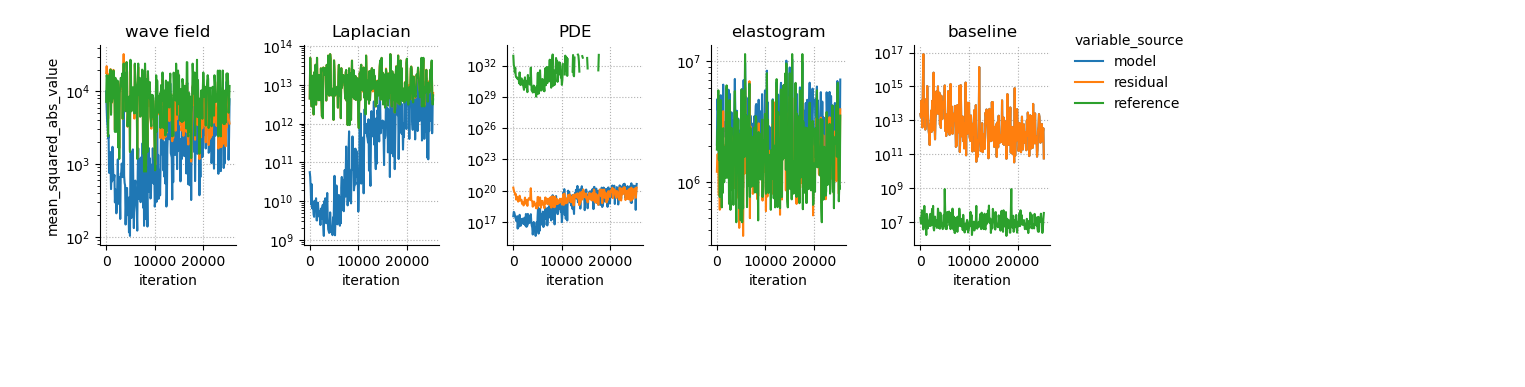

<IPython.core.display.Javascript object>


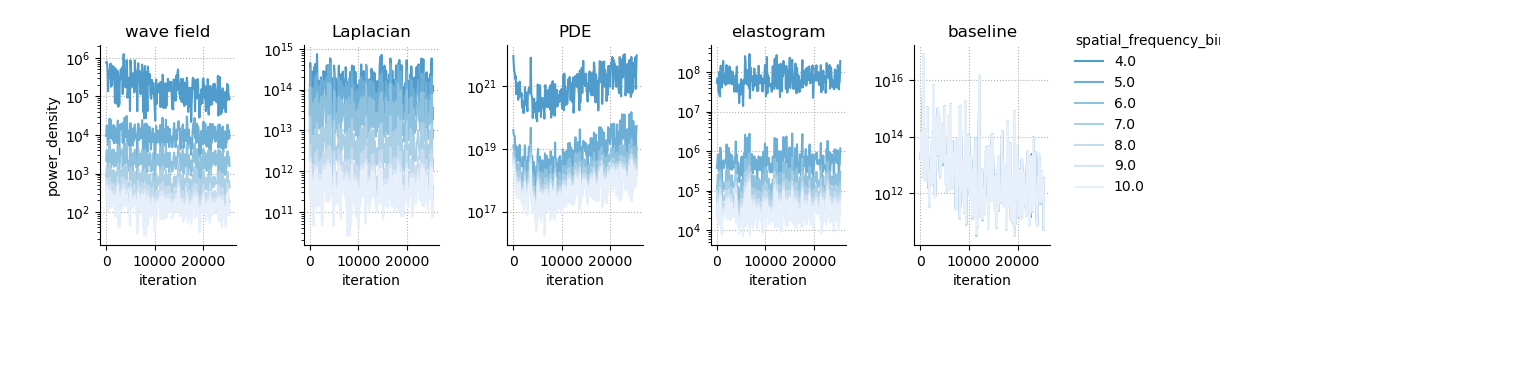

<IPython.core.display.Javascript object>


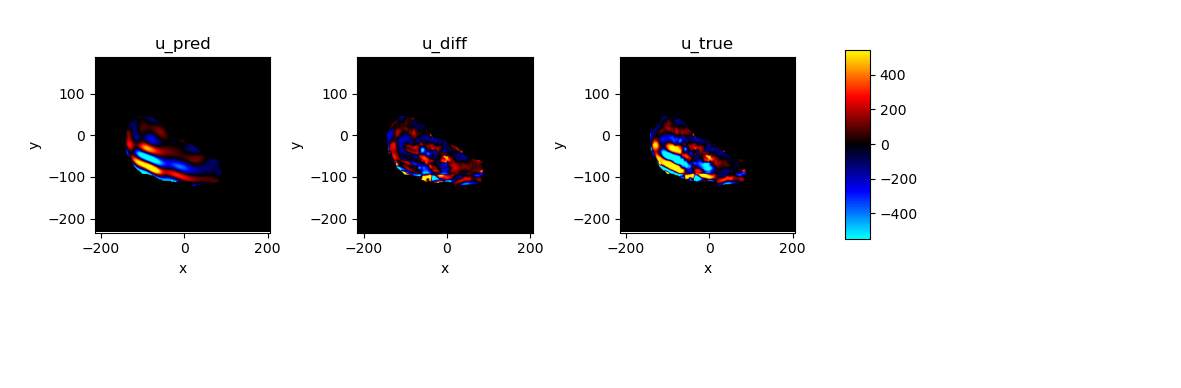

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


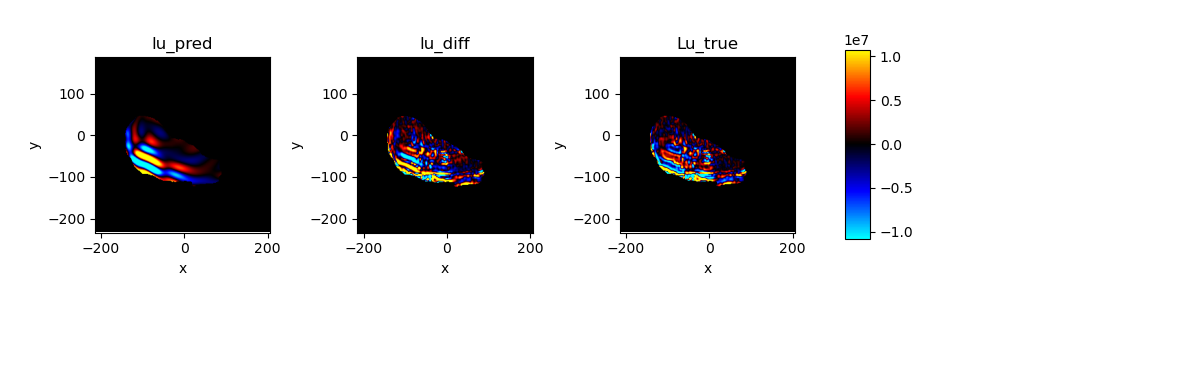

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


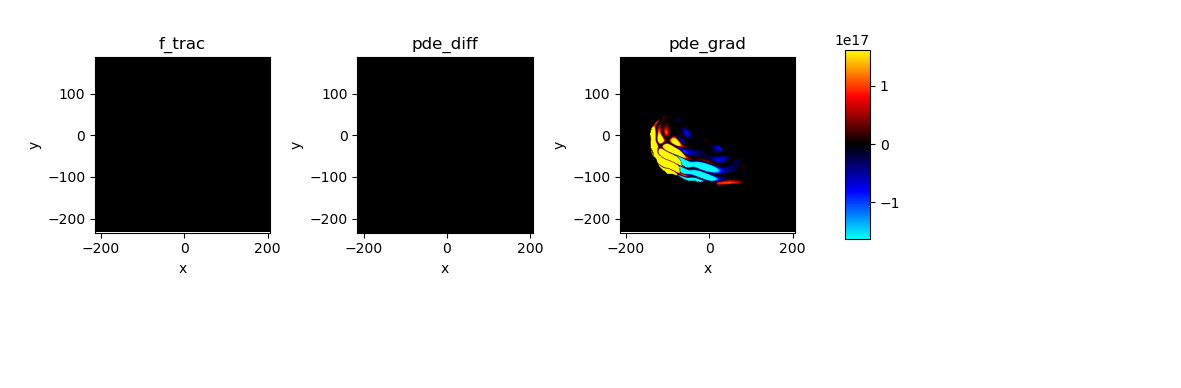

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


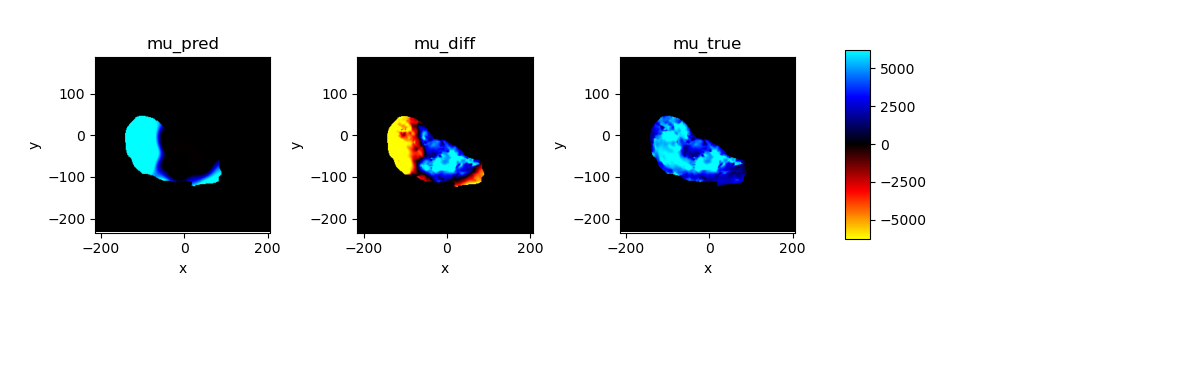

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


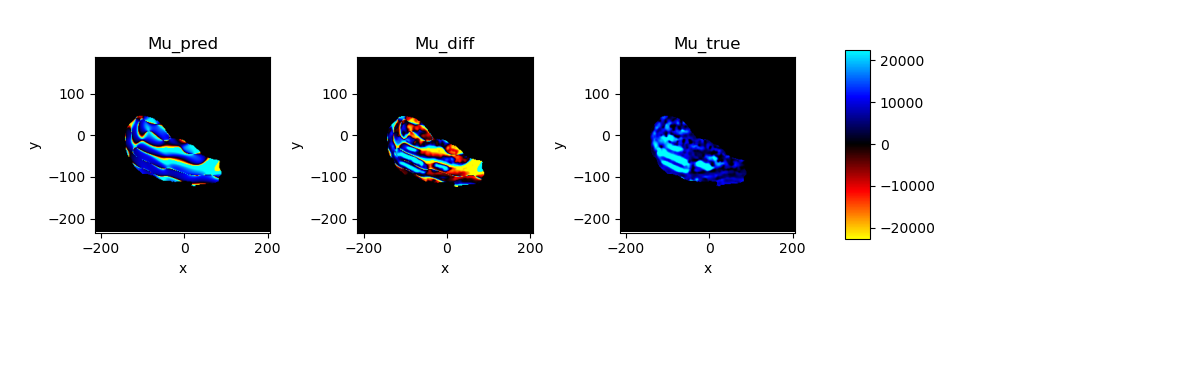

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

Time spent testing: 13.3510 (14.53%)
10        [1.75e+05, 2.63e+05, 0.00e+00]    [2.76e+05, 6.23e+05, 0.00e+00]    []  
20        [2.80e+05, 2.02e+05, 0.00e+00]    [1.99e+05, 4.75e+04, 0.00e+00]    []  
30        [1.66e+05, 4.02e+05, 0.00e+00]    [1.95e+05, 1.68e+04, 0.00e+00]    []  
40        [1.61e+05, 3.85e+04, 0.00e+00]    [1.90e+05, 4.76e+02, 0.00e+00]    []  
50        [1.30e+05, 3.22e+04, 0.00e+00]    [1.65e+05, 1.30e+03, 0.00e+00]    []  
60        [2.03e+05, 4.15e+04, 0.00e+00]    [1.61e+05, 1.19e+03, 0.00e+00]    []  
70        [1.33e+05, 1.87e+05, 0.00e+00]    [1.50e+05, 1.93e+03, 0.00e+00]    []  
80        [1.04e+05, 2.83e+04, 0.00e+00]    [1.57e+05, 1.56e+04, 0.00e+00]    []  
90        [1.22e+05, 4.21e+04, 0.00e+00]    [1.51e+05, 1.64e+05, 0.00e+00]    []  
100       [1.03e+05, 7.21e+03, 0.00e+00]    [1.47e+05, 4.89e+04, 0.00e+00]    []  
Time spent testing: 11.1468 (19.74%)
110       [9.65e+04, 2.63e+04, 0.00e+00]    [1.46e+05, 2.32e+05, 0.00e+00]    []  
120       [8.

960       [6.69e+04, 3.07e+03, 0.00e+00]    [1.16e+05, 1.10e+04, 0.00e+00]    []  
970       [6.57e+04, 5.93e+03, 0.00e+00]    [1.18e+05, 3.50e+04, 0.00e+00]    []  
980       [7.70e+04, 9.56e+03, 0.00e+00]    [1.17e+05, 6.20e+04, 0.00e+00]    []  
990       [1.11e+05, 3.85e+03, 0.00e+00]    [1.16e+05, 2.24e+04, 0.00e+00]    []  
1000      [9.09e+04, 9.40e+03, 0.00e+00]    [1.16e+05, 3.31e+03, 0.00e+00]    []  
Time spent testing: 11.0708 (31.78%)
1010      [6.36e+04, 1.79e+03, 0.00e+00]    [1.17e+05, 3.85e+02, 0.00e+00]    []  
1020      [7.82e+04, 1.67e+03, 0.00e+00]    [1.17e+05, 1.45e+02, 0.00e+00]    []  
1030      [7.18e+04, 1.26e+03, 0.00e+00]    [1.16e+05, 4.20e+03, 0.00e+00]    []  
1040      [9.23e+04, 2.67e+03, 0.00e+00]    [1.15e+05, 5.84e+01, 0.00e+00]    []  
1050      [8.53e+04, 1.15e+03, 0.00e+00]    [1.17e+05, 7.73e+03, 0.00e+00]    []  
1060      [6.51e+04, 2.45e+03, 0.00e+00]    [1.17e+05, 1.63e+04, 0.00e+00]    []  
1070      [8.26e+04, 7.30e+02, 0.00e+00]    [1.16e

Time spent testing: 11.3046 (34.06%)
1910      [5.86e+04, 1.73e+03, 0.00e+00]    [1.13e+05, 5.36e+02, 0.00e+00]    []  
1920      [9.34e+04, 1.61e+03, 0.00e+00]    [1.13e+05, 1.82e+02, 0.00e+00]    []  
1930      [4.61e+04, 5.49e+02, 0.00e+00]    [1.13e+05, 5.12e+01, 0.00e+00]    []  
1940      [9.88e+04, 6.30e+02, 0.00e+00]    [1.13e+05, 7.41e+02, 0.00e+00]    []  
1950      [7.25e+04, 4.89e+02, 0.00e+00]    [1.12e+05, 2.71e+02, 0.00e+00]    []  
1960      [6.39e+04, 1.21e+03, 0.00e+00]    [1.13e+05, 3.98e+02, 0.00e+00]    []  
1970      [5.44e+04, 3.75e+02, 0.00e+00]    [1.12e+05, 4.53e+02, 0.00e+00]    []  
1980      [7.50e+04, 1.74e+03, 0.00e+00]    [1.12e+05, 5.10e-02, 0.00e+00]    []  
1990      [8.45e+04, 6.99e+02, 0.00e+00]    [1.12e+05, 3.45e+01, 0.00e+00]    []  
2000      [8.19e+04, 3.85e+02, 0.00e+00]    [1.12e+05, 9.58e+01, 0.00e+00]    []  
Time spent testing: 11.1447 (34.19%)
2010      [6.40e+04, 3.83e+02, 0.00e+00]    [1.12e+05, 2.67e+02, 0.00e+00]    []  
2020      [7.

2860      [5.53e+04, 1.70e+03, 0.00e+00]    [1.11e+05, 2.20e+02, 0.00e+00]    []  
2870      [6.50e+04, 1.76e+03, 0.00e+00]    [1.11e+05, 4.43e+01, 0.00e+00]    []  
2880      [4.44e+04, 5.74e+02, 0.00e+00]    [1.12e+05, 1.22e+03, 0.00e+00]    []  
2890      [6.32e+04, 6.63e+02, 0.00e+00]    [1.13e+05, 1.75e+02, 0.00e+00]    []  
2900      [5.96e+04, 6.08e+02, 0.00e+00]    [1.12e+05, 1.04e+03, 0.00e+00]    []  
Time spent testing: 11.2453 (35.09%)
2910      [6.24e+04, 2.34e+03, 0.00e+00]    [1.12e+05, 6.23e+03, 0.00e+00]    []  
2920      [6.34e+04, 2.61e+03, 0.00e+00]    [1.12e+05, 5.29e+03, 0.00e+00]    []  
2930      [7.21e+04, 9.24e+02, 0.00e+00]    [1.12e+05, 1.02e+04, 0.00e+00]    []  
2940      [8.77e+04, 3.22e+03, 0.00e+00]    [1.13e+05, 1.79e+04, 0.00e+00]    []  
2950      [5.65e+04, 5.60e+02, 0.00e+00]    [1.11e+05, 1.42e+03, 0.00e+00]    []  
2960      [7.15e+04, 2.13e+03, 0.00e+00]    [1.12e+05, 1.05e+03, 0.00e+00]    []  
2970      [6.80e+04, 1.27e+03, 0.00e+00]    [1.12e

Time spent testing: 11.2946 (35.62%)
3810      [6.34e+04, 2.57e+03, 0.00e+00]    [1.17e+05, 1.53e+03, 0.00e+00]    []  
3820      [8.94e+04, 3.25e+03, 0.00e+00]    [1.17e+05, 1.02e+04, 0.00e+00]    []  
3830      [7.88e+04, 9.16e+02, 0.00e+00]    [1.17e+05, 2.15e+02, 0.00e+00]    []  
3840      [7.34e+04, 8.61e+02, 0.00e+00]    [1.17e+05, 6.34e+03, 0.00e+00]    []  
3850      [5.54e+04, 2.32e+03, 0.00e+00]    [1.17e+05, 5.08e+03, 0.00e+00]    []  
3860      [7.27e+04, 1.49e+03, 0.00e+00]    [1.16e+05, 2.38e+00, 0.00e+00]    []  
3870      [6.19e+04, 1.05e+03, 0.00e+00]    [1.16e+05, 3.85e+03, 0.00e+00]    []  
3880      [6.46e+04, 2.01e+03, 0.00e+00]    [1.16e+05, 2.55e+02, 0.00e+00]    []  
3890      [7.64e+04, 1.15e+03, 0.00e+00]    [1.17e+05, 2.02e+02, 0.00e+00]    []  
3900      [5.65e+04, 1.10e+02, 0.00e+00]    [1.16e+05, 8.95e+02, 0.00e+00]    []  
Time spent testing: 11.3881 (35.67%)
3910      [5.39e+04, 1.51e+03, 0.00e+00]    [1.16e+05, 2.77e+02, 0.00e+00]    []  
3920      [6.

4760      [7.11e+04, 2.61e+03, 0.00e+00]    [1.15e+05, 8.68e+03, 0.00e+00]    []  
4770      [6.07e+04, 1.35e+03, 0.00e+00]    [1.15e+05, 2.02e+04, 0.00e+00]    []  
4780      [5.90e+04, 3.65e+03, 0.00e+00]    [1.15e+05, 5.91e+02, 0.00e+00]    []  
4790      [9.11e+04, 1.55e+03, 0.00e+00]    [1.15e+05, 1.00e+03, 0.00e+00]    []  
4800      [3.49e+04, 1.47e+03, 0.00e+00]    [1.14e+05, 1.13e+03, 0.00e+00]    []  
Time spent testing: 11.2256 (36.01%)
4810      [5.69e+04, 1.37e+03, 0.00e+00]    [1.15e+05, 2.41e+03, 0.00e+00]    []  
4820      [4.30e+04, 2.31e+03, 0.00e+00]    [1.15e+05, 5.40e+02, 0.00e+00]    []  
4830      [6.87e+04, 3.84e+03, 0.00e+00]    [1.15e+05, 5.51e+01, 0.00e+00]    []  
4840      [7.64e+04, 1.62e+03, 0.00e+00]    [1.15e+05, 1.78e+02, 0.00e+00]    []  
4850      [8.94e+04, 1.39e+03, 0.00e+00]    [1.15e+05, 1.76e+02, 0.00e+00]    []  
4860      [6.51e+04, 8.89e+02, 0.00e+00]    [1.14e+05, 2.36e+02, 0.00e+00]    []  
4870      [5.54e+04, 2.33e+03, 0.00e+00]    [1.14e

Time spent testing: 11.3517 (36.27%)
5710      [6.75e+04, 2.30e+03, 0.00e+00]    [1.13e+05, 1.60e+03, 0.00e+00]    []  
5720      [7.64e+04, 1.99e+03, 0.00e+00]    [1.13e+05, 5.54e+02, 0.00e+00]    []  
5730      [7.34e+04, 1.32e+03, 0.00e+00]    [1.13e+05, 5.60e+00, 0.00e+00]    []  
5740      [7.81e+04, 4.18e+02, 0.00e+00]    [1.13e+05, 4.19e+02, 0.00e+00]    []  
5750      [4.72e+04, 1.26e+03, 0.00e+00]    [1.13e+05, 9.48e+00, 0.00e+00]    []  
5760      [6.45e+04, 2.54e+03, 0.00e+00]    [1.13e+05, 1.19e+02, 0.00e+00]    []  
5770      [8.54e+04, 2.31e+03, 0.00e+00]    [1.13e+05, 2.97e+02, 0.00e+00]    []  
5780      [6.74e+04, 1.02e+03, 0.00e+00]    [1.13e+05, 7.72e-01, 0.00e+00]    []  
5790      [5.59e+04, 2.25e+03, 0.00e+00]    [1.13e+05, 4.52e+03, 0.00e+00]    []  
5800      [7.74e+04, 3.44e+03, 0.00e+00]    [1.13e+05, 4.10e+02, 0.00e+00]    []  
Time spent testing: 11.4944 (36.30%)
5810      [6.41e+04, 4.51e+03, 0.00e+00]    [1.14e+05, 1.47e+04, 0.00e+00]    []  
5820      [6.

6660      [5.03e+04, 2.78e+03, 0.00e+00]    [1.10e+05, 5.01e+00, 0.00e+00]    []  
6670      [7.74e+04, 1.34e+03, 0.00e+00]    [1.10e+05, 1.30e+03, 0.00e+00]    []  
6680      [6.32e+04, 3.10e+03, 0.00e+00]    [1.10e+05, 3.80e+03, 0.00e+00]    []  
6690      [4.79e+04, 1.64e+03, 0.00e+00]    [1.11e+05, 6.11e+03, 0.00e+00]    []  
6700      [7.38e+04, 3.83e+03, 0.00e+00]    [1.09e+05, 2.81e+01, 0.00e+00]    []  
Time spent testing: 11.4714 (36.53%)
6710      [7.32e+04, 3.43e+03, 0.00e+00]    [1.11e+05, 4.82e+03, 0.00e+00]    []  
6720      [6.13e+04, 3.26e+03, 0.00e+00]    [1.10e+05, 2.13e+02, 0.00e+00]    []  
6730      [4.22e+04, 2.42e+03, 0.00e+00]    [1.10e+05, 1.15e+04, 0.00e+00]    []  
6740      [1.04e+05, 1.91e+03, 0.00e+00]    [1.09e+05, 2.77e+02, 0.00e+00]    []  
6750      [6.93e+04, 3.38e+03, 0.00e+00]    [1.10e+05, 1.19e+01, 0.00e+00]    []  
6760      [6.36e+04, 1.19e+03, 0.00e+00]    [1.10e+05, 1.24e+01, 0.00e+00]    []  
6770      [7.81e+04, 8.52e+02, 0.00e+00]    [1.09e

Time spent testing: 11.5038 (36.67%)
7610      [6.86e+04, 7.59e+02, 0.00e+00]    [1.06e+05, 1.51e+03, 0.00e+00]    []  
7620      [5.49e+04, 8.48e+02, 0.00e+00]    [1.06e+05, 3.30e+03, 0.00e+00]    []  
7630      [6.42e+04, 4.95e+02, 0.00e+00]    [1.06e+05, 7.77e+02, 0.00e+00]    []  
7640      [5.72e+04, 1.43e+03, 0.00e+00]    [1.06e+05, 6.23e+02, 0.00e+00]    []  
7650      [6.87e+04, 4.04e+02, 0.00e+00]    [1.06e+05, 9.98e-03, 0.00e+00]    []  
7660      [4.32e+04, 2.71e+03, 0.00e+00]    [1.06e+05, 3.35e+00, 0.00e+00]    []  
7670      [6.62e+04, 1.26e+03, 0.00e+00]    [1.06e+05, 1.21e+02, 0.00e+00]    []  
7680      [6.37e+04, 7.52e+02, 0.00e+00]    [1.06e+05, 1.08e+02, 0.00e+00]    []  
7690      [5.59e+04, 5.31e+02, 0.00e+00]    [1.06e+05, 3.35e+02, 0.00e+00]    []  
7700      [6.97e+04, 4.74e+02, 0.00e+00]    [1.06e+05, 2.46e+02, 0.00e+00]    []  
Time spent testing: 11.4392 (36.69%)
7710      [4.10e+04, 8.03e+02, 0.00e+00]    [1.06e+05, 3.23e+01, 0.00e+00]    []  
7720      [5.

8560      [4.04e+04, 1.18e+03, 0.00e+00]    [1.02e+05, 7.27e+03, 0.00e+00]    []  
8570      [7.68e+04, 1.71e+03, 0.00e+00]    [1.02e+05, 7.96e+03, 0.00e+00]    []  
8580      [8.15e+04, 1.23e+03, 0.00e+00]    [1.02e+05, 3.00e+02, 0.00e+00]    []  
8590      [5.01e+04, 6.59e+02, 0.00e+00]    [1.02e+05, 5.07e+03, 0.00e+00]    []  
8600      [4.94e+04, 1.88e+03, 0.00e+00]    [1.02e+05, 1.84e+03, 0.00e+00]    []  
Time spent testing: 11.4972 (36.81%)
8610      [6.10e+04, 3.94e+03, 0.00e+00]    [1.02e+05, 1.39e+02, 0.00e+00]    []  
8620      [5.11e+04, 3.28e+03, 0.00e+00]    [1.02e+05, 1.06e+03, 0.00e+00]    []  
8630      [7.15e+04, 4.84e+03, 0.00e+00]    [1.01e+05, 4.72e+00, 0.00e+00]    []  
8640      [5.20e+04, 1.41e+03, 0.00e+00]    [1.01e+05, 6.23e+02, 0.00e+00]    []  
8650      [5.43e+04, 3.61e+03, 0.00e+00]    [1.03e+05, 6.01e+00, 0.00e+00]    []  
8660      [5.67e+04, 1.95e+03, 0.00e+00]    [1.04e+05, 3.09e+03, 0.00e+00]    []  
8670      [5.11e+04, 2.65e+03, 0.00e+00]    [1.01e

Time spent testing: 11.5219 (36.92%)
9510      [4.02e+04, 5.52e+02, 0.00e+00]    [9.70e+04, 8.46e+01, 0.00e+00]    []  
9520      [4.87e+04, 5.22e+03, 0.00e+00]    [9.69e+04, 1.59e+03, 0.00e+00]    []  
9530      [7.18e+04, 1.10e+03, 0.00e+00]    [9.70e+04, 2.86e+03, 0.00e+00]    []  
9540      [6.14e+04, 5.95e+02, 0.00e+00]    [9.67e+04, 1.20e+02, 0.00e+00]    []  
9550      [7.36e+04, 1.36e+03, 0.00e+00]    [9.64e+04, 1.90e+02, 0.00e+00]    []  
9560      [7.00e+04, 1.30e+03, 0.00e+00]    [9.70e+04, 1.38e+03, 0.00e+00]    []  
9570      [5.59e+04, 7.38e+02, 0.00e+00]    [9.71e+04, 4.62e+03, 0.00e+00]    []  
9580      [6.38e+04, 8.82e+02, 0.00e+00]    [9.69e+04, 3.24e+01, 0.00e+00]    []  
9590      [8.04e+04, 1.78e+03, 0.00e+00]    [9.65e+04, 9.15e+01, 0.00e+00]    []  
9600      [5.50e+04, 1.23e+03, 0.00e+00]    [9.69e+04, 2.13e+02, 0.00e+00]    []  
Time spent testing: 12.0518 (36.94%)
9610      [4.23e+04, 5.91e+02, 0.00e+00]    [9.63e+04, 1.85e+02, 0.00e+00]    []  
9620      [6.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1770 (37.07%)
10310     [6.57e+04, 4.38e+03, 0.00e+00]    [1.05e+05, 3.61e+04, 0.00e+00]    []  
10320     [4.28e+04, 5.82e+03, 0.00e+00]    [9.83e+04, 3.59e+03, 0.00e+00]    []  
10330     [6.80e+04, 4.01e+03, 0.00e+00]    [9.66e+04, 1.32e+04, 0.00e+00]    []  
10340     [4.99e+04, 3.12e+03, 0.00e+00]    [9.51e+04, 4.86e+02, 0.00e+00]    []  
10350     [4.87e+04, 2.39e+03, 0.00e+00]    [9.70e+04, 1.22e+04, 0.00e+00]    []  
10360     [5.15e+04, 8.96e+02, 0.00e+00]    [9.64e+04, 3.41e+02, 0.00e+00]    []  
10370     [6.01e+04, 8.24e+02, 0.00e+00]    [9.60e+04, 4.65e+03, 0.00e+00]    []  
10380     [5.13e+04, 1.02e+03, 0.00e+00]    [9.54e+04, 1.12e+02, 0.00e+00]    []  
10390     [4.24e+04, 5.15e+03, 0.00e+00]    [9.67e+04, 3.34e+02, 0.00e+00]    []  
10400     [4.74e+04, 2.26e+03, 0.00e+00]    [9.54e+04, 4.59e+02, 0.00e+00]    []  
Time spent testing: 12.0692 (37.09%)
10410     [6.60e+04, 1.44e+03, 0.00e+00]    [9.54e+04, 1.85e+02, 0.00e+00]    []  
10420     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0193 (37.10%)
10510     [6.52e+04, 2.46e+03, 0.00e+00]    [9.38e+04, 1.75e+03, 0.00e+00]    []  
10520     [5.59e+04, 1.66e+03, 0.00e+00]    [9.47e+04, 2.70e+02, 0.00e+00]    []  
10530     [5.14e+04, 8.09e+02, 0.00e+00]    [9.42e+04, 5.65e+02, 0.00e+00]    []  
10540     [4.97e+04, 7.57e+02, 0.00e+00]    [9.40e+04, 9.70e+02, 0.00e+00]    []  
10550     [6.28e+04, 1.38e+03, 0.00e+00]    [9.36e+04, 4.91e+01, 0.00e+00]    []  
10560     [5.55e+04, 2.20e+03, 0.00e+00]    [9.32e+04, 1.21e+02, 0.00e+00]    []  
10570     [5.41e+04, 4.70e+03, 0.00e+00]    [9.35e+04, 5.53e+02, 0.00e+00]    []  
10580     [7.09e+04, 3.77e+02, 0.00e+00]    [9.35e+04, 8.65e+02, 0.00e+00]    []  
10590     [6.05e+04, 8.49e+02, 0.00e+00]    [9.30e+04, 8.54e+00, 0.00e+00]    []  
10600     [4.94e+04, 5.83e+02, 0.00e+00]    [9.28e+04, 5.09e-01, 0.00e+00]    []  
Time spent testing: 11.9845 (37.12%)
10610     [3.96e+04, 1.64e+03, 0.00e+00]    [9.34e+04, 8.19e+02, 0.00e+00]    []  
10620     [6.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0144 (37.22%)
11310     [4.43e+04, 1.88e+03, 0.00e+00]    [9.35e+04, 1.01e+02, 0.00e+00]    []  
11320     [5.83e+04, 2.60e+03, 0.00e+00]    [9.08e+04, 3.26e+00, 0.00e+00]    []  
11330     [5.03e+04, 7.74e+02, 0.00e+00]    [9.21e+04, 1.08e+03, 0.00e+00]    []  
11340     [5.90e+04, 4.68e+03, 0.00e+00]    [9.12e+04, 9.12e+02, 0.00e+00]    []  
11350     [5.20e+04, 1.12e+03, 0.00e+00]    [9.13e+04, 5.02e+01, 0.00e+00]    []  
11360     [6.05e+04, 5.94e+03, 0.00e+00]    [9.30e+04, 9.77e+03, 0.00e+00]    []  
11370     [5.00e+04, 5.80e+02, 0.00e+00]    [9.11e+04, 7.88e+03, 0.00e+00]    []  
11380     [5.73e+04, 1.14e+03, 0.00e+00]    [9.03e+04, 4.03e+02, 0.00e+00]    []  
11390     [5.75e+04, 2.45e+03, 0.00e+00]    [9.03e+04, 1.80e+02, 0.00e+00]    []  
11400     [3.88e+04, 2.85e+03, 0.00e+00]    [9.15e+04, 2.56e-01, 0.00e+00]    []  
Time spent testing: 12.0589 (37.23%)
11410     [4.63e+04, 2.55e+03, 0.00e+00]    [9.18e+04, 5.19e+01, 0.00e+00]    []  
11420     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0206 (37.25%)
11510     [6.97e+04, 1.11e+03, 0.00e+00]    [9.45e+04, 2.07e+03, 0.00e+00]    []  
11520     [5.75e+04, 2.27e+03, 0.00e+00]    [9.24e+04, 1.56e+04, 0.00e+00]    []  
11530     [4.50e+04, 2.53e+03, 0.00e+00]    [9.17e+04, 1.33e+04, 0.00e+00]    []  
11540     [4.85e+04, 3.06e+03, 0.00e+00]    [9.48e+04, 3.19e+04, 0.00e+00]    []  
11550     [6.29e+04, 1.72e+03, 0.00e+00]    [9.38e+04, 3.12e+04, 0.00e+00]    []  
11560     [4.63e+04, 2.32e+03, 0.00e+00]    [9.50e+04, 6.35e+04, 0.00e+00]    []  
11570     [4.93e+04, 2.99e+03, 0.00e+00]    [9.70e+04, 5.07e+04, 0.00e+00]    []  
11580     [4.59e+04, 1.65e+04, 0.00e+00]    [9.90e+04, 6.61e+04, 0.00e+00]    []  
11590     [5.99e+04, 2.01e+03, 0.00e+00]    [9.97e+04, 1.70e+04, 0.00e+00]    []  
11600     [4.79e+04, 5.46e+03, 0.00e+00]    [9.47e+04, 4.81e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9480 (37.26%)
11610     [4.46e+04, 4.45e+03, 0.00e+00]    [1.03e+05, 5.07e+04, 0.00e+00]    []  
11620     [4.28e+04, 1.95e+03, 0.00e+00]    [1.05e+05, 3.97e+04, 0.00e+00]    []  
11630     [5.44e+04, 7.09e+03, 0.00e+00]    [1.01e+05, 2.59e+04, 0.00e+00]    []  
11640     [4.26e+04, 1.68e+03, 0.00e+00]    [9.57e+04, 1.25e+04, 0.00e+00]    []  
11650     [5.62e+04, 2.73e+04, 0.00e+00]    [9.30e+04, 1.10e+03, 0.00e+00]    []  
11660     [8.03e+04, 1.29e+03, 0.00e+00]    [9.27e+04, 7.50e+03, 0.00e+00]    []  
11670     [3.72e+04, 1.36e+03, 0.00e+00]    [9.21e+04, 1.08e+03, 0.00e+00]    []  
11680     [4.57e+04, 2.32e+03, 0.00e+00]    [9.46e+04, 1.00e+03, 0.00e+00]    []  
11690     [3.41e+04, 3.51e+03, 0.00e+00]    [9.17e+04, 2.40e+03, 0.00e+00]    []  
11700     [3.44e+04, 3.79e+03, 0.00e+00]    [9.43e+04, 2.25e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9377 (37.27%)
11710     [4.88e+04, 1.16e+03, 0.00e+00]    [9.15e+04, 1.21e+03, 0.00e+00]    []  
11720     [5.30e+04, 1.86e+03, 0.00e+00]    [9.21e+04, 4.95e+03, 0.00e+00]    []  
11730     [5.07e+04, 3.73e+03, 0.00e+00]    [9.15e+04, 3.89e+03, 0.00e+00]    []  
11740     [3.85e+04, 9.98e+02, 0.00e+00]    [9.07e+04, 7.08e+03, 0.00e+00]    []  
11750     [4.83e+04, 9.74e+02, 0.00e+00]    [9.09e+04, 1.46e+04, 0.00e+00]    []  
11760     [3.42e+04, 1.80e+03, 0.00e+00]    [9.12e+04, 2.21e+04, 0.00e+00]    []  
11770     [6.81e+04, 2.12e+03, 0.00e+00]    [9.06e+04, 2.27e+01, 0.00e+00]    []  
11780     [4.16e+04, 3.12e+02, 0.00e+00]    [9.10e+04, 4.35e+03, 0.00e+00]    []  
11790     [3.25e+04, 3.24e+03, 0.00e+00]    [9.02e+04, 1.18e+03, 0.00e+00]    []  
11800     [3.66e+04, 3.12e+02, 0.00e+00]    [9.05e+04, 3.38e+03, 0.00e+00]    []  
Time spent testing: 11.9002 (37.29%)
11810     [5.17e+04, 4.99e+02, 0.00e+00]    [9.01e+04, 1.06e+03, 0.00e+00]    []  
11820     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9223 (37.30%)
11910     [5.04e+04, 2.03e+02, 0.00e+00]    [8.92e+04, 3.45e+02, 0.00e+00]    []  
11920     [4.61e+04, 1.35e+02, 0.00e+00]    [8.91e+04, 1.01e+02, 0.00e+00]    []  
11930     [4.12e+04, 6.79e+01, 0.00e+00]    [8.92e+04, 1.38e+00, 0.00e+00]    []  
11940     [5.53e+04, 1.50e+02, 0.00e+00]    [8.92e+04, 9.87e+01, 0.00e+00]    []  
11950     [7.53e+04, 1.14e+02, 0.00e+00]    [8.90e+04, 7.18e+01, 0.00e+00]    []  
11960     [5.72e+04, 2.88e+02, 0.00e+00]    [8.90e+04, 8.03e+00, 0.00e+00]    []  
11970     [5.44e+04, 1.39e+02, 0.00e+00]    [8.90e+04, 2.81e+02, 0.00e+00]    []  
11980     [6.27e+04, 3.01e+02, 0.00e+00]    [8.90e+04, 2.09e+02, 0.00e+00]    []  
11990     [4.57e+04, 3.46e+02, 0.00e+00]    [8.89e+04, 1.32e+02, 0.00e+00]    []  
12000     [6.23e+04, 2.91e+02, 0.00e+00]    [8.88e+04, 1.63e+02, 0.00e+00]    []  
Time spent testing: 12.0551 (37.31%)
12010     [5.94e+04, 1.51e+02, 0.00e+00]    [8.90e+04, 2.81e+02, 0.00e+00]    []  
12020     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1371 (37.33%)
12110     [4.38e+04, 5.84e+02, 0.00e+00]    [8.87e+04, 2.40e+01, 0.00e+00]    []  
12120     [3.48e+04, 7.29e+02, 0.00e+00]    [8.91e+04, 5.45e+02, 0.00e+00]    []  
12130     [5.49e+04, 2.23e+02, 0.00e+00]    [8.83e+04, 2.51e-01, 0.00e+00]    []  
12140     [3.54e+04, 6.58e+02, 0.00e+00]    [8.90e+04, 1.14e+02, 0.00e+00]    []  
12150     [4.85e+04, 5.36e+02, 0.00e+00]    [8.83e+04, 1.14e+02, 0.00e+00]    []  
12160     [4.43e+04, 5.23e+02, 0.00e+00]    [8.88e+04, 7.69e+02, 0.00e+00]    []  
12170     [4.60e+04, 9.29e+02, 0.00e+00]    [8.84e+04, 2.89e+02, 0.00e+00]    []  
12180     [5.15e+04, 5.03e+02, 0.00e+00]    [8.85e+04, 6.21e-02, 0.00e+00]    []  
12190     [6.54e+04, 1.47e+03, 0.00e+00]    [8.85e+04, 4.52e+01, 0.00e+00]    []  
12200     [5.25e+04, 1.40e+03, 0.00e+00]    [8.96e+04, 7.99e+02, 0.00e+00]    []  
Time spent testing: 11.8889 (37.34%)
12210     [6.47e+04, 1.58e+02, 0.00e+00]    [8.80e+04, 7.11e+01, 0.00e+00]    []  
12220     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.6907 (37.37%)
12710     [6.13e+04, 1.10e+03, 0.00e+00]    [8.75e+04, 7.36e+02, 0.00e+00]    []  
12720     [4.62e+04, 3.97e+02, 0.00e+00]    [8.75e+04, 3.70e+02, 0.00e+00]    []  
12730     [6.25e+04, 1.07e+03, 0.00e+00]    [8.71e+04, 4.13e+03, 0.00e+00]    []  
12740     [4.16e+04, 6.91e+02, 0.00e+00]    [8.73e+04, 4.99e+03, 0.00e+00]    []  
12750     [5.16e+04, 1.49e+03, 0.00e+00]    [8.71e+04, 2.36e+01, 0.00e+00]    []  
12760     [4.31e+04, 1.58e+03, 0.00e+00]    [8.80e+04, 6.90e+02, 0.00e+00]    []  
12770     [6.97e+04, 2.55e+03, 0.00e+00]    [8.69e+04, 9.80e+01, 0.00e+00]    []  
12780     [4.14e+04, 7.47e+02, 0.00e+00]    [8.82e+04, 1.16e+03, 0.00e+00]    []  
12790     [5.03e+04, 1.04e+03, 0.00e+00]    [8.71e+04, 3.97e+03, 0.00e+00]    []  
12800     [5.17e+04, 8.21e+02, 0.00e+00]    [8.76e+04, 4.25e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.4343 (37.38%)
12810     [4.43e+04, 8.08e+02, 0.00e+00]    [8.74e+04, 6.76e-02, 0.00e+00]    []  
12820     [5.49e+04, 2.14e+03, 0.00e+00]    [8.84e+04, 3.60e+02, 0.00e+00]    []  
12830     [4.41e+04, 3.60e+02, 0.00e+00]    [8.86e+04, 1.00e+04, 0.00e+00]    []  
12840     [5.47e+04, 4.17e+02, 0.00e+00]    [8.71e+04, 1.17e+03, 0.00e+00]    []  
12850     [4.85e+04, 8.15e+02, 0.00e+00]    [8.82e+04, 1.76e+03, 0.00e+00]    []  
12860     [4.44e+04, 6.95e+02, 0.00e+00]    [8.73e+04, 8.05e+02, 0.00e+00]    []  
12870     [4.64e+04, 7.71e+02, 0.00e+00]    [8.85e+04, 1.50e+04, 0.00e+00]    []  
12880     [4.21e+04, 5.72e+03, 0.00e+00]    [8.84e+04, 1.48e+04, 0.00e+00]    []  
12890     [4.15e+04, 1.20e+03, 0.00e+00]    [8.73e+04, 1.03e+04, 0.00e+00]    []  
12900     [5.34e+04, 7.36e+02, 0.00e+00]    [8.74e+04, 6.32e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7835 (37.38%)
12910     [5.68e+04, 1.77e+03, 0.00e+00]    [8.81e+04, 2.59e+02, 0.00e+00]    []  
12920     [5.37e+04, 4.02e+03, 0.00e+00]    [8.69e+04, 1.58e+02, 0.00e+00]    []  
12930     [5.54e+04, 3.48e+02, 0.00e+00]    [8.93e+04, 9.63e+00, 0.00e+00]    []  
12940     [5.34e+04, 8.60e+02, 0.00e+00]    [8.71e+04, 3.07e+01, 0.00e+00]    []  
12950     [4.17e+04, 7.46e+02, 0.00e+00]    [8.83e+04, 6.61e+02, 0.00e+00]    []  
12960     [4.76e+04, 1.01e+03, 0.00e+00]    [8.86e+04, 3.70e+03, 0.00e+00]    []  
12970     [6.55e+04, 9.38e+02, 0.00e+00]    [8.70e+04, 2.32e+01, 0.00e+00]    []  
12980     [4.16e+04, 1.40e+03, 0.00e+00]    [8.68e+04, 1.52e+02, 0.00e+00]    []  
12990     [4.72e+04, 1.06e+03, 0.00e+00]    [8.72e+04, 7.35e+01, 0.00e+00]    []  
13000     [5.62e+04, 2.63e+03, 0.00e+00]    [8.66e+04, 4.10e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.5166 (37.39%)
13010     [4.06e+04, 3.24e+02, 0.00e+00]    [8.73e+04, 1.11e+01, 0.00e+00]    []  
13020     [4.41e+04, 5.19e+02, 0.00e+00]    [8.77e+04, 5.51e+02, 0.00e+00]    []  
13030     [4.33e+04, 1.02e+03, 0.00e+00]    [8.75e+04, 5.75e+01, 0.00e+00]    []  
13040     [4.00e+04, 4.09e+02, 0.00e+00]    [8.76e+04, 3.06e+01, 0.00e+00]    []  
13050     [3.59e+04, 6.42e+02, 0.00e+00]    [8.90e+04, 3.13e+00, 0.00e+00]    []  
13060     [4.80e+04, 2.49e+02, 0.00e+00]    [8.79e+04, 1.62e+02, 0.00e+00]    []  
13070     [4.17e+04, 3.16e+02, 0.00e+00]    [8.91e+04, 9.46e+00, 0.00e+00]    []  
13080     [4.98e+04, 6.78e+02, 0.00e+00]    [8.99e+04, 1.34e+01, 0.00e+00]    []  
13090     [6.40e+04, 1.46e+03, 0.00e+00]    [8.72e+04, 8.11e+02, 0.00e+00]    []  
13100     [5.21e+04, 8.77e+02, 0.00e+00]    [8.70e+04, 9.32e+02, 0.00e+00]    []  
Time spent testing: 11.8418 (37.39%)
13110     [5.02e+04, 4.85e+02, 0.00e+00]    [8.62e+04, 1.57e+02, 0.00e+00]    []  
13120     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.4246 (37.40%)
13210     [4.40e+04, 1.45e+03, 0.00e+00]    [8.73e+04, 5.63e+01, 0.00e+00]    []  
13220     [4.68e+04, 1.27e+03, 0.00e+00]    [8.80e+04, 1.16e+01, 0.00e+00]    []  
13230     [3.84e+04, 1.51e+03, 0.00e+00]    [8.87e+04, 6.31e+01, 0.00e+00]    []  
13240     [4.05e+04, 1.51e+03, 0.00e+00]    [8.72e+04, 8.77e+01, 0.00e+00]    []  
13250     [4.00e+04, 3.50e+03, 0.00e+00]    [8.95e+04, 1.47e+02, 0.00e+00]    []  
13260     [6.75e+04, 2.31e+03, 0.00e+00]    [9.25e+04, 7.02e+01, 0.00e+00]    []  
13270     [6.73e+04, 3.21e+03, 0.00e+00]    [9.12e+04, 2.22e+03, 0.00e+00]    []  
13280     [5.85e+04, 9.09e+02, 0.00e+00]    [8.99e+04, 9.40e-03, 0.00e+00]    []  
13290     [5.31e+04, 2.04e+03, 0.00e+00]    [9.02e+04, 7.30e+03, 0.00e+00]    []  
13300     [5.54e+04, 6.03e+02, 0.00e+00]    [9.34e+04, 5.51e+03, 0.00e+00]    []  
Time spent testing: 11.7142 (37.40%)
13310     [3.97e+04, 1.45e+03, 0.00e+00]    [8.97e+04, 1.65e+03, 0.00e+00]    []  
13320     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.5799 (37.42%)
13710     [4.75e+04, 2.09e+02, 0.00e+00]    [8.57e+04, 4.03e+01, 0.00e+00]    []  
13720     [5.63e+04, 2.89e+02, 0.00e+00]    [8.56e+04, 3.67e+02, 0.00e+00]    []  
13730     [5.93e+04, 2.18e+02, 0.00e+00]    [8.55e+04, 3.77e+02, 0.00e+00]    []  
13740     [3.87e+04, 4.82e+02, 0.00e+00]    [8.57e+04, 1.05e+03, 0.00e+00]    []  
13750     [5.64e+04, 2.33e+02, 0.00e+00]    [8.52e+04, 1.49e+02, 0.00e+00]    []  
13760     [3.96e+04, 2.68e+02, 0.00e+00]    [8.59e+04, 3.47e+02, 0.00e+00]    []  
13770     [4.62e+04, 1.59e+02, 0.00e+00]    [8.61e+04, 1.78e+02, 0.00e+00]    []  
13780     [5.17e+04, 2.40e+02, 0.00e+00]    [8.57e+04, 8.09e+01, 0.00e+00]    []  
13790     [3.26e+04, 5.45e+02, 0.00e+00]    [8.52e+04, 3.02e+01, 0.00e+00]    []  
13800     [4.37e+04, 2.21e+02, 0.00e+00]    [8.56e+04, 3.41e+02, 0.00e+00]    []  
Time spent testing: 11.6626 (37.43%)
13810     [3.94e+04, 2.61e+02, 0.00e+00]    [8.57e+04, 1.19e+02, 0.00e+00]    []  
13820     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3054 (37.44%)
13910     [4.81e+04, 2.35e+02, 0.00e+00]    [8.50e+04, 8.33e+02, 0.00e+00]    []  
13920     [4.09e+04, 5.17e+02, 0.00e+00]    [8.56e+04, 2.31e+02, 0.00e+00]    []  
13930     [5.02e+04, 2.73e+02, 0.00e+00]    [8.52e+04, 3.38e+00, 0.00e+00]    []  
13940     [5.00e+04, 2.19e+02, 0.00e+00]    [8.52e+04, 1.41e+01, 0.00e+00]    []  
13950     [4.34e+04, 2.63e+02, 0.00e+00]    [8.54e+04, 5.51e+00, 0.00e+00]    []  
13960     [3.52e+04, 3.12e+02, 0.00e+00]    [8.55e+04, 2.46e+01, 0.00e+00]    []  
13970     [4.41e+04, 4.29e+02, 0.00e+00]    [8.59e+04, 4.06e-01, 0.00e+00]    []  
13980     [3.33e+04, 4.77e+02, 0.00e+00]    [8.55e+04, 7.55e+00, 0.00e+00]    []  
13990     [3.83e+04, 1.03e+02, 0.00e+00]    [8.54e+04, 2.97e+02, 0.00e+00]    []  
14000     [4.36e+04, 3.61e+02, 0.00e+00]    [8.61e+04, 4.02e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9345 (37.45%)
14010     [4.66e+04, 6.39e+02, 0.00e+00]    [8.49e+04, 2.00e+02, 0.00e+00]    []  
14020     [5.14e+04, 3.13e+02, 0.00e+00]    [8.59e+04, 4.81e+00, 0.00e+00]    []  
14030     [4.72e+04, 5.95e+02, 0.00e+00]    [8.50e+04, 5.99e-02, 0.00e+00]    []  
14040     [3.82e+04, 1.03e+03, 0.00e+00]    [8.52e+04, 7.99e+02, 0.00e+00]    []  
14050     [4.42e+04, 5.15e+02, 0.00e+00]    [8.59e+04, 9.12e-01, 0.00e+00]    []  
14060     [4.68e+04, 2.83e+03, 0.00e+00]    [8.58e+04, 6.65e+00, 0.00e+00]    []  
14070     [5.27e+04, 4.02e+02, 0.00e+00]    [8.49e+04, 1.31e+02, 0.00e+00]    []  
14080     [5.58e+04, 1.00e+03, 0.00e+00]    [8.58e+04, 1.28e+02, 0.00e+00]    []  
14090     [5.75e+04, 5.91e+02, 0.00e+00]    [8.56e+04, 1.74e+02, 0.00e+00]    []  
14100     [6.93e+04, 1.01e+03, 0.00e+00]    [8.50e+04, 2.67e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2399 (37.47%)
14110     [6.51e+04, 1.14e+03, 0.00e+00]    [8.62e+04, 2.92e+03, 0.00e+00]    []  
14120     [3.20e+04, 6.53e+02, 0.00e+00]    [8.55e+04, 3.06e+03, 0.00e+00]    []  
14130     [3.65e+04, 2.56e+02, 0.00e+00]    [8.58e+04, 1.56e+03, 0.00e+00]    []  
14140     [4.26e+04, 1.23e+03, 0.00e+00]    [8.63e+04, 3.16e+03, 0.00e+00]    []  
14150     [5.57e+04, 1.05e+03, 0.00e+00]    [8.53e+04, 1.91e+03, 0.00e+00]    []  
14160     [5.17e+04, 9.16e+02, 0.00e+00]    [8.60e+04, 7.56e+02, 0.00e+00]    []  
14170     [5.90e+04, 8.62e+02, 0.00e+00]    [8.93e+04, 1.70e+02, 0.00e+00]    []  
14180     [3.96e+04, 6.35e+02, 0.00e+00]    [8.58e+04, 6.69e+02, 0.00e+00]    []  
14190     [4.84e+04, 1.15e+03, 0.00e+00]    [8.68e+04, 2.66e+02, 0.00e+00]    []  
14200     [4.20e+04, 2.19e+03, 0.00e+00]    [8.91e+04, 1.07e+03, 0.00e+00]    []  
Time spent testing: 12.1509 (37.48%)
14210     [4.50e+04, 1.47e+02, 0.00e+00]    [8.48e+04, 1.62e+00, 0.00e+00]    []  
14220     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9445 (37.50%)
14410     [3.80e+04, 7.18e+02, 0.00e+00]    [8.65e+04, 1.50e+03, 0.00e+00]    []  
14420     [4.29e+04, 2.74e+02, 0.00e+00]    [8.42e+04, 2.74e+02, 0.00e+00]    []  
14430     [3.83e+04, 3.92e+02, 0.00e+00]    [8.47e+04, 1.49e+03, 0.00e+00]    []  
14440     [5.15e+04, 7.18e+02, 0.00e+00]    [8.42e+04, 2.61e+03, 0.00e+00]    []  
14450     [3.71e+04, 6.04e+02, 0.00e+00]    [8.54e+04, 8.50e+03, 0.00e+00]    []  
14460     [4.34e+04, 2.84e+02, 0.00e+00]    [8.51e+04, 4.39e+03, 0.00e+00]    []  
14470     [4.30e+04, 5.00e+02, 0.00e+00]    [8.44e+04, 5.46e+02, 0.00e+00]    []  
14480     [4.22e+04, 1.54e+03, 0.00e+00]    [8.46e+04, 5.56e-01, 0.00e+00]    []  
14490     [6.35e+04, 7.17e+02, 0.00e+00]    [8.52e+04, 2.92e+02, 0.00e+00]    []  
14500     [4.53e+04, 1.77e+02, 0.00e+00]    [8.51e+04, 6.27e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0285 (37.51%)
14510     [3.96e+04, 1.05e+03, 0.00e+00]    [8.54e+04, 9.24e+01, 0.00e+00]    []  
14520     [3.82e+04, 3.26e+02, 0.00e+00]    [8.56e+04, 9.62e+00, 0.00e+00]    []  
14530     [4.40e+04, 3.65e+02, 0.00e+00]    [8.59e+04, 1.90e+03, 0.00e+00]    []  
14540     [4.24e+04, 7.25e+02, 0.00e+00]    [8.62e+04, 8.26e+02, 0.00e+00]    []  
14550     [4.09e+04, 2.91e+03, 0.00e+00]    [8.58e+04, 1.09e+03, 0.00e+00]    []  
14560     [3.97e+04, 1.57e+03, 0.00e+00]    [8.73e+04, 1.98e+03, 0.00e+00]    []  
14570     [6.15e+04, 4.80e+02, 0.00e+00]    [8.78e+04, 3.97e+03, 0.00e+00]    []  
14580     [4.54e+04, 1.07e+03, 0.00e+00]    [8.91e+04, 2.72e+03, 0.00e+00]    []  
14590     [5.03e+04, 2.32e+03, 0.00e+00]    [8.63e+04, 1.17e+02, 0.00e+00]    []  
14600     [3.92e+04, 3.18e+03, 0.00e+00]    [8.68e+04, 1.32e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1125 (37.52%)
14610     [3.89e+04, 1.65e+04, 0.00e+00]    [8.56e+04, 3.44e+01, 0.00e+00]    []  
14620     [4.46e+04, 2.71e+03, 0.00e+00]    [8.86e+04, 1.05e+04, 0.00e+00]    []  
14630     [5.08e+04, 2.68e+03, 0.00e+00]    [8.88e+04, 2.04e+03, 0.00e+00]    []  
14640     [5.32e+04, 4.88e+03, 0.00e+00]    [1.02e+05, 1.28e+03, 0.00e+00]    []  
14650     [4.57e+04, 4.63e+03, 0.00e+00]    [8.80e+04, 1.22e+02, 0.00e+00]    []  
14660     [5.19e+04, 4.58e+03, 0.00e+00]    [8.87e+04, 1.16e+02, 0.00e+00]    []  
14670     [5.18e+04, 4.92e+03, 0.00e+00]    [8.65e+04, 3.36e+00, 0.00e+00]    []  
14680     [5.16e+04, 2.11e+03, 0.00e+00]    [9.26e+04, 1.03e+03, 0.00e+00]    []  
14690     [5.12e+04, 3.26e+03, 0.00e+00]    [8.87e+04, 1.49e+00, 0.00e+00]    []  
14700     [5.53e+04, 1.15e+03, 0.00e+00]    [8.73e+04, 6.12e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0703 (37.53%)
14710     [4.99e+04, 2.22e+03, 0.00e+00]    [9.41e+04, 4.38e+03, 0.00e+00]    []  
14720     [6.06e+04, 3.21e+03, 0.00e+00]    [8.79e+04, 1.88e+02, 0.00e+00]    []  
14730     [5.94e+04, 2.31e+03, 0.00e+00]    [8.82e+04, 8.75e+02, 0.00e+00]    []  
14740     [6.07e+04, 2.09e+03, 0.00e+00]    [8.68e+04, 3.15e+02, 0.00e+00]    []  
14750     [4.21e+04, 1.52e+03, 0.00e+00]    [8.66e+04, 2.35e+02, 0.00e+00]    []  
14760     [3.74e+04, 2.74e+03, 0.00e+00]    [8.65e+04, 2.40e+01, 0.00e+00]    []  
14770     [4.75e+04, 2.47e+03, 0.00e+00]    [8.68e+04, 2.52e+03, 0.00e+00]    []  
14780     [4.96e+04, 1.21e+03, 0.00e+00]    [8.64e+04, 9.86e+03, 0.00e+00]    []  
14790     [4.63e+04, 1.00e+03, 0.00e+00]    [9.49e+04, 1.83e+04, 0.00e+00]    []  
14800     [4.74e+04, 4.76e+02, 0.00e+00]    [9.00e+04, 9.56e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1020 (37.55%)
14810     [4.29e+04, 1.08e+03, 0.00e+00]    [8.59e+04, 2.37e+03, 0.00e+00]    []  
14820     [4.37e+04, 2.29e+03, 0.00e+00]    [8.51e+04, 2.88e+01, 0.00e+00]    []  
14830     [5.25e+04, 1.71e+03, 0.00e+00]    [8.71e+04, 3.46e+03, 0.00e+00]    []  
14840     [5.17e+04, 2.24e+03, 0.00e+00]    [8.66e+04, 3.08e+03, 0.00e+00]    []  
14850     [5.33e+04, 1.56e+03, 0.00e+00]    [8.58e+04, 1.33e+03, 0.00e+00]    []  
14860     [4.19e+04, 2.42e+03, 0.00e+00]    [8.85e+04, 3.88e+02, 0.00e+00]    []  
14870     [3.89e+04, 2.57e+02, 0.00e+00]    [8.76e+04, 3.33e+01, 0.00e+00]    []  
14880     [3.46e+04, 7.88e+02, 0.00e+00]    [8.56e+04, 1.42e+03, 0.00e+00]    []  
14890     [4.54e+04, 1.21e+04, 0.00e+00]    [8.71e+04, 8.76e+02, 0.00e+00]    []  
14900     [4.56e+04, 1.79e+04, 0.00e+00]    [8.56e+04, 6.12e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0361 (37.55%)
14910     [4.66e+04, 2.64e+03, 0.00e+00]    [8.52e+04, 1.07e+01, 0.00e+00]    []  
14920     [3.77e+04, 1.98e+03, 0.00e+00]    [8.51e+04, 5.11e+02, 0.00e+00]    []  
14930     [4.02e+04, 7.08e+02, 0.00e+00]    [8.50e+04, 3.11e+03, 0.00e+00]    []  
14940     [4.93e+04, 1.53e+03, 0.00e+00]    [8.48e+04, 1.57e+02, 0.00e+00]    []  
14950     [4.68e+04, 5.80e+02, 0.00e+00]    [8.50e+04, 3.55e+02, 0.00e+00]    []  
14960     [5.09e+04, 5.43e+02, 0.00e+00]    [8.47e+04, 8.62e+01, 0.00e+00]    []  
14970     [5.45e+04, 1.19e+02, 0.00e+00]    [8.47e+04, 2.11e+03, 0.00e+00]    []  
14980     [5.47e+04, 2.77e+02, 0.00e+00]    [8.43e+04, 4.43e+02, 0.00e+00]    []  
14990     [4.72e+04, 4.70e+02, 0.00e+00]    [8.41e+04, 5.39e+01, 0.00e+00]    []  
15000     [3.74e+04, 9.74e+02, 0.00e+00]    [8.47e+04, 4.33e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9462 (37.56%)
15010     [2.62e+04, 5.90e+02, 0.00e+00]    [8.44e+04, 2.60e+03, 0.00e+00]    []  
15020     [4.03e+04, 8.23e+02, 0.00e+00]    [8.43e+04, 4.02e+02, 0.00e+00]    []  
15030     [4.70e+04, 5.73e+02, 0.00e+00]    [8.45e+04, 2.15e+03, 0.00e+00]    []  
15040     [4.65e+04, 2.00e+02, 0.00e+00]    [8.40e+04, 6.58e+02, 0.00e+00]    []  
15050     [5.71e+04, 1.66e+02, 0.00e+00]    [8.40e+04, 4.67e+02, 0.00e+00]    []  
15060     [4.14e+04, 3.62e+02, 0.00e+00]    [8.41e+04, 3.11e+02, 0.00e+00]    []  
15070     [5.67e+04, 2.56e+02, 0.00e+00]    [8.39e+04, 9.17e+02, 0.00e+00]    []  
15080     [5.34e+04, 1.48e+02, 0.00e+00]    [8.37e+04, 7.51e+02, 0.00e+00]    []  
15090     [4.75e+04, 3.19e+02, 0.00e+00]    [8.38e+04, 2.33e+03, 0.00e+00]    []  
15100     [4.16e+04, 2.19e+02, 0.00e+00]    [8.41e+04, 4.80e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8786 (37.57%)
15110     [3.54e+04, 1.03e+02, 0.00e+00]    [8.42e+04, 1.34e+03, 0.00e+00]    []  
15120     [4.99e+04, 3.08e+02, 0.00e+00]    [8.36e+04, 3.91e+01, 0.00e+00]    []  
15130     [3.97e+04, 1.85e+02, 0.00e+00]    [8.35e+04, 1.31e+03, 0.00e+00]    []  
15140     [3.56e+04, 1.16e+02, 0.00e+00]    [8.37e+04, 1.38e+03, 0.00e+00]    []  
15150     [4.63e+04, 3.86e+02, 0.00e+00]    [8.35e+04, 7.14e+01, 0.00e+00]    []  
15160     [4.36e+04, 2.68e+02, 0.00e+00]    [8.39e+04, 1.68e+02, 0.00e+00]    []  
15170     [6.55e+04, 4.45e+02, 0.00e+00]    [8.37e+04, 9.10e+00, 0.00e+00]    []  
15180     [4.12e+04, 3.00e+02, 0.00e+00]    [8.36e+04, 1.11e+02, 0.00e+00]    []  
15190     [4.69e+04, 3.44e+02, 0.00e+00]    [8.37e+04, 2.02e+03, 0.00e+00]    []  
15200     [5.06e+04, 4.27e+02, 0.00e+00]    [8.38e+04, 2.53e+03, 0.00e+00]    []  
Time spent testing: 12.0939 (37.58%)
15210     [4.16e+04, 2.93e+02, 0.00e+00]    [8.40e+04, 3.11e+03, 0.00e+00]    []  
15220     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9949 (37.60%)
15410     [3.91e+04, 8.62e+01, 0.00e+00]    [8.41e+04, 8.03e+02, 0.00e+00]    []  
15420     [4.02e+04, 3.43e+02, 0.00e+00]    [8.29e+04, 8.14e+02, 0.00e+00]    []  
15430     [5.52e+04, 1.24e+03, 0.00e+00]    [8.40e+04, 6.95e+02, 0.00e+00]    []  
15440     [4.41e+04, 6.16e+02, 0.00e+00]    [8.38e+04, 2.51e+01, 0.00e+00]    []  
15450     [3.36e+04, 2.39e+02, 0.00e+00]    [8.30e+04, 4.34e+00, 0.00e+00]    []  
15460     [5.21e+04, 3.64e+02, 0.00e+00]    [8.30e+04, 3.27e+01, 0.00e+00]    []  
15470     [2.57e+04, 2.26e+02, 0.00e+00]    [8.32e+04, 2.79e+02, 0.00e+00]    []  
15480     [4.19e+04, 3.30e+02, 0.00e+00]    [8.30e+04, 3.50e+01, 0.00e+00]    []  
15490     [4.96e+04, 3.80e+02, 0.00e+00]    [8.33e+04, 4.53e+01, 0.00e+00]    []  
15500     [4.65e+04, 3.34e+02, 0.00e+00]    [8.27e+04, 6.91e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0004 (37.60%)
15510     [4.42e+04, 2.33e+02, 0.00e+00]    [8.31e+04, 2.57e+02, 0.00e+00]    []  
15520     [4.93e+04, 1.21e+03, 0.00e+00]    [8.32e+04, 8.75e+02, 0.00e+00]    []  
15530     [3.59e+04, 4.85e+02, 0.00e+00]    [8.41e+04, 2.08e+03, 0.00e+00]    []  
15540     [4.27e+04, 6.68e+02, 0.00e+00]    [8.32e+04, 6.10e+02, 0.00e+00]    []  
15550     [4.30e+04, 6.80e+02, 0.00e+00]    [8.39e+04, 5.74e+01, 0.00e+00]    []  
15560     [4.44e+04, 8.27e+02, 0.00e+00]    [8.65e+04, 1.29e+03, 0.00e+00]    []  
15570     [4.61e+04, 2.20e+02, 0.00e+00]    [8.33e+04, 2.00e+00, 0.00e+00]    []  
15580     [4.60e+04, 1.26e+03, 0.00e+00]    [8.41e+04, 1.53e+01, 0.00e+00]    []  
15590     [4.00e+04, 3.45e+02, 0.00e+00]    [8.60e+04, 2.02e+02, 0.00e+00]    []  
15600     [5.54e+04, 3.82e+02, 0.00e+00]    [8.34e+04, 8.75e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3044 (37.62%)
15610     [4.30e+04, 7.55e+02, 0.00e+00]    [8.42e+04, 3.40e+03, 0.00e+00]    []  
15620     [5.41e+04, 2.83e+02, 0.00e+00]    [8.31e+04, 3.55e+01, 0.00e+00]    []  
15630     [3.65e+04, 2.93e+02, 0.00e+00]    [8.41e+04, 2.55e+03, 0.00e+00]    []  
15640     [4.44e+04, 3.97e+02, 0.00e+00]    [8.58e+04, 7.78e+03, 0.00e+00]    []  
15650     [3.35e+04, 9.48e+02, 0.00e+00]    [8.50e+04, 4.95e+03, 0.00e+00]    []  
15660     [4.08e+04, 1.34e+03, 0.00e+00]    [8.50e+04, 5.48e+02, 0.00e+00]    []  
15670     [3.39e+04, 5.01e+02, 0.00e+00]    [8.61e+04, 6.38e+02, 0.00e+00]    []  
15680     [3.62e+04, 1.68e+03, 0.00e+00]    [8.30e+04, 2.35e+01, 0.00e+00]    []  
15690     [5.52e+04, 1.70e+03, 0.00e+00]    [8.41e+04, 2.42e+03, 0.00e+00]    []  
15700     [4.68e+04, 5.23e+02, 0.00e+00]    [8.72e+04, 1.36e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0457 (37.62%)
15710     [3.44e+04, 6.94e+02, 0.00e+00]    [8.36e+04, 3.87e+02, 0.00e+00]    []  
15720     [4.83e+04, 3.09e+02, 0.00e+00]    [8.55e+04, 7.73e+02, 0.00e+00]    []  
15730     [5.56e+04, 1.70e+03, 0.00e+00]    [8.42e+04, 3.88e+02, 0.00e+00]    []  
15740     [4.62e+04, 7.24e+02, 0.00e+00]    [8.68e+04, 2.56e+03, 0.00e+00]    []  
15750     [3.31e+04, 1.54e+03, 0.00e+00]    [8.38e+04, 3.87e+03, 0.00e+00]    []  
15760     [4.67e+04, 8.57e+02, 0.00e+00]    [8.49e+04, 8.39e+03, 0.00e+00]    []  
15770     [4.95e+04, 4.71e+02, 0.00e+00]    [8.44e+04, 6.10e+02, 0.00e+00]    []  
15780     [5.29e+04, 1.51e+03, 0.00e+00]    [8.35e+04, 9.28e+02, 0.00e+00]    []  
15790     [4.32e+04, 8.51e+02, 0.00e+00]    [8.52e+04, 3.76e+02, 0.00e+00]    []  
15800     [4.57e+04, 4.76e+02, 0.00e+00]    [8.60e+04, 1.31e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9998 (37.63%)
15810     [4.12e+04, 4.52e+02, 0.00e+00]    [8.49e+04, 6.61e+01, 0.00e+00]    []  
15820     [4.44e+04, 2.75e+02, 0.00e+00]    [8.42e+04, 5.80e+02, 0.00e+00]    []  
15830     [5.35e+04, 8.75e+02, 0.00e+00]    [8.33e+04, 6.46e+01, 0.00e+00]    []  
15840     [4.33e+04, 9.52e+02, 0.00e+00]    [8.30e+04, 1.49e+03, 0.00e+00]    []  
15850     [4.91e+04, 4.56e+02, 0.00e+00]    [8.41e+04, 3.14e+03, 0.00e+00]    []  
15860     [5.77e+04, 1.28e+03, 0.00e+00]    [8.39e+04, 1.90e+02, 0.00e+00]    []  
15870     [4.92e+04, 5.11e+02, 0.00e+00]    [8.27e+04, 5.94e+00, 0.00e+00]    []  
15880     [4.06e+04, 6.13e+02, 0.00e+00]    [8.37e+04, 5.40e+02, 0.00e+00]    []  
15890     [4.18e+04, 1.04e+03, 0.00e+00]    [8.30e+04, 8.58e+01, 0.00e+00]    []  
15900     [5.00e+04, 2.02e+03, 0.00e+00]    [8.34e+04, 1.25e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8791 (37.64%)
15910     [4.74e+04, 2.74e+03, 0.00e+00]    [8.48e+04, 1.92e+03, 0.00e+00]    []  
15920     [4.49e+04, 3.23e+02, 0.00e+00]    [8.40e+04, 3.90e+03, 0.00e+00]    []  
15930     [3.94e+04, 3.64e+02, 0.00e+00]    [8.24e+04, 1.41e+02, 0.00e+00]    []  
15940     [3.73e+04, 9.51e+02, 0.00e+00]    [8.32e+04, 1.08e+03, 0.00e+00]    []  
15950     [5.19e+04, 4.04e+02, 0.00e+00]    [8.26e+04, 2.20e+02, 0.00e+00]    []  
15960     [5.14e+04, 5.15e+02, 0.00e+00]    [8.37e+04, 5.70e+02, 0.00e+00]    []  
15970     [4.22e+04, 3.90e+02, 0.00e+00]    [8.42e+04, 1.14e+02, 0.00e+00]    []  
15980     [4.53e+04, 5.97e+02, 0.00e+00]    [8.59e+04, 1.83e+02, 0.00e+00]    []  
15990     [5.11e+04, 3.73e+02, 0.00e+00]    [8.29e+04, 1.87e+01, 0.00e+00]    []  
16000     [3.68e+04, 1.45e+02, 0.00e+00]    [8.25e+04, 1.83e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2311 (37.65%)
16010     [4.84e+04, 3.90e+02, 0.00e+00]    [8.33e+04, 2.09e+02, 0.00e+00]    []  
16020     [4.94e+04, 6.67e+02, 0.00e+00]    [8.29e+04, 3.08e+02, 0.00e+00]    []  
16030     [4.69e+04, 3.71e+02, 0.00e+00]    [8.24e+04, 3.00e+01, 0.00e+00]    []  
16040     [5.51e+04, 6.46e+02, 0.00e+00]    [8.22e+04, 5.90e+02, 0.00e+00]    []  
16050     [3.13e+04, 3.36e+02, 0.00e+00]    [8.30e+04, 2.69e-01, 0.00e+00]    []  
16060     [3.41e+04, 4.77e+02, 0.00e+00]    [8.26e+04, 5.34e+00, 0.00e+00]    []  
16070     [4.43e+04, 1.46e+02, 0.00e+00]    [8.26e+04, 1.02e+02, 0.00e+00]    []  
16080     [6.31e+04, 5.87e+02, 0.00e+00]    [8.21e+04, 3.74e+01, 0.00e+00]    []  
16090     [3.41e+04, 3.67e+02, 0.00e+00]    [8.27e+04, 2.41e+02, 0.00e+00]    []  
16100     [5.15e+04, 5.79e+02, 0.00e+00]    [8.32e+04, 2.70e+01, 0.00e+00]    []  
Time spent testing: 11.8907 (37.66%)
16110     [4.21e+04, 2.63e+03, 0.00e+00]    [8.36e+04, 1.09e+03, 0.00e+00]    []  
16120     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2832 (37.67%)
16210     [4.93e+04, 2.76e+03, 0.00e+00]    [8.55e+04, 1.96e+03, 0.00e+00]    []  
16220     [5.69e+04, 6.59e+02, 0.00e+00]    [8.54e+04, 4.18e+02, 0.00e+00]    []  
16230     [5.26e+04, 1.50e+03, 0.00e+00]    [8.60e+04, 1.62e+03, 0.00e+00]    []  
16240     [4.69e+04, 1.12e+03, 0.00e+00]    [8.26e+04, 4.26e+01, 0.00e+00]    []  
16250     [3.96e+04, 4.07e+02, 0.00e+00]    [8.56e+04, 9.13e+01, 0.00e+00]    []  
16260     [5.22e+04, 4.78e+02, 0.00e+00]    [8.26e+04, 5.14e+02, 0.00e+00]    []  
16270     [3.86e+04, 4.73e+02, 0.00e+00]    [8.29e+04, 8.33e+02, 0.00e+00]    []  
16280     [4.19e+04, 2.23e+02, 0.00e+00]    [8.37e+04, 1.30e+01, 0.00e+00]    []  
16290     [5.82e+04, 5.17e+02, 0.00e+00]    [8.32e+04, 4.44e+02, 0.00e+00]    []  
16300     [3.37e+04, 5.42e+02, 0.00e+00]    [8.33e+04, 5.03e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0596 (37.67%)
16310     [5.01e+04, 2.74e+02, 0.00e+00]    [8.29e+04, 1.62e+02, 0.00e+00]    []  
16320     [3.92e+04, 4.72e+02, 0.00e+00]    [8.27e+04, 1.74e+01, 0.00e+00]    []  
16330     [3.88e+04, 4.83e+03, 0.00e+00]    [8.19e+04, 1.07e+02, 0.00e+00]    []  
16340     [2.40e+04, 7.50e+02, 0.00e+00]    [8.51e+04, 4.20e+03, 0.00e+00]    []  
16350     [3.92e+04, 9.47e+02, 0.00e+00]    [8.28e+04, 4.94e-01, 0.00e+00]    []  
16360     [5.18e+04, 3.86e+02, 0.00e+00]    [8.66e+04, 2.49e+03, 0.00e+00]    []  
16370     [4.01e+04, 2.56e+02, 0.00e+00]    [8.20e+04, 2.97e+01, 0.00e+00]    []  
16380     [2.65e+04, 3.97e+02, 0.00e+00]    [8.67e+04, 3.20e+02, 0.00e+00]    []  
16390     [5.97e+04, 5.86e+02, 0.00e+00]    [8.46e+04, 6.93e+03, 0.00e+00]    []  
16400     [5.35e+04, 1.43e+03, 0.00e+00]    [8.47e+04, 3.41e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9412 (37.68%)
16410     [3.19e+04, 3.62e+03, 0.00e+00]    [8.31e+04, 9.11e+01, 0.00e+00]    []  
16420     [3.00e+04, 1.58e+03, 0.00e+00]    [8.46e+04, 2.05e+03, 0.00e+00]    []  
16430     [5.12e+04, 9.85e+02, 0.00e+00]    [8.42e+04, 2.81e+02, 0.00e+00]    []  
16440     [4.11e+04, 4.82e+03, 0.00e+00]    [8.44e+04, 1.65e+02, 0.00e+00]    []  
16450     [4.07e+04, 2.43e+03, 0.00e+00]    [8.27e+04, 1.44e+02, 0.00e+00]    []  
16460     [3.53e+04, 1.07e+02, 0.00e+00]    [8.25e+04, 7.84e+00, 0.00e+00]    []  
16470     [3.48e+04, 5.12e+02, 0.00e+00]    [8.26e+04, 1.11e+03, 0.00e+00]    []  
16480     [3.35e+04, 1.79e+03, 0.00e+00]    [8.17e+04, 4.45e-01, 0.00e+00]    []  
16490     [4.38e+04, 4.34e+02, 0.00e+00]    [8.36e+04, 4.12e+02, 0.00e+00]    []  
16500     [3.67e+04, 5.84e+02, 0.00e+00]    [8.22e+04, 1.16e+02, 0.00e+00]    []  
Time spent testing: 12.1933 (37.69%)
16510     [3.30e+04, 4.33e+02, 0.00e+00]    [8.46e+04, 2.23e+02, 0.00e+00]    []  
16520     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0726 (37.70%)
16610     [3.38e+04, 1.26e+02, 0.00e+00]    [8.18e+04, 1.20e+02, 0.00e+00]    []  
16620     [5.06e+04, 1.65e+02, 0.00e+00]    [8.16e+04, 1.57e+02, 0.00e+00]    []  
16630     [4.70e+04, 1.71e+02, 0.00e+00]    [8.24e+04, 2.62e+02, 0.00e+00]    []  
16640     [5.45e+04, 4.56e+02, 0.00e+00]    [8.11e+04, 3.07e+01, 0.00e+00]    []  
16650     [4.56e+04, 4.23e+02, 0.00e+00]    [8.20e+04, 1.16e+03, 0.00e+00]    []  
16660     [4.16e+04, 6.82e+02, 0.00e+00]    [8.20e+04, 4.00e+01, 0.00e+00]    []  
16670     [3.84e+04, 2.19e+02, 0.00e+00]    [8.30e+04, 2.01e+02, 0.00e+00]    []  
16680     [5.66e+04, 8.20e+02, 0.00e+00]    [8.19e+04, 7.37e+00, 0.00e+00]    []  
16690     [5.11e+04, 1.91e+02, 0.00e+00]    [8.20e+04, 2.58e+03, 0.00e+00]    []  
16700     [2.75e+04, 3.00e+02, 0.00e+00]    [8.20e+04, 3.64e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2376 (37.71%)
16710     [5.17e+04, 3.30e+02, 0.00e+00]    [8.22e+04, 2.07e+01, 0.00e+00]    []  
16720     [4.20e+04, 7.48e+02, 0.00e+00]    [8.36e+04, 5.50e+02, 0.00e+00]    []  
16730     [5.15e+04, 6.46e+02, 0.00e+00]    [8.17e+04, 6.99e+02, 0.00e+00]    []  
16740     [3.50e+04, 5.28e+02, 0.00e+00]    [8.22e+04, 6.01e+02, 0.00e+00]    []  
16750     [3.48e+04, 6.20e+02, 0.00e+00]    [8.19e+04, 1.26e+02, 0.00e+00]    []  
16760     [4.14e+04, 1.14e+03, 0.00e+00]    [8.15e+04, 9.11e-01, 0.00e+00]    []  
16770     [4.62e+04, 7.29e+02, 0.00e+00]    [8.51e+04, 1.81e+03, 0.00e+00]    []  
16780     [5.60e+04, 7.56e+02, 0.00e+00]    [8.54e+04, 2.61e+01, 0.00e+00]    []  
16790     [3.94e+04, 4.85e+02, 0.00e+00]    [8.13e+04, 1.01e+03, 0.00e+00]    []  
16800     [3.83e+04, 1.03e+03, 0.00e+00]    [8.36e+04, 2.03e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1039 (37.72%)
16810     [3.76e+04, 3.26e+02, 0.00e+00]    [8.28e+04, 1.25e+02, 0.00e+00]    []  
16820     [3.73e+04, 7.43e+02, 0.00e+00]    [8.18e+04, 1.15e+02, 0.00e+00]    []  
16830     [3.89e+04, 4.52e+02, 0.00e+00]    [8.19e+04, 3.75e+01, 0.00e+00]    []  
16840     [4.95e+04, 1.14e+03, 0.00e+00]    [8.34e+04, 1.11e+02, 0.00e+00]    []  
16850     [4.57e+04, 6.65e+02, 0.00e+00]    [8.12e+04, 3.33e+02, 0.00e+00]    []  
16860     [3.66e+04, 1.24e+03, 0.00e+00]    [8.16e+04, 7.49e+02, 0.00e+00]    []  
16870     [3.66e+04, 2.09e+03, 0.00e+00]    [8.16e+04, 4.46e+02, 0.00e+00]    []  
16880     [4.52e+04, 6.98e+02, 0.00e+00]    [8.19e+04, 5.42e+02, 0.00e+00]    []  
16890     [2.96e+04, 6.99e+02, 0.00e+00]    [8.12e+04, 1.28e+02, 0.00e+00]    []  
16900     [4.62e+04, 3.73e+02, 0.00e+00]    [8.16e+04, 5.60e+02, 0.00e+00]    []  
Time spent testing: 12.0299 (37.72%)
16910     [4.73e+04, 1.87e+03, 0.00e+00]    [8.13e+04, 1.32e+03, 0.00e+00]    []  
16920     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.5329 (37.74%)
17010     [4.06e+04, 3.80e+02, 0.00e+00]    [8.15e+04, 2.60e+03, 0.00e+00]    []  
17020     [5.45e+04, 6.58e+02, 0.00e+00]    [8.31e+04, 3.21e+03, 0.00e+00]    []  
17030     [3.67e+04, 9.17e+02, 0.00e+00]    [8.15e+04, 7.55e+01, 0.00e+00]    []  
17040     [4.60e+04, 6.39e+02, 0.00e+00]    [8.38e+04, 1.36e+03, 0.00e+00]    []  
17050     [4.73e+04, 7.48e+02, 0.00e+00]    [8.24e+04, 3.63e+02, 0.00e+00]    []  
17060     [4.23e+04, 4.78e+02, 0.00e+00]    [8.32e+04, 2.72e+03, 0.00e+00]    []  
17070     [4.11e+04, 9.79e+02, 0.00e+00]    [8.10e+04, 1.79e+02, 0.00e+00]    []  
17080     [4.59e+04, 6.06e+02, 0.00e+00]    [8.13e+04, 7.03e+01, 0.00e+00]    []  
17090     [4.14e+04, 7.36e+02, 0.00e+00]    [8.09e+04, 1.35e+00, 0.00e+00]    []  
17100     [3.00e+04, 5.49e+02, 0.00e+00]    [8.32e+04, 2.32e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0145 (37.74%)
17110     [4.99e+04, 2.30e+02, 0.00e+00]    [8.16e+04, 4.93e+00, 0.00e+00]    []  
17120     [4.28e+04, 8.56e+02, 0.00e+00]    [8.27e+04, 1.85e+03, 0.00e+00]    []  
17130     [4.28e+04, 2.77e+02, 0.00e+00]    [8.31e+04, 4.10e+02, 0.00e+00]    []  
17140     [3.62e+04, 4.20e+02, 0.00e+00]    [8.10e+04, 4.55e+02, 0.00e+00]    []  
17150     [3.91e+04, 8.17e+02, 0.00e+00]    [8.69e+04, 2.25e+03, 0.00e+00]    []  
17160     [4.06e+04, 2.54e+02, 0.00e+00]    [8.16e+04, 3.90e+00, 0.00e+00]    []  
17170     [3.47e+04, 8.64e+02, 0.00e+00]    [8.50e+04, 4.05e+03, 0.00e+00]    []  
17180     [4.07e+04, 8.74e+02, 0.00e+00]    [8.21e+04, 8.22e+02, 0.00e+00]    []  
17190     [3.77e+04, 4.38e+02, 0.00e+00]    [8.59e+04, 4.20e+03, 0.00e+00]    []  
17200     [4.79e+04, 1.00e+03, 0.00e+00]    [8.76e+04, 5.56e+03, 0.00e+00]    []  
Time spent testing: 13.1114 (37.76%)
17210     [4.12e+04, 4.07e+02, 0.00e+00]    [8.36e+04, 7.72e+02, 0.00e+00]    []  
17220     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1032 (37.77%)
17310     [3.92e+04, 4.80e+02, 0.00e+00]    [8.35e+04, 1.19e+03, 0.00e+00]    []  
17320     [2.91e+04, 6.72e+02, 0.00e+00]    [8.06e+04, 1.08e+02, 0.00e+00]    []  
17330     [3.28e+04, 3.80e+02, 0.00e+00]    [8.13e+04, 6.88e+02, 0.00e+00]    []  
17340     [5.50e+04, 1.24e+03, 0.00e+00]    [8.07e+04, 3.37e-01, 0.00e+00]    []  
17350     [5.30e+04, 1.22e+03, 0.00e+00]    [8.13e+04, 8.68e+00, 0.00e+00]    []  
17360     [4.14e+04, 4.40e+02, 0.00e+00]    [8.15e+04, 2.47e+01, 0.00e+00]    []  
17370     [3.84e+04, 1.13e+03, 0.00e+00]    [8.13e+04, 2.03e+02, 0.00e+00]    []  
17380     [4.35e+04, 5.56e+02, 0.00e+00]    [8.10e+04, 7.06e+01, 0.00e+00]    []  
17390     [2.73e+04, 5.79e+02, 0.00e+00]    [8.42e+04, 2.96e+02, 0.00e+00]    []  
17400     [3.76e+04, 4.37e+02, 0.00e+00]    [8.10e+04, 7.04e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 18.2524 (37.80%)
17410     [4.38e+04, 1.71e+02, 0.00e+00]    [8.19e+04, 1.97e+03, 0.00e+00]    []  
17420     [4.21e+04, 6.99e+02, 0.00e+00]    [8.05e+04, 1.61e+02, 0.00e+00]    []  
17430     [4.09e+04, 5.26e+02, 0.00e+00]    [8.24e+04, 6.64e+02, 0.00e+00]    []  
17440     [3.08e+04, 5.55e+02, 0.00e+00]    [8.36e+04, 1.63e+03, 0.00e+00]    []  
17450     [3.11e+04, 1.32e+02, 0.00e+00]    [8.23e+04, 1.48e+03, 0.00e+00]    []  
17460     [3.50e+04, 2.92e+02, 0.00e+00]    [8.04e+04, 3.54e+02, 0.00e+00]    []  
17470     [5.56e+04, 6.53e+02, 0.00e+00]    [8.05e+04, 8.11e+01, 0.00e+00]    []  
17480     [4.29e+04, 9.12e+02, 0.00e+00]    [8.31e+04, 5.37e+03, 0.00e+00]    []  
17490     [3.27e+04, 7.82e+02, 0.00e+00]    [8.03e+04, 2.87e+01, 0.00e+00]    []  
17500     [5.84e+04, 2.00e+02, 0.00e+00]    [8.26e+04, 1.28e+04, 0.00e+00]    []  
Time spent testing: 12.0730 (37.81%)
17510     [3.36e+04, 4.70e+02, 0.00e+00]    [8.41e+04, 1.22e+04, 0.00e+00]    []  
17520     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0799 (37.82%)
17710     [4.24e+04, 8.74e+02, 0.00e+00]    [8.39e+04, 3.72e+01, 0.00e+00]    []  
17720     [5.21e+04, 5.76e+02, 0.00e+00]    [8.07e+04, 8.26e+02, 0.00e+00]    []  
17730     [3.24e+04, 4.01e+02, 0.00e+00]    [8.26e+04, 2.58e+02, 0.00e+00]    []  
17740     [3.61e+04, 9.48e+02, 0.00e+00]    [8.19e+04, 4.46e+02, 0.00e+00]    []  
17750     [4.21e+04, 4.09e+02, 0.00e+00]    [8.08e+04, 3.28e+01, 0.00e+00]    []  
17760     [4.74e+04, 6.57e+02, 0.00e+00]    [8.01e+04, 1.11e+03, 0.00e+00]    []  
17770     [6.00e+04, 5.48e+02, 0.00e+00]    [8.16e+04, 1.23e+03, 0.00e+00]    []  
17780     [4.44e+04, 4.46e+02, 0.00e+00]    [8.03e+04, 1.10e+03, 0.00e+00]    []  
17790     [5.44e+04, 3.07e+02, 0.00e+00]    [7.99e+04, 6.70e+02, 0.00e+00]    []  
17800     [3.95e+04, 9.74e+02, 0.00e+00]    [8.02e+04, 3.23e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2570 (37.83%)
17810     [3.46e+04, 5.85e+02, 0.00e+00]    [8.40e+04, 2.13e+03, 0.00e+00]    []  
17820     [4.20e+04, 4.63e+02, 0.00e+00]    [8.08e+04, 7.85e+02, 0.00e+00]    []  
17830     [4.47e+04, 1.16e+02, 0.00e+00]    [8.18e+04, 2.17e+03, 0.00e+00]    []  
17840     [4.02e+04, 6.79e+02, 0.00e+00]    [8.14e+04, 1.03e+03, 0.00e+00]    []  
17850     [4.50e+04, 2.93e+02, 0.00e+00]    [8.03e+04, 1.47e+03, 0.00e+00]    []  
17860     [3.90e+04, 1.32e+03, 0.00e+00]    [8.04e+04, 2.95e+01, 0.00e+00]    []  
17870     [4.27e+04, 1.90e+03, 0.00e+00]    [8.10e+04, 3.26e+02, 0.00e+00]    []  
17880     [5.74e+04, 4.37e+02, 0.00e+00]    [8.02e+04, 1.07e+02, 0.00e+00]    []  
17890     [4.18e+04, 5.44e+02, 0.00e+00]    [8.13e+04, 1.60e+02, 0.00e+00]    []  
17900     [5.44e+04, 4.51e+02, 0.00e+00]    [8.03e+04, 1.66e-01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0636 (37.84%)
17910     [3.68e+04, 7.99e+02, 0.00e+00]    [8.04e+04, 8.19e+02, 0.00e+00]    []  
17920     [2.82e+04, 8.50e+02, 0.00e+00]    [8.06e+04, 1.19e+02, 0.00e+00]    []  
17930     [4.37e+04, 5.56e+02, 0.00e+00]    [8.13e+04, 2.44e+01, 0.00e+00]    []  
17940     [5.14e+04, 9.55e+02, 0.00e+00]    [7.95e+04, 6.58e+01, 0.00e+00]    []  
17950     [4.30e+04, 3.69e+02, 0.00e+00]    [8.01e+04, 7.76e+02, 0.00e+00]    []  
17960     [3.55e+04, 9.78e+02, 0.00e+00]    [8.00e+04, 6.45e+02, 0.00e+00]    []  
17970     [5.27e+04, 4.54e+02, 0.00e+00]    [8.05e+04, 4.51e+01, 0.00e+00]    []  
17980     [3.64e+04, 5.46e+02, 0.00e+00]    [8.09e+04, 1.18e+03, 0.00e+00]    []  
17990     [4.44e+04, 7.11e+02, 0.00e+00]    [8.03e+04, 3.16e+02, 0.00e+00]    []  
18000     [4.25e+04, 3.99e+02, 0.00e+00]    [8.00e+04, 9.56e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9269 (37.85%)
18010     [5.38e+04, 1.83e+03, 0.00e+00]    [8.00e+04, 8.49e+02, 0.00e+00]    []  
18020     [4.75e+04, 1.09e+03, 0.00e+00]    [8.03e+04, 4.81e+00, 0.00e+00]    []  
18030     [4.55e+04, 8.67e+02, 0.00e+00]    [8.10e+04, 1.07e+03, 0.00e+00]    []  
18040     [3.65e+04, 5.70e+02, 0.00e+00]    [8.04e+04, 2.86e+02, 0.00e+00]    []  
18050     [4.15e+04, 9.97e+02, 0.00e+00]    [7.97e+04, 1.64e+00, 0.00e+00]    []  
18060     [3.58e+04, 3.05e+02, 0.00e+00]    [8.06e+04, 1.93e+03, 0.00e+00]    []  
18070     [4.02e+04, 1.05e+03, 0.00e+00]    [8.10e+04, 1.32e+03, 0.00e+00]    []  
18080     [4.20e+04, 8.76e+02, 0.00e+00]    [8.04e+04, 5.81e+01, 0.00e+00]    []  
18090     [5.43e+04, 9.63e+02, 0.00e+00]    [7.96e+04, 4.07e+01, 0.00e+00]    []  
18100     [3.98e+04, 1.45e+02, 0.00e+00]    [7.96e+04, 3.34e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3015 (37.85%)
18110     [3.02e+04, 3.74e+02, 0.00e+00]    [8.11e+04, 1.80e+02, 0.00e+00]    []  
18120     [5.13e+04, 3.47e+02, 0.00e+00]    [7.98e+04, 3.60e+01, 0.00e+00]    []  
18130     [4.06e+04, 3.69e+02, 0.00e+00]    [7.97e+04, 1.96e+02, 0.00e+00]    []  
18140     [5.05e+04, 8.83e+01, 0.00e+00]    [7.99e+04, 4.50e+02, 0.00e+00]    []  
18150     [3.09e+04, 6.89e+02, 0.00e+00]    [7.99e+04, 2.17e+01, 0.00e+00]    []  
18160     [3.65e+04, 4.72e+02, 0.00e+00]    [7.97e+04, 1.84e+02, 0.00e+00]    []  
18170     [4.84e+04, 2.11e+02, 0.00e+00]    [7.99e+04, 1.59e+02, 0.00e+00]    []  
18180     [4.17e+04, 4.17e+02, 0.00e+00]    [8.18e+04, 3.99e+01, 0.00e+00]    []  
18190     [4.81e+04, 4.16e+02, 0.00e+00]    [8.17e+04, 2.41e+01, 0.00e+00]    []  
18200     [4.40e+04, 2.11e+02, 0.00e+00]    [7.97e+04, 2.36e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9780 (37.86%)
18210     [4.93e+04, 7.36e+02, 0.00e+00]    [8.08e+04, 5.06e+03, 0.00e+00]    []  
18220     [2.96e+04, 3.50e+02, 0.00e+00]    [8.23e+04, 8.42e+03, 0.00e+00]    []  
18230     [3.43e+04, 5.04e+02, 0.00e+00]    [7.90e+04, 7.97e+01, 0.00e+00]    []  
18240     [3.42e+04, 2.55e+02, 0.00e+00]    [8.00e+04, 3.87e+03, 0.00e+00]    []  
18250     [3.05e+04, 1.17e+02, 0.00e+00]    [8.02e+04, 1.05e+01, 0.00e+00]    []  
18260     [3.88e+04, 3.23e+02, 0.00e+00]    [7.99e+04, 1.21e+03, 0.00e+00]    []  
18270     [5.77e+04, 6.19e+02, 0.00e+00]    [7.96e+04, 1.17e+03, 0.00e+00]    []  
18280     [4.76e+04, 5.18e+02, 0.00e+00]    [7.93e+04, 6.69e+00, 0.00e+00]    []  
18290     [3.81e+04, 3.45e+02, 0.00e+00]    [7.99e+04, 1.28e+02, 0.00e+00]    []  
18300     [3.63e+04, 1.85e+02, 0.00e+00]    [7.97e+04, 3.25e+02, 0.00e+00]    []  
Time spent testing: 12.0752 (37.87%)
18310     [3.88e+04, 2.24e+02, 0.00e+00]    [8.03e+04, 1.21e+02, 0.00e+00]    []  
18320     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3218 (37.87%)
18410     [3.40e+04, 1.46e+03, 0.00e+00]    [8.01e+04, 2.65e+02, 0.00e+00]    []  
18420     [3.90e+04, 1.94e+03, 0.00e+00]    [7.99e+04, 1.42e+03, 0.00e+00]    []  
18430     [4.84e+04, 6.60e+02, 0.00e+00]    [8.16e+04, 9.30e+02, 0.00e+00]    []  
18440     [4.13e+04, 4.07e+02, 0.00e+00]    [7.94e+04, 3.46e+02, 0.00e+00]    []  
18450     [4.18e+04, 1.20e+03, 0.00e+00]    [8.05e+04, 5.37e+02, 0.00e+00]    []  
18460     [3.10e+04, 4.69e+02, 0.00e+00]    [8.01e+04, 1.85e+01, 0.00e+00]    []  
18470     [4.80e+04, 5.41e+02, 0.00e+00]    [7.93e+04, 1.09e+02, 0.00e+00]    []  
18480     [3.85e+04, 1.15e+03, 0.00e+00]    [8.09e+04, 6.55e+02, 0.00e+00]    []  
18490     [5.40e+04, 1.27e+03, 0.00e+00]    [7.97e+04, 1.45e+03, 0.00e+00]    []  
18500     [3.44e+04, 7.86e+02, 0.00e+00]    [8.08e+04, 1.54e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9871 (37.88%)
18510     [3.84e+04, 1.72e+03, 0.00e+00]    [7.96e+04, 2.46e+03, 0.00e+00]    []  
18520     [3.53e+04, 1.43e+03, 0.00e+00]    [8.19e+04, 5.22e+03, 0.00e+00]    []  
18530     [3.02e+04, 9.86e+02, 0.00e+00]    [8.25e+04, 4.81e+03, 0.00e+00]    []  
18540     [3.59e+04, 6.98e+02, 0.00e+00]    [8.12e+04, 1.98e-01, 0.00e+00]    []  
18550     [4.16e+04, 3.00e+03, 0.00e+00]    [8.27e+04, 6.59e+03, 0.00e+00]    []  
18560     [4.52e+04, 1.39e+03, 0.00e+00]    [8.15e+04, 2.91e+03, 0.00e+00]    []  
18570     [4.52e+04, 2.49e+03, 0.00e+00]    [8.11e+04, 9.07e+03, 0.00e+00]    []  
18580     [3.91e+04, 7.39e+02, 0.00e+00]    [8.08e+04, 1.85e+02, 0.00e+00]    []  
18590     [2.92e+04, 9.52e+02, 0.00e+00]    [8.53e+04, 1.04e+03, 0.00e+00]    []  
18600     [4.67e+04, 1.24e+03, 0.00e+00]    [8.07e+04, 1.43e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1051 (37.89%)
18610     [4.08e+04, 9.31e+02, 0.00e+00]    [7.98e+04, 2.66e+02, 0.00e+00]    []  
18620     [3.79e+04, 3.04e+03, 0.00e+00]    [8.26e+04, 1.74e+02, 0.00e+00]    []  
18630     [2.82e+04, 6.95e+02, 0.00e+00]    [7.92e+04, 3.91e+02, 0.00e+00]    []  
18640     [5.71e+04, 7.23e+02, 0.00e+00]    [8.11e+04, 4.45e+03, 0.00e+00]    []  
18650     [3.54e+04, 5.64e+02, 0.00e+00]    [8.05e+04, 2.05e+03, 0.00e+00]    []  
18660     [3.87e+04, 1.03e+03, 0.00e+00]    [8.15e+04, 1.35e+01, 0.00e+00]    []  
18670     [4.77e+04, 4.43e+02, 0.00e+00]    [7.98e+04, 9.24e+00, 0.00e+00]    []  
18680     [3.88e+04, 4.91e+02, 0.00e+00]    [7.91e+04, 1.23e+02, 0.00e+00]    []  
18690     [3.61e+04, 4.44e+02, 0.00e+00]    [7.85e+04, 1.25e+02, 0.00e+00]    []  
18700     [4.25e+04, 4.18e+02, 0.00e+00]    [7.91e+04, 4.87e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1083 (37.89%)
18710     [5.42e+04, 1.67e+02, 0.00e+00]    [7.85e+04, 2.72e+02, 0.00e+00]    []  
18720     [2.23e+04, 2.55e+02, 0.00e+00]    [7.92e+04, 3.62e+03, 0.00e+00]    []  
18730     [5.04e+04, 8.92e+01, 0.00e+00]    [7.90e+04, 2.93e+03, 0.00e+00]    []  
18740     [4.62e+04, 3.20e+02, 0.00e+00]    [7.87e+04, 3.77e+00, 0.00e+00]    []  
18750     [3.33e+04, 1.98e+02, 0.00e+00]    [7.87e+04, 5.15e+02, 0.00e+00]    []  
18760     [3.49e+04, 2.40e+02, 0.00e+00]    [7.93e+04, 2.89e+02, 0.00e+00]    []  
18770     [3.91e+04, 1.73e+02, 0.00e+00]    [7.94e+04, 8.22e+02, 0.00e+00]    []  
18780     [2.77e+04, 7.37e+01, 0.00e+00]    [7.97e+04, 7.28e+02, 0.00e+00]    []  
18790     [4.69e+04, 7.52e+02, 0.00e+00]    [7.94e+04, 1.11e+03, 0.00e+00]    []  
18800     [3.80e+04, 2.59e+02, 0.00e+00]    [7.86e+04, 2.62e-01, 0.00e+00]    []  
Time spent testing: 12.2314 (37.90%)
18810     [4.98e+04, 2.09e+02, 0.00e+00]    [7.88e+04, 1.90e+01, 0.00e+00]    []  
18820     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1546 (37.91%)
18910     [3.58e+04, 1.70e+02, 0.00e+00]    [7.92e+04, 2.94e+02, 0.00e+00]    []  
18920     [3.79e+04, 3.25e+02, 0.00e+00]    [8.05e+04, 2.83e+01, 0.00e+00]    []  
18930     [5.37e+04, 4.91e+02, 0.00e+00]    [7.92e+04, 6.96e+01, 0.00e+00]    []  
18940     [3.47e+04, 7.97e+02, 0.00e+00]    [8.18e+04, 1.77e+02, 0.00e+00]    []  
18950     [5.15e+04, 1.16e+03, 0.00e+00]    [8.19e+04, 7.68e+01, 0.00e+00]    []  
18960     [3.99e+04, 6.05e+02, 0.00e+00]    [8.09e+04, 1.49e+01, 0.00e+00]    []  
18970     [3.52e+04, 2.08e+02, 0.00e+00]    [8.25e+04, 4.50e+02, 0.00e+00]    []  
18980     [4.26e+04, 2.77e+02, 0.00e+00]    [7.95e+04, 1.80e+01, 0.00e+00]    []  
18990     [3.58e+04, 5.43e+01, 0.00e+00]    [8.34e+04, 1.31e+00, 0.00e+00]    []  
19000     [4.22e+04, 6.03e+02, 0.00e+00]    [8.09e+04, 2.91e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1121 (37.91%)
19010     [3.10e+04, 3.55e+02, 0.00e+00]    [8.51e+04, 1.63e+03, 0.00e+00]    []  
19020     [3.62e+04, 3.89e+02, 0.00e+00]    [7.90e+04, 8.51e+02, 0.00e+00]    []  
19030     [3.62e+04, 9.79e+02, 0.00e+00]    [8.39e+04, 5.94e+02, 0.00e+00]    []  
19040     [6.03e+04, 6.55e+02, 0.00e+00]    [7.86e+04, 6.96e+01, 0.00e+00]    []  
19050     [4.74e+04, 2.74e+02, 0.00e+00]    [8.42e+04, 2.52e+02, 0.00e+00]    []  
19060     [3.41e+04, 2.72e+02, 0.00e+00]    [8.40e+04, 9.43e+01, 0.00e+00]    []  
19070     [3.75e+04, 1.39e+02, 0.00e+00]    [7.90e+04, 2.57e+02, 0.00e+00]    []  
19080     [5.15e+04, 3.45e+02, 0.00e+00]    [7.97e+04, 3.89e+02, 0.00e+00]    []  
19090     [4.36e+04, 1.71e+02, 0.00e+00]    [7.85e+04, 4.29e+02, 0.00e+00]    []  
19100     [3.81e+04, 5.16e+02, 0.00e+00]    [7.92e+04, 2.49e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3793 (37.92%)
19110     [4.39e+04, 4.85e+02, 0.00e+00]    [7.86e+04, 1.24e+03, 0.00e+00]    []  
19120     [4.51e+04, 4.94e+02, 0.00e+00]    [7.93e+04, 1.96e+01, 0.00e+00]    []  
19130     [4.54e+04, 2.72e+02, 0.00e+00]    [8.03e+04, 7.67e+01, 0.00e+00]    []  
19140     [2.84e+04, 6.75e+02, 0.00e+00]    [7.86e+04, 2.88e+02, 0.00e+00]    []  
19150     [4.07e+04, 8.41e+02, 0.00e+00]    [8.13e+04, 8.47e+01, 0.00e+00]    []  
19160     [4.48e+04, 1.63e+02, 0.00e+00]    [7.90e+04, 9.15e+00, 0.00e+00]    []  
19170     [3.76e+04, 6.67e+02, 0.00e+00]    [7.84e+04, 5.21e+01, 0.00e+00]    []  
19180     [4.71e+04, 1.71e+02, 0.00e+00]    [7.91e+04, 2.13e+00, 0.00e+00]    []  
19190     [3.70e+04, 3.52e+02, 0.00e+00]    [7.79e+04, 1.69e+01, 0.00e+00]    []  
19200     [3.30e+04, 3.19e+02, 0.00e+00]    [7.92e+04, 3.64e+02, 0.00e+00]    []  
Time spent testing: 12.0991 (37.93%)
19210     [4.11e+04, 3.02e+02, 0.00e+00]    [7.80e+04, 7.89e+01, 0.00e+00]    []  
19220     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1715 (37.93%)
19310     [3.33e+04, 5.80e+02, 0.00e+00]    [7.95e+04, 1.88e+03, 0.00e+00]    []  
19320     [3.99e+04, 3.06e+02, 0.00e+00]    [7.84e+04, 1.15e+03, 0.00e+00]    []  
19330     [4.03e+04, 3.47e+02, 0.00e+00]    [7.82e+04, 1.04e+02, 0.00e+00]    []  
19340     [5.13e+04, 2.83e+02, 0.00e+00]    [7.85e+04, 7.75e+00, 0.00e+00]    []  
19350     [3.80e+04, 4.12e+02, 0.00e+00]    [7.92e+04, 1.71e+02, 0.00e+00]    []  
19360     [3.88e+04, 2.31e+02, 0.00e+00]    [7.80e+04, 2.29e+00, 0.00e+00]    []  
19370     [3.33e+04, 2.85e+02, 0.00e+00]    [7.79e+04, 9.50e+00, 0.00e+00]    []  
19380     [3.10e+04, 3.27e+02, 0.00e+00]    [8.01e+04, 3.44e+01, 0.00e+00]    []  
19390     [4.00e+04, 4.84e+02, 0.00e+00]    [8.02e+04, 3.88e+00, 0.00e+00]    []  
19400     [3.89e+04, 3.65e+02, 0.00e+00]    [7.99e+04, 3.02e+00, 0.00e+00]    []  
Time spent testing: 11.9476 (37.94%)
19410     [3.77e+04, 2.18e+02, 0.00e+00]    [7.82e+04, 1.84e+01, 0.00e+00]    []  
19420     [5.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3642 (37.95%)
19510     [3.00e+04, 1.03e+02, 0.00e+00]    [7.95e+04, 1.96e+02, 0.00e+00]    []  
19520     [4.50e+04, 1.04e+03, 0.00e+00]    [8.37e+04, 6.18e+01, 0.00e+00]    []  
19530     [2.85e+04, 1.50e+03, 0.00e+00]    [7.86e+04, 1.53e+03, 0.00e+00]    []  
19540     [3.75e+04, 2.22e+02, 0.00e+00]    [7.85e+04, 1.16e+01, 0.00e+00]    []  
19550     [4.24e+04, 2.25e+02, 0.00e+00]    [8.01e+04, 1.23e+03, 0.00e+00]    []  
19560     [3.63e+04, 6.70e+02, 0.00e+00]    [7.91e+04, 6.41e+02, 0.00e+00]    []  
19570     [4.68e+04, 3.30e+02, 0.00e+00]    [7.94e+04, 9.76e+02, 0.00e+00]    []  
19580     [4.77e+04, 6.57e+02, 0.00e+00]    [7.84e+04, 1.56e+02, 0.00e+00]    []  
19590     [5.01e+04, 6.81e+02, 0.00e+00]    [7.95e+04, 6.15e+02, 0.00e+00]    []  
19600     [3.30e+04, 7.17e+02, 0.00e+00]    [7.79e+04, 1.46e+01, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0201 (37.95%)
19610     [3.76e+04, 3.92e+02, 0.00e+00]    [7.94e+04, 7.86e+02, 0.00e+00]    []  
19620     [3.57e+04, 5.07e+02, 0.00e+00]    [7.91e+04, 8.48e+02, 0.00e+00]    []  
19630     [3.36e+04, 5.09e+02, 0.00e+00]    [7.86e+04, 1.09e+02, 0.00e+00]    []  
19640     [4.25e+04, 1.10e+03, 0.00e+00]    [8.03e+04, 2.89e+03, 0.00e+00]    []  
19650     [4.47e+04, 5.91e+02, 0.00e+00]    [7.86e+04, 2.29e+03, 0.00e+00]    []  
19660     [4.17e+04, 7.06e+02, 0.00e+00]    [8.01e+04, 1.54e+03, 0.00e+00]    []  
19670     [3.94e+04, 5.63e+02, 0.00e+00]    [8.29e+04, 7.34e+03, 0.00e+00]    []  
19680     [6.00e+04, 2.05e+03, 0.00e+00]    [8.00e+04, 6.61e+03, 0.00e+00]    []  
19690     [3.82e+04, 3.56e+02, 0.00e+00]    [8.17e+04, 1.67e+04, 0.00e+00]    []  
19700     [4.42e+04, 9.37e+02, 0.00e+00]    [7.77e+04, 3.09e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1912 (37.96%)
19710     [4.22e+04, 6.02e+02, 0.00e+00]    [8.06e+04, 5.20e+03, 0.00e+00]    []  
19720     [4.72e+04, 5.39e+02, 0.00e+00]    [8.13e+04, 7.05e+03, 0.00e+00]    []  
19730     [4.59e+04, 3.69e+02, 0.00e+00]    [7.82e+04, 3.91e+02, 0.00e+00]    []  
19740     [5.02e+04, 2.00e+03, 0.00e+00]    [7.84e+04, 6.33e+01, 0.00e+00]    []  
19750     [2.57e+04, 2.10e+02, 0.00e+00]    [8.02e+04, 4.49e+02, 0.00e+00]    []  
19760     [4.77e+04, 1.64e+03, 0.00e+00]    [7.79e+04, 3.78e+01, 0.00e+00]    []  
19770     [3.40e+04, 6.88e+02, 0.00e+00]    [7.90e+04, 8.12e+02, 0.00e+00]    []  
19780     [5.06e+04, 5.98e+02, 0.00e+00]    [7.83e+04, 1.31e+01, 0.00e+00]    []  
19790     [4.39e+04, 4.78e+02, 0.00e+00]    [8.10e+04, 2.57e+02, 0.00e+00]    []  
19800     [4.62e+04, 5.01e+02, 0.00e+00]    [8.01e+04, 5.90e+02, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0754 (37.96%)
19810     [4.75e+04, 4.45e+02, 0.00e+00]    [7.76e+04, 7.92e+01, 0.00e+00]    []  
19820     [3.46e+04, 8.53e+02, 0.00e+00]    [8.15e+04, 4.79e+01, 0.00e+00]    []  
19830     [3.66e+04, 3.24e+02, 0.00e+00]    [8.21e+04, 1.35e+02, 0.00e+00]    []  
19840     [4.94e+04, 1.57e+03, 0.00e+00]    [7.88e+04, 4.55e+01, 0.00e+00]    []  
19850     [3.01e+04, 2.46e+03, 0.00e+00]    [7.74e+04, 1.03e+02, 0.00e+00]    []  
19860     [4.81e+04, 3.42e+02, 0.00e+00]    [8.04e+04, 2.54e+02, 0.00e+00]    []  
19870     [5.34e+04, 1.18e+03, 0.00e+00]    [8.65e+04, 1.99e+02, 0.00e+00]    []  
19880     [3.92e+04, 6.00e+02, 0.00e+00]    [8.41e+04, 3.58e+03, 0.00e+00]    []  
19890     [3.44e+04, 3.64e+02, 0.00e+00]    [7.78e+04, 3.38e+02, 0.00e+00]    []  
19900     [3.62e+04, 2.29e+02, 0.00e+00]    [8.12e+04, 3.02e+03, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2002 (37.97%)
19910     [3.45e+04, 5.73e+02, 0.00e+00]    [7.83e+04, 5.93e+01, 0.00e+00]    []  
19920     [5.56e+04, 6.31e+02, 0.00e+00]    [7.87e+04, 4.09e+03, 0.00e+00]    []  
19930     [3.85e+04, 1.47e+03, 0.00e+00]    [7.79e+04, 4.14e+02, 0.00e+00]    []  
19940     [4.95e+04, 6.94e+02, 0.00e+00]    [7.80e+04, 2.83e+03, 0.00e+00]    []  
19950     [2.85e+04, 1.52e+03, 0.00e+00]    [7.77e+04, 1.72e+01, 0.00e+00]    []  
19960     [4.44e+04, 1.60e+02, 0.00e+00]    [8.05e+04, 1.11e+03, 0.00e+00]    []  
19970     [3.30e+04, 9.91e+02, 0.00e+00]    [7.83e+04, 4.42e+02, 0.00e+00]    []  
19980     [3.82e+04, 7.67e+02, 0.00e+00]    [7.97e+04, 4.72e+00, 0.00e+00]    []  
19990     [4.17e+04, 1.54e+03, 0.00e+00]    [7.85e+04, 1.28e+01, 0.00e+00]    []  
20000     [5.66e+04, 6.85e+02, 5.77e+01]    [7.85e+04, 7.20e+02, 6.15e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1976 (37.98%)
20010     [2.55e+04, 3.94e+02, 3.33e+01]    [7.90e+04, 1.17e+03, 6.27e+01]    []  
20020     [5.46e+04, 9.83e+02, 4.90e+01]    [7.83e+04, 5.57e+02, 5.80e+01]    []  
20030     [3.85e+04, 5.93e+02, 5.42e+01]    [7.90e+04, 2.68e+02, 7.04e+01]    []  
20040     [2.85e+04, 1.55e+03, 5.70e+01]    [7.79e+04, 5.21e+03, 6.11e+01]    []  
20050     [3.02e+04, 8.18e+02, 4.87e+01]    [7.85e+04, 7.28e+01, 6.12e+01]    []  
20060     [4.51e+04, 2.28e+02, 4.30e+01]    [7.94e+04, 4.79e+03, 6.01e+01]    []  
20070     [4.06e+04, 1.33e+03, 4.28e+01]    [8.56e+04, 2.91e+03, 6.63e+01]    []  
20080     [5.18e+04, 6.25e+02, 5.48e+01]    [8.66e+04, 1.74e+04, 5.83e+01]    []  
20090     [5.12e+04, 1.08e+03, 7.09e+01]    [7.94e+04, 5.45e+01, 6.71e+01]    []  
20100     [4.08e+04, 6.03e+02, 5.28e+01]    [8.26e+04, 2.42e+03, 7.94e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1551 (37.98%)
20110     [3.86e+04, 2.65e+03, 4.89e+01]    [8.53e+04, 3.86e+03, 8.08e+01]    []  
20120     [3.92e+04, 6.65e+03, 3.97e+01]    [7.84e+04, 5.09e+02, 6.27e+01]    []  
20130     [2.64e+04, 6.27e+02, 3.45e+01]    [8.24e+04, 4.57e+02, 6.87e+01]    []  
20140     [3.85e+04, 4.58e+02, 3.51e+01]    [8.17e+04, 2.50e+03, 6.59e+01]    []  
20150     [2.93e+04, 8.16e+02, 3.85e+01]    [7.84e+04, 1.20e+03, 6.34e+01]    []  
20160     [4.51e+04, 4.70e+02, 8.83e+01]    [7.78e+04, 7.80e+00, 6.21e+01]    []  
20170     [3.57e+04, 7.57e+02, 6.96e+01]    [7.85e+04, 2.18e+02, 7.01e+01]    []  
20180     [4.11e+04, 9.06e+02, 5.30e+01]    [7.76e+04, 7.55e+02, 6.14e+01]    []  
20190     [4.60e+04, 3.90e+02, 3.27e+01]    [8.12e+04, 3.92e+02, 7.44e+01]    []  
20200     [4.42e+04, 4.00e+02, 4.08e+01]    [7.75e+04, 4.11e+01, 5.23e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1918 (37.99%)
20210     [4.84e+04, 8.57e+02, 4.28e+01]    [7.91e+04, 1.66e+00, 5.77e+01]    []  
20220     [4.79e+04, 1.15e+03, 5.63e+01]    [7.76e+04, 5.74e+01, 5.45e+01]    []  
20230     [3.26e+04, 2.84e+02, 4.69e+01]    [7.87e+04, 3.78e+02, 6.38e+01]    []  
20240     [4.83e+04, 5.53e+02, 4.04e+01]    [8.08e+04, 1.05e+03, 7.34e+01]    []  
20250     [4.89e+04, 2.27e+02, 5.09e+01]    [7.73e+04, 3.19e+01, 5.79e+01]    []  
20260     [4.00e+04, 4.52e+02, 3.43e+01]    [7.84e+04, 1.66e+01, 5.92e+01]    []  
20270     [3.97e+04, 2.22e+02, 5.86e+01]    [7.81e+04, 4.75e+01, 5.73e+01]    []  
20280     [4.73e+04, 4.35e+02, 3.52e+01]    [7.75e+04, 1.93e+01, 5.97e+01]    []  
20290     [4.85e+04, 5.13e+02, 7.31e+01]    [7.78e+04, 7.52e+01, 6.14e+01]    []  
20300     [3.37e+04, 1.89e+02, 4.77e+01]    [7.70e+04, 1.82e+02, 5.87e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2049 (38.00%)
20310     [3.22e+04, 4.05e+02, 1.95e+01]    [7.76e+04, 4.05e+02, 6.40e+01]    []  
20320     [4.30e+04, 6.88e+02, 4.24e+01]    [7.78e+04, 2.84e+02, 6.22e+01]    []  
20330     [3.32e+04, 6.40e+02, 4.99e+01]    [7.80e+04, 1.92e+02, 5.83e+01]    []  
20340     [1.89e+04, 2.44e+02, 1.86e+01]    [7.75e+04, 1.30e+02, 6.08e+01]    []  
20350     [3.14e+04, 1.16e+02, 4.79e+01]    [7.73e+04, 8.33e+01, 5.52e+01]    []  
20360     [4.30e+04, 2.65e+02, 5.45e+01]    [7.81e+04, 3.74e+02, 5.76e+01]    []  
20370     [4.94e+04, 1.07e+03, 5.22e+01]    [7.67e+04, 2.74e+01, 6.19e+01]    []  
20380     [3.66e+04, 2.33e+02, 4.08e+01]    [7.72e+04, 1.60e+03, 5.88e+01]    []  
20390     [4.54e+04, 2.08e+02, 6.85e+01]    [7.73e+04, 1.59e+01, 6.24e+01]    []  
20400     [3.44e+04, 1.96e+02, 5.70e+01]    [7.76e+04, 6.72e+01, 5.94e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1775 (38.00%)
20410     [3.86e+04, 5.62e+02, 6.27e+01]    [7.75e+04, 4.60e-01, 6.71e+01]    []  
20420     [4.26e+04, 2.05e+02, 4.01e+01]    [7.74e+04, 6.30e+00, 5.54e+01]    []  
20430     [4.34e+04, 4.18e+02, 5.18e+01]    [7.72e+04, 6.17e+02, 6.74e+01]    []  
20440     [4.51e+04, 2.60e+02, 5.56e+01]    [7.74e+04, 1.37e+01, 6.53e+01]    []  
20450     [4.68e+04, 5.55e+02, 7.37e+01]    [7.71e+04, 1.66e+01, 6.45e+01]    []  
20460     [3.81e+04, 5.70e+02, 4.43e+01]    [7.70e+04, 1.59e+02, 5.95e+01]    []  
20470     [3.77e+04, 3.26e+02, 4.51e+01]    [7.74e+04, 3.11e+00, 6.18e+01]    []  
20480     [4.26e+04, 1.68e+02, 5.06e+01]    [7.72e+04, 8.67e-01, 6.33e+01]    []  
20490     [3.49e+04, 3.45e+02, 7.19e+01]    [7.78e+04, 3.17e+01, 6.68e+01]    []  
20500     [3.34e+04, 8.28e+01, 3.69e+01]    [7.65e+04, 9.42e+01, 6.06e+01]    []  
Time spent testing: 12.1552 (38.01%)
20510     [4.40e+04, 1.73e+02, 4.95e+01]    [7.78e+04, 3.45e+02, 6.04e+01]    []  
20520     [2.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1833 (38.01%)
20610     [3.74e+04, 3.76e+02, 7.69e+01]    [7.81e+04, 2.25e+02, 6.64e+01]    []  
20620     [4.47e+04, 8.50e+02, 8.83e+01]    [7.77e+04, 1.14e+00, 6.31e+01]    []  
20630     [4.07e+04, 5.59e+02, 7.39e+01]    [7.80e+04, 8.97e+02, 5.67e+01]    []  
20640     [4.10e+04, 2.44e+02, 6.52e+01]    [7.85e+04, 8.74e+02, 6.45e+01]    []  
20650     [4.93e+04, 3.78e+02, 6.70e+01]    [7.71e+04, 5.01e+01, 5.49e+01]    []  
20660     [3.42e+04, 8.11e+02, 4.70e+01]    [7.76e+04, 4.82e+01, 4.84e+01]    []  
20670     [4.31e+04, 1.42e+02, 4.77e+01]    [8.01e+04, 3.22e+02, 6.15e+01]    []  
20680     [3.82e+04, 3.34e+02, 5.41e+01]    [8.06e+04, 1.04e+03, 6.65e+01]    []  
20690     [2.95e+04, 5.81e+02, 4.00e+01]    [8.32e+04, 9.56e+02, 6.88e+01]    []  
20700     [3.09e+04, 6.59e+02, 5.24e+01]    [8.36e+04, 5.61e+02, 7.61e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7711 (38.01%)
20710     [5.16e+04, 1.29e+02, 5.06e+01]    [7.74e+04, 1.56e+02, 6.56e+01]    []  
20720     [4.38e+04, 1.02e+03, 6.05e+01]    [8.20e+04, 6.31e+01, 6.51e+01]    []  
20730     [3.53e+04, 5.62e+02, 3.96e+01]    [7.81e+04, 8.80e+00, 4.97e+01]    []  
20740     [3.55e+04, 3.87e+02, 4.42e+01]    [7.75e+04, 7.29e+01, 5.95e+01]    []  
20750     [2.81e+04, 6.12e+02, 4.98e+01]    [7.78e+04, 6.25e+02, 7.22e+01]    []  
20760     [2.73e+04, 8.26e+02, 4.39e+01]    [7.76e+04, 4.34e+01, 6.70e+01]    []  
20770     [4.30e+04, 2.87e+02, 6.24e+01]    [7.69e+04, 1.71e+01, 6.53e+01]    []  
20780     [4.60e+04, 2.08e+02, 3.61e+01]    [7.64e+04, 1.41e+02, 5.59e+01]    []  
20790     [3.44e+04, 4.02e+02, 2.89e+01]    [7.87e+04, 9.25e+02, 5.72e+01]    []  
20800     [3.78e+04, 1.49e+03, 4.29e+01]    [7.91e+04, 1.65e+03, 6.19e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7860 (38.02%)
20810     [3.55e+04, 4.26e+02, 4.50e+01]    [7.72e+04, 1.32e+02, 5.97e+01]    []  
20820     [2.87e+04, 8.12e+02, 4.27e+01]    [7.67e+04, 5.05e+00, 5.84e+01]    []  
20830     [3.99e+04, 2.61e+02, 2.96e+01]    [7.72e+04, 9.05e+01, 6.87e+01]    []  
20840     [3.83e+04, 3.79e+02, 2.70e+01]    [7.66e+04, 5.72e+02, 6.77e+01]    []  
20850     [2.82e+04, 6.84e+02, 5.15e+01]    [7.63e+04, 2.08e+01, 5.72e+01]    []  
20860     [4.56e+04, 2.28e+02, 4.31e+01]    [7.89e+04, 7.06e+01, 5.82e+01]    []  
20870     [3.97e+04, 3.97e+02, 4.08e+01]    [7.85e+04, 5.62e+02, 5.74e+01]    []  
20880     [4.06e+04, 8.73e+02, 7.12e+01]    [7.61e+04, 5.71e+00, 5.97e+01]    []  
20890     [4.34e+04, 5.19e+02, 3.89e+01]    [7.93e+04, 1.15e+03, 6.87e+01]    []  
20900     [5.24e+04, 3.31e+02, 7.00e+01]    [7.83e+04, 1.13e+01, 6.31e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7567 (38.02%)
20910     [3.52e+04, 8.06e+02, 3.54e+01]    [8.01e+04, 1.39e+02, 6.46e+01]    []  
20920     [5.74e+04, 1.55e+02, 6.84e+01]    [7.66e+04, 8.45e+01, 6.47e+01]    []  
20930     [2.85e+04, 8.08e+02, 5.57e+01]    [7.61e+04, 1.26e+02, 5.59e+01]    []  
20940     [4.07e+04, 4.22e+02, 4.15e+01]    [7.78e+04, 8.01e+02, 5.45e+01]    []  
20950     [3.89e+04, 7.80e+02, 6.73e+01]    [7.90e+04, 2.05e+03, 5.41e+01]    []  
20960     [3.49e+04, 5.90e+02, 6.17e+01]    [7.83e+04, 5.29e+02, 5.81e+01]    []  
20970     [4.53e+04, 4.59e+02, 5.18e+01]    [7.87e+04, 3.64e+01, 6.24e+01]    []  
20980     [3.53e+04, 4.51e+02, 7.71e+01]    [7.67e+04, 1.87e+01, 6.14e+01]    []  
20990     [4.14e+04, 2.59e+02, 5.19e+01]    [8.02e+04, 4.92e+02, 7.03e+01]    []  
21000     [2.41e+04, 1.92e+03, 2.86e+01]    [7.72e+04, 2.50e+02, 5.43e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4788 (38.03%)
21010     [2.69e+04, 8.57e+02, 6.09e+01]    [7.65e+04, 2.68e+00, 6.12e+01]    []  
21020     [4.36e+04, 9.78e+02, 6.54e+01]    [7.67e+04, 9.36e+01, 5.88e+01]    []  
21030     [4.61e+04, 2.11e+02, 6.32e+01]    [7.68e+04, 2.37e+02, 6.03e+01]    []  
21040     [4.41e+04, 1.71e+02, 5.90e+01]    [7.82e+04, 1.20e+03, 6.34e+01]    []  
21050     [4.39e+04, 4.93e+02, 7.78e+01]    [7.84e+04, 2.60e+00, 6.15e+01]    []  
21060     [3.61e+04, 1.31e+03, 5.26e+01]    [7.71e+04, 3.67e+02, 5.57e+01]    []  
21070     [3.98e+04, 1.09e+03, 4.04e+01]    [7.71e+04, 1.13e+01, 5.78e+01]    []  
21080     [3.48e+04, 4.71e+02, 3.69e+01]    [8.11e+04, 1.29e+03, 6.45e+01]    []  
21090     [5.97e+04, 1.12e+03, 5.31e+01]    [8.50e+04, 2.10e+02, 7.13e+01]    []  
21100     [4.43e+04, 5.38e+02, 4.29e+01]    [8.03e+04, 5.67e+02, 6.66e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1282 (38.03%)
21110     [3.78e+04, 3.69e+02, 3.13e+01]    [7.73e+04, 1.74e+03, 5.98e+01]    []  
21120     [3.43e+04, 1.23e+03, 3.70e+01]    [8.27e+04, 5.38e+03, 7.26e+01]    []  
21130     [3.68e+04, 4.92e+02, 5.67e+01]    [7.86e+04, 2.88e+03, 6.82e+01]    []  
21140     [2.38e+04, 7.29e+02, 3.26e+01]    [7.74e+04, 6.88e+02, 6.37e+01]    []  
21150     [3.66e+04, 2.16e+02, 5.40e+01]    [7.63e+04, 5.82e+02, 5.99e+01]    []  
21160     [3.52e+04, 8.63e+02, 8.14e+01]    [7.66e+04, 1.19e+03, 5.63e+01]    []  
21170     [3.56e+04, 5.78e+02, 5.19e+01]    [7.63e+04, 1.30e+02, 6.16e+01]    []  
21180     [4.36e+04, 4.22e+02, 4.79e+01]    [7.67e+04, 2.42e+03, 6.57e+01]    []  
21190     [4.67e+04, 4.48e+02, 4.09e+01]    [7.66e+04, 3.09e+02, 5.94e+01]    []  
21200     [2.80e+04, 4.98e+02, 4.16e+01]    [7.63e+04, 5.55e+02, 6.20e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1507 (38.04%)
21210     [2.63e+04, 4.88e+02, 5.07e+01]    [7.92e+04, 6.11e+02, 7.45e+01]    []  
21220     [2.59e+04, 5.64e+02, 2.66e+01]    [7.78e+04, 7.23e+02, 7.61e+01]    []  
21230     [2.53e+04, 4.18e+02, 3.88e+01]    [7.75e+04, 1.40e+01, 5.74e+01]    []  
21240     [4.09e+04, 3.92e+02, 5.33e+01]    [7.79e+04, 7.14e+01, 5.56e+01]    []  
21250     [2.29e+04, 7.03e+02, 3.05e+01]    [7.69e+04, 2.24e+00, 6.64e+01]    []  
21260     [3.25e+04, 9.31e+02, 5.45e+01]    [7.89e+04, 7.00e+01, 7.69e+01]    []  
21270     [3.57e+04, 3.58e+02, 4.40e+01]    [7.83e+04, 3.22e+02, 7.07e+01]    []  
21280     [3.27e+04, 5.81e+02, 6.43e+01]    [7.61e+04, 2.70e-01, 6.34e+01]    []  
21290     [3.45e+04, 6.01e+02, 8.27e+01]    [7.78e+04, 1.62e+02, 5.78e+01]    []  
21300     [3.56e+04, 9.25e+02, 7.14e+01]    [7.66e+04, 1.08e+00, 6.24e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1467 (38.04%)
21310     [3.30e+04, 2.27e+02, 4.41e+01]    [7.66e+04, 1.87e-04, 6.07e+01]    []  
21320     [4.69e+04, 2.31e+02, 5.20e+01]    [7.57e+04, 1.48e+02, 6.05e+01]    []  
21330     [3.74e+04, 5.33e+02, 4.00e+01]    [7.71e+04, 1.08e+02, 6.36e+01]    []  
21340     [3.27e+04, 8.19e+02, 3.76e+01]    [7.71e+04, 8.83e+01, 5.74e+01]    []  
21350     [4.94e+04, 9.92e+02, 9.30e+01]    [7.62e+04, 2.20e+02, 5.84e+01]    []  
21360     [2.97e+04, 5.52e+02, 3.25e+01]    [7.64e+04, 1.94e+01, 5.98e+01]    []  
21370     [4.30e+04, 1.89e+02, 4.44e+01]    [7.84e+04, 3.72e+02, 5.85e+01]    []  
21380     [4.53e+04, 6.21e+01, 6.81e+01]    [7.79e+04, 5.05e+02, 5.88e+01]    []  
21390     [4.80e+04, 2.74e+02, 7.56e+01]    [7.58e+04, 4.79e+01, 5.82e+01]    []  
21400     [3.51e+04, 8.48e+02, 5.12e+01]    [7.58e+04, 1.96e+01, 6.39e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2090 (38.05%)
21410     [4.42e+04, 8.70e+02, 3.65e+01]    [7.90e+04, 5.08e+02, 5.70e+01]    []  
21420     [4.75e+04, 3.35e+02, 4.57e+01]    [7.79e+04, 1.51e+01, 5.43e+01]    []  
21430     [4.44e+04, 2.49e+02, 5.14e+01]    [7.88e+04, 7.35e+02, 6.30e+01]    []  
21440     [4.30e+04, 5.27e+02, 4.30e+01]    [7.85e+04, 1.20e+03, 6.98e+01]    []  
21450     [5.28e+04, 9.21e+02, 6.56e+01]    [7.62e+04, 7.59e+00, 5.77e+01]    []  
21460     [4.24e+04, 4.96e+02, 5.64e+01]    [7.65e+04, 1.40e+01, 5.74e+01]    []  
21470     [4.44e+04, 4.52e+02, 6.29e+01]    [7.66e+04, 4.28e+02, 5.73e+01]    []  
21480     [3.30e+04, 1.36e+03, 2.60e+01]    [7.92e+04, 2.95e+01, 6.88e+01]    []  
21490     [4.58e+04, 2.45e+02, 4.83e+01]    [7.76e+04, 8.38e+00, 5.21e+01]    []  
21500     [6.08e+04, 2.11e+02, 6.38e+01]    [7.70e+04, 8.39e+01, 6.20e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3122 (38.06%)
21510     [3.92e+04, 8.76e+02, 5.32e+01]    [7.76e+04, 1.91e+02, 5.86e+01]    []  
21520     [4.24e+04, 6.69e+02, 6.01e+01]    [7.68e+04, 3.31e+00, 6.45e+01]    []  
21530     [4.75e+04, 7.43e+02, 9.26e+01]    [8.11e+04, 4.02e+01, 6.77e+01]    []  
21540     [4.23e+04, 9.52e+02, 6.29e+01]    [7.81e+04, 8.74e+02, 6.69e+01]    []  
21550     [3.53e+04, 1.41e+03, 5.79e+01]    [7.84e+04, 1.50e+02, 5.82e+01]    []  
21560     [4.82e+04, 3.21e+02, 4.88e+01]    [7.62e+04, 1.27e+01, 5.51e+01]    []  
21570     [3.20e+04, 6.66e+02, 4.43e+01]    [7.84e+04, 8.69e+02, 5.70e+01]    []  
21580     [3.88e+04, 5.38e+02, 4.46e+01]    [7.86e+04, 9.98e+03, 6.43e+01]    []  
21590     [4.64e+04, 4.17e+02, 5.36e+01]    [7.80e+04, 1.20e+04, 6.24e+01]    []  
21600     [3.82e+04, 7.35e+02, 4.31e+01]    [7.62e+04, 4.17e+02, 5.52e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1633 (38.06%)
21610     [3.21e+04, 7.73e+02, 3.31e+01]    [7.76e+04, 6.10e+03, 6.08e+01]    []  
21620     [3.88e+04, 3.43e+02, 7.20e+01]    [7.69e+04, 2.37e+03, 6.01e+01]    []  
21630     [2.81e+04, 4.25e+02, 5.66e+01]    [7.86e+04, 1.01e+04, 6.02e+01]    []  
21640     [4.10e+04, 7.11e+02, 6.20e+01]    [7.76e+04, 3.59e+03, 6.72e+01]    []  
21650     [3.39e+04, 8.95e+02, 4.33e+01]    [7.61e+04, 1.09e+02, 5.57e+01]    []  
21660     [4.89e+04, 6.74e+02, 5.13e+01]    [7.77e+04, 2.31e+03, 6.25e+01]    []  
21670     [2.78e+04, 1.09e+02, 3.91e+01]    [7.57e+04, 5.62e+02, 6.03e+01]    []  
21680     [3.95e+04, 9.08e+01, 5.51e+01]    [7.75e+04, 2.60e+02, 6.26e+01]    []  
21690     [3.45e+04, 9.69e+02, 4.61e+01]    [7.78e+04, 1.00e+03, 7.47e+01]    []  
21700     [4.64e+04, 1.48e+02, 5.33e+01]    [7.57e+04, 2.69e+02, 5.74e+01]    []  
Time spent testing: 12.1837 (38.07%)
21710     [3.66e+04, 1.02e+03, 4.32e+01]    [7.92e+04, 1.80e+02, 5.31e+01]    []  
21720     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2929 (38.07%)
21810     [2.78e+04, 2.73e+03, 6.11e+01]    [7.79e+04, 1.39e+02, 7.94e+01]    []  
21820     [3.57e+04, 6.22e+02, 5.19e+01]    [7.54e+04, 6.90e+02, 6.40e+01]    []  
21830     [3.80e+04, 5.10e+02, 3.33e+01]    [7.90e+04, 7.27e+02, 5.56e+01]    []  
21840     [2.79e+04, 7.28e+02, 3.10e+01]    [7.66e+04, 3.28e+02, 5.67e+01]    []  
21850     [3.66e+04, 3.44e+02, 5.09e+01]    [7.53e+04, 2.45e+02, 6.28e+01]    []  
21860     [4.33e+04, 2.02e+02, 4.67e+01]    [7.67e+04, 7.62e+02, 6.95e+01]    []  
21870     [3.60e+04, 8.48e+02, 6.96e+01]    [7.57e+04, 1.11e+03, 5.97e+01]    []  
21880     [4.77e+04, 6.32e+02, 5.11e+01]    [7.61e+04, 2.17e+02, 5.55e+01]    []  
21890     [4.67e+04, 4.51e+02, 5.96e+01]    [7.68e+04, 6.29e+01, 6.17e+01]    []  
21900     [3.53e+04, 8.94e+02, 5.21e+01]    [7.55e+04, 8.28e+02, 5.98e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3493 (38.08%)
21910     [2.71e+04, 4.92e+02, 5.87e+01]    [7.59e+04, 1.60e+02, 6.00e+01]    []  
21920     [4.65e+04, 2.07e+02, 6.31e+01]    [7.62e+04, 1.07e+02, 6.29e+01]    []  
21930     [4.10e+04, 2.04e+02, 6.26e+01]    [7.56e+04, 1.86e+02, 6.12e+01]    []  
21940     [4.36e+04, 3.30e+02, 5.97e+01]    [7.54e+04, 1.01e+02, 5.85e+01]    []  
21950     [3.82e+04, 7.22e+02, 2.45e+01]    [7.60e+04, 8.40e+01, 6.11e+01]    []  
21960     [3.27e+04, 1.32e+02, 2.43e+01]    [7.66e+04, 2.72e+02, 6.55e+01]    []  
21970     [5.33e+04, 3.12e+02, 4.71e+01]    [7.58e+04, 4.80e+01, 6.08e+01]    []  
21980     [3.26e+04, 4.26e+02, 4.03e+01]    [7.76e+04, 6.28e-01, 5.75e+01]    []  
21990     [5.17e+04, 1.67e+02, 7.96e+01]    [7.60e+04, 3.36e+02, 6.25e+01]    []  
22000     [2.26e+04, 5.27e+02, 3.22e+01]    [7.77e+04, 2.41e+02, 6.71e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1749 (38.08%)
22010     [4.89e+04, 5.42e+02, 4.86e+01]    [7.58e+04, 1.68e+02, 6.74e+01]    []  
22020     [2.67e+04, 1.65e+02, 2.86e+01]    [7.58e+04, 1.42e+00, 6.21e+01]    []  
22030     [3.77e+04, 1.74e+02, 4.21e+01]    [7.94e+04, 9.26e+01, 6.50e+01]    []  
22040     [3.96e+04, 7.98e+02, 6.44e+01]    [7.79e+04, 6.81e+02, 7.22e+01]    []  
22050     [4.63e+04, 9.96e+02, 5.80e+01]    [7.76e+04, 7.77e+02, 7.18e+01]    []  
22060     [3.93e+04, 1.56e+02, 6.62e+01]    [7.71e+04, 1.41e+02, 6.37e+01]    []  
22070     [3.22e+04, 3.79e+02, 6.74e+01]    [7.66e+04, 2.56e+02, 6.46e+01]    []  
22080     [4.43e+04, 3.87e+02, 6.97e+01]    [7.78e+04, 1.64e+02, 6.13e+01]    []  
22090     [4.47e+04, 1.03e+03, 4.60e+01]    [7.53e+04, 6.69e+01, 6.44e+01]    []  
22100     [2.58e+04, 6.71e+02, 4.16e+01]    [7.69e+04, 6.94e+01, 6.46e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2418 (38.09%)
22110     [4.04e+04, 2.88e+02, 4.75e+01]    [7.63e+04, 5.95e+02, 6.15e+01]    []  
22120     [3.13e+04, 3.31e+02, 4.96e+01]    [7.55e+04, 1.49e+02, 6.91e+01]    []  
22130     [2.98e+04, 3.58e+02, 4.31e+01]    [7.63e+04, 1.85e+03, 6.15e+01]    []  
22140     [3.24e+04, 4.26e+02, 5.96e+01]    [7.64e+04, 2.57e+03, 6.19e+01]    []  
22150     [3.58e+04, 5.98e+02, 5.82e+01]    [7.62e+04, 2.45e+03, 6.62e+01]    []  
22160     [3.07e+04, 8.37e+02, 4.32e+01]    [7.52e+04, 2.23e+02, 5.95e+01]    []  
22170     [3.92e+04, 3.58e+02, 5.19e+01]    [7.55e+04, 3.89e+00, 5.84e+01]    []  
22180     [4.74e+04, 1.41e+02, 5.30e+01]    [7.66e+04, 6.64e+02, 6.74e+01]    []  
22190     [2.89e+04, 1.57e+02, 4.50e+01]    [7.56e+04, 7.14e+02, 6.06e+01]    []  
22200     [4.56e+04, 3.01e+02, 5.80e+01]    [7.78e+04, 7.24e+02, 5.75e+01]    []  
Time spent testing: 12.3057 (38.10%)
22210     [3.47e+04, 1.54e+02, 9.62e+01]    [7.50e+04, 2.44e+01, 5.68e+01]    []  
22220     [3.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2200 (38.10%)
22310     [3.18e+04, 6.69e+02, 2.28e+01]    [7.49e+04, 2.31e+02, 5.88e+01]    []  
22320     [3.43e+04, 5.72e+02, 9.60e+01]    [7.76e+04, 2.01e+01, 6.07e+01]    []  
22330     [4.79e+04, 6.84e+02, 6.22e+01]    [7.52e+04, 2.94e+02, 5.97e+01]    []  
22340     [2.70e+04, 4.68e+02, 4.12e+01]    [7.84e+04, 1.33e+02, 7.48e+01]    []  
22350     [4.50e+04, 5.51e+02, 1.17e+02]    [7.77e+04, 3.17e+02, 6.47e+01]    []  
22360     [3.18e+04, 2.65e+02, 3.56e+01]    [7.65e+04, 5.56e+01, 6.28e+01]    []  
22370     [3.94e+04, 4.29e+02, 9.13e+01]    [7.56e+04, 2.59e+02, 6.78e+01]    []  
22380     [4.94e+04, 1.88e+02, 9.21e+01]    [7.61e+04, 3.35e+01, 6.68e+01]    []  
22390     [3.67e+04, 5.14e+02, 5.86e+01]    [7.53e+04, 1.19e+02, 5.57e+01]    []  
22400     [3.16e+04, 1.30e+03, 3.14e+01]    [7.57e+04, 4.95e+02, 6.33e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1922 (38.11%)
22410     [2.21e+04, 5.60e+02, 2.95e+01]    [7.63e+04, 7.27e+02, 5.86e+01]    []  
22420     [3.42e+04, 6.83e+02, 2.96e+01]    [7.74e+04, 1.71e+01, 6.50e+01]    []  
22430     [2.90e+04, 1.48e+03, 4.13e+01]    [7.55e+04, 1.70e+02, 6.04e+01]    []  
22440     [2.86e+04, 2.46e+02, 4.17e+01]    [7.45e+04, 5.98e+02, 6.08e+01]    []  
22450     [3.83e+04, 2.09e+02, 6.70e+01]    [7.62e+04, 2.51e+03, 6.37e+01]    []  
22460     [4.07e+04, 2.23e+02, 6.51e+01]    [7.83e+04, 3.59e+03, 7.16e+01]    []  
22470     [3.84e+04, 8.56e+02, 1.12e+02]    [7.63e+04, 3.11e+03, 7.08e+01]    []  
22480     [4.04e+04, 7.29e+02, 3.97e+01]    [7.78e+04, 6.89e+02, 6.51e+01]    []  
22490     [1.99e+04, 1.76e+02, 2.90e+01]    [7.65e+04, 8.27e+01, 5.37e+01]    []  
22500     [3.69e+04, 3.06e+02, 6.06e+01]    [7.49e+04, 3.47e-01, 5.57e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2715 (38.11%)
22510     [2.87e+04, 1.62e+03, 4.69e+01]    [7.78e+04, 7.12e+01, 5.94e+01]    []  
22520     [4.13e+04, 8.92e+02, 4.09e+01]    [7.65e+04, 6.25e+02, 6.41e+01]    []  
22530     [2.49e+04, 4.67e+02, 4.56e+01]    [7.52e+04, 1.32e+03, 5.90e+01]    []  
22540     [4.05e+04, 1.50e+02, 5.76e+01]    [7.48e+04, 2.23e+03, 5.47e+01]    []  
22550     [3.61e+04, 4.03e+02, 3.49e+01]    [7.48e+04, 2.91e+02, 6.04e+01]    []  
22560     [4.24e+04, 5.06e+02, 6.31e+01]    [7.50e+04, 1.27e+01, 6.27e+01]    []  
22570     [3.01e+04, 9.20e+02, 4.57e+01]    [7.45e+04, 3.78e+02, 5.56e+01]    []  
22580     [2.64e+04, 6.99e+02, 1.93e+01]    [7.76e+04, 6.79e+02, 5.60e+01]    []  
22590     [3.51e+04, 4.97e+02, 8.68e+01]    [7.75e+04, 3.74e+02, 5.94e+01]    []  
22600     [3.36e+04, 1.99e+02, 4.21e+01]    [7.49e+04, 8.90e+02, 5.76e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1876 (38.12%)
22610     [3.65e+04, 3.15e+02, 4.75e+01]    [7.42e+04, 3.83e+00, 5.77e+01]    []  
22620     [1.85e+04, 1.53e+02, 2.82e+01]    [7.53e+04, 6.75e+02, 6.21e+01]    []  
22630     [2.91e+04, 4.36e+01, 4.34e+01]    [7.55e+04, 7.59e+02, 6.25e+01]    []  
22640     [3.87e+04, 1.03e+02, 4.77e+01]    [7.47e+04, 1.18e+03, 6.34e+01]    []  
22650     [2.60e+04, 2.30e+02, 6.17e+01]    [7.47e+04, 3.35e+03, 6.22e+01]    []  
22660     [5.19e+04, 1.70e+02, 7.07e+01]    [7.45e+04, 3.58e+03, 6.38e+01]    []  
22670     [3.81e+04, 3.34e+02, 7.06e+01]    [7.44e+04, 2.91e+02, 6.26e+01]    []  
22680     [4.96e+04, 3.04e+02, 5.91e+01]    [7.49e+04, 8.06e+01, 5.93e+01]    []  
22690     [2.96e+04, 2.95e+02, 7.67e+01]    [7.39e+04, 1.06e+02, 5.70e+01]    []  
22700     [4.17e+04, 3.11e+02, 3.91e+01]    [7.44e+04, 8.93e+02, 6.26e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2292 (38.12%)
22710     [3.77e+04, 2.70e+02, 5.19e+01]    [7.46e+04, 3.62e+02, 6.02e+01]    []  
22720     [5.91e+04, 2.34e+02, 4.89e+01]    [7.40e+04, 4.85e+02, 6.01e+01]    []  
22730     [3.32e+04, 5.62e+02, 3.64e+01]    [7.39e+04, 3.13e+00, 5.97e+01]    []  
22740     [4.62e+04, 1.28e+02, 7.83e+01]    [7.44e+04, 9.39e+00, 5.86e+01]    []  
22750     [3.75e+04, 8.71e+02, 3.93e+01]    [7.48e+04, 5.63e+01, 5.76e+01]    []  
22760     [4.43e+04, 4.37e+02, 5.87e+01]    [7.42e+04, 5.88e+01, 5.89e+01]    []  
22770     [4.76e+04, 3.10e+02, 9.94e+01]    [7.47e+04, 2.31e-01, 5.61e+01]    []  
22780     [3.59e+04, 3.95e+02, 5.93e+01]    [7.42e+04, 3.46e+02, 5.87e+01]    []  
22790     [3.60e+04, 7.85e+02, 4.77e+01]    [7.49e+04, 1.36e+01, 6.93e+01]    []  
22800     [3.32e+04, 1.15e+03, 5.19e+01]    [7.54e+04, 1.88e+02, 6.33e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1626 (38.13%)
22810     [3.26e+04, 3.67e+02, 5.58e+01]    [7.50e+04, 6.01e+01, 6.29e+01]    []  
22820     [3.50e+04, 1.18e+02, 4.57e+01]    [7.43e+04, 1.78e+02, 6.40e+01]    []  
22830     [4.24e+04, 6.28e+02, 8.84e+01]    [7.49e+04, 2.44e+02, 6.14e+01]    []  
22840     [4.42e+04, 2.98e+02, 5.27e+01]    [7.48e+04, 1.97e+02, 6.40e+01]    []  
22850     [3.54e+04, 7.23e+02, 4.04e+01]    [7.48e+04, 2.57e+02, 5.02e+01]    []  
22860     [4.67e+04, 3.94e+02, 6.03e+01]    [7.49e+04, 7.75e+01, 5.53e+01]    []  
22870     [3.17e+04, 4.69e+02, 3.68e+01]    [7.41e+04, 4.65e-02, 6.02e+01]    []  
22880     [2.60e+04, 1.15e+02, 4.91e+01]    [7.43e+04, 1.48e+02, 5.73e+01]    []  
22890     [3.64e+04, 3.06e+02, 4.98e+01]    [7.48e+04, 2.29e+02, 6.32e+01]    []  
22900     [3.96e+04, 3.43e+02, 6.53e+01]    [7.42e+04, 1.69e-02, 5.83e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2373 (38.13%)
22910     [3.80e+04, 4.33e+02, 6.46e+01]    [7.64e+04, 1.21e+03, 6.03e+01]    []  
22920     [3.15e+04, 1.17e+03, 5.18e+01]    [7.72e+04, 8.99e+02, 5.27e+01]    []  
22930     [3.47e+04, 1.14e+03, 3.64e+01]    [7.46e+04, 1.93e+01, 5.68e+01]    []  
22940     [3.15e+04, 4.93e+02, 4.00e+01]    [7.55e+04, 1.98e+03, 6.28e+01]    []  
22950     [4.58e+04, 8.86e+02, 5.91e+01]    [7.41e+04, 1.06e+02, 5.52e+01]    []  
22960     [3.40e+04, 1.43e+03, 3.87e+01]    [7.50e+04, 2.06e+03, 5.78e+01]    []  
22970     [4.05e+04, 9.23e+02, 5.91e+01]    [7.50e+04, 5.95e+01, 6.94e+01]    []  
22980     [4.10e+04, 2.02e+03, 5.48e+01]    [7.58e+04, 5.24e+03, 7.44e+01]    []  
22990     [3.75e+04, 3.74e+02, 6.67e+01]    [7.61e+04, 3.39e+03, 7.21e+01]    []  
23000     [3.39e+04, 6.99e+02, 9.12e+01]    [7.54e+04, 2.34e+02, 6.10e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1373 (38.14%)
23010     [4.08e+04, 1.07e+03, 4.54e+01]    [7.48e+04, 2.92e+03, 6.11e+01]    []  
23020     [3.69e+04, 4.00e+02, 3.82e+01]    [7.73e+04, 1.85e+03, 6.91e+01]    []  
23030     [4.21e+04, 6.46e+02, 3.65e+01]    [7.65e+04, 1.40e+02, 6.55e+01]    []  
23040     [2.63e+04, 1.34e+03, 2.35e+01]    [7.85e+04, 7.94e+01, 7.04e+01]    []  
23050     [3.53e+04, 1.09e+03, 4.68e+01]    [7.44e+04, 4.69e+00, 5.75e+01]    []  
23060     [3.23e+04, 9.89e+02, 3.14e+01]    [7.61e+04, 2.61e+01, 6.20e+01]    []  
23070     [3.58e+04, 3.63e+02, 6.45e+01]    [7.44e+04, 2.73e+01, 5.95e+01]    []  
23080     [3.67e+04, 1.11e+03, 4.30e+01]    [7.38e+04, 1.08e+03, 5.62e+01]    []  
23090     [4.62e+04, 6.16e+02, 1.02e+02]    [7.37e+04, 7.61e+02, 6.28e+01]    []  
23100     [2.65e+04, 4.11e+02, 5.73e+01]    [7.45e+04, 2.47e+02, 5.62e+01]    []  
Time spent testing: 12.2163 (38.14%)
23110     [3.93e+04, 6.29e+02, 3.70e+01]    [7.56e+04, 4.03e+02, 5.59e+01]    []  
23120     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1449 (38.15%)
23210     [3.66e+04, 1.34e+03, 6.96e+01]    [7.54e+04, 3.51e+02, 6.49e+01]    []  
23220     [3.69e+04, 7.88e+02, 7.35e+01]    [8.69e+04, 9.03e+01, 7.86e+01]    []  
23230     [3.20e+04, 2.66e+02, 3.51e+01]    [7.70e+04, 9.13e+02, 6.94e+01]    []  
23240     [3.53e+04, 4.83e+02, 6.87e+01]    [7.67e+04, 4.02e+02, 6.13e+01]    []  
23250     [3.34e+04, 2.55e+02, 4.01e+01]    [7.42e+04, 2.95e+02, 6.18e+01]    []  
23260     [2.74e+04, 2.14e+03, 5.87e+01]    [7.72e+04, 3.49e+02, 7.51e+01]    []  
23270     [3.49e+04, 2.37e+02, 4.03e+01]    [7.92e+04, 1.50e+03, 7.50e+01]    []  
23280     [2.87e+04, 5.01e+02, 3.95e+01]    [7.82e+04, 4.59e+01, 7.02e+01]    []  
23290     [3.73e+04, 5.70e+02, 3.29e+01]    [7.51e+04, 5.88e+02, 6.42e+01]    []  
23300     [3.53e+04, 1.36e+03, 7.15e+01]    [7.42e+04, 6.69e+02, 6.43e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1947 (38.15%)
23310     [3.72e+04, 9.77e+02, 6.93e+01]    [7.66e+04, 2.65e+03, 6.48e+01]    []  
23320     [3.44e+04, 3.57e+02, 5.63e+01]    [7.59e+04, 7.92e+02, 6.45e+01]    []  
23330     [2.60e+04, 2.00e+02, 4.36e+01]    [7.34e+04, 4.81e+02, 6.33e+01]    []  
23340     [4.09e+04, 1.11e+02, 6.18e+01]    [7.44e+04, 8.26e+01, 6.15e+01]    []  
23350     [3.99e+04, 2.11e+02, 7.47e+01]    [7.45e+04, 1.12e+02, 6.02e+01]    []  
23360     [3.22e+04, 1.21e+02, 3.92e+01]    [7.39e+04, 2.24e-01, 5.92e+01]    []  
23370     [4.68e+04, 1.88e+02, 6.11e+01]    [7.45e+04, 9.64e+02, 6.65e+01]    []  
23380     [3.39e+04, 5.34e+02, 2.79e+01]    [7.42e+04, 1.01e+03, 6.52e+01]    []  
23390     [3.71e+04, 1.89e+02, 4.90e+01]    [7.37e+04, 1.62e+02, 5.54e+01]    []  
23400     [3.90e+04, 5.68e+02, 4.86e+01]    [7.49e+04, 9.52e+02, 5.60e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1342 (38.16%)
23410     [4.06e+04, 2.62e+02, 7.45e+01]    [7.33e+04, 1.18e+02, 5.56e+01]    []  
23420     [3.94e+04, 5.57e+02, 8.86e+01]    [7.55e+04, 4.31e+03, 6.85e+01]    []  
23430     [3.03e+04, 4.50e+02, 3.71e+01]    [7.52e+04, 5.51e+03, 6.90e+01]    []  
23440     [3.60e+04, 1.91e+02, 4.77e+01]    [7.33e+04, 3.59e+02, 5.75e+01]    []  
23450     [3.02e+04, 3.36e+02, 3.01e+01]    [7.40e+04, 1.19e+03, 5.38e+01]    []  
23460     [3.64e+04, 2.06e+02, 6.39e+01]    [7.38e+04, 2.26e+02, 6.13e+01]    []  
23470     [5.50e+04, 6.57e+02, 7.64e+01]    [7.52e+04, 1.16e+03, 6.08e+01]    []  
23480     [4.00e+04, 5.38e+02, 3.36e+01]    [7.50e+04, 2.76e+03, 6.31e+01]    []  
23490     [3.73e+04, 5.18e+02, 5.31e+01]    [7.36e+04, 5.97e+02, 5.86e+01]    []  
23500     [3.56e+04, 3.38e+02, 6.33e+01]    [7.32e+04, 3.24e+01, 5.78e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1628 (38.16%)
23510     [3.60e+04, 2.74e+02, 6.17e+01]    [7.35e+04, 2.04e+01, 5.90e+01]    []  
23520     [4.12e+04, 1.40e+02, 7.64e+01]    [7.46e+04, 3.26e+02, 6.06e+01]    []  
23530     [2.75e+04, 5.50e+02, 4.19e+01]    [7.33e+04, 5.17e+02, 6.26e+01]    []  
23540     [2.62e+04, 3.83e+02, 4.79e+01]    [7.42e+04, 1.84e+03, 6.92e+01]    []  
23550     [3.98e+04, 8.07e+02, 7.25e+01]    [7.35e+04, 7.85e+02, 5.54e+01]    []  
23560     [3.69e+04, 1.84e+02, 4.20e+01]    [7.55e+04, 8.08e+02, 5.32e+01]    []  
23570     [3.90e+04, 5.97e+02, 7.89e+01]    [7.49e+04, 3.50e+02, 5.45e+01]    []  
23580     [2.66e+04, 2.08e+02, 3.68e+01]    [7.36e+04, 6.21e+02, 5.80e+01]    []  
23590     [3.35e+04, 3.22e+02, 3.63e+01]    [7.41e+04, 2.81e+02, 6.05e+01]    []  
23600     [4.86e+04, 3.62e+02, 5.92e+01]    [7.41e+04, 4.64e+02, 6.04e+01]    []  
Time spent testing: 12.1332 (38.16%)
23610     [4.93e+04, 1.15e+02, 4.63e+01]    [7.53e+04, 1.78e+03, 6.64e+01]    []  
23620     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3362 (38.17%)
23710     [5.04e+04, 9.47e+02, 7.19e+01]    [7.57e+04, 3.13e+01, 5.38e+01]    []  
23720     [3.70e+04, 4.04e+02, 5.93e+01]    [7.33e+04, 5.61e+01, 5.77e+01]    []  
23730     [3.62e+04, 7.35e+02, 5.57e+01]    [7.52e+04, 2.18e+03, 6.73e+01]    []  
23740     [3.20e+04, 1.05e+03, 6.33e+01]    [7.45e+04, 6.70e+00, 6.53e+01]    []  
23750     [2.80e+04, 5.43e+02, 5.66e+01]    [7.84e+04, 2.11e+03, 6.60e+01]    []  
23760     [5.28e+04, 5.00e+02, 7.72e+01]    [7.42e+04, 3.62e+02, 5.85e+01]    []  
23770     [3.48e+04, 7.86e+01, 8.05e+01]    [7.37e+04, 4.40e+03, 6.17e+01]    []  
23780     [2.70e+04, 6.95e+02, 4.24e+01]    [7.34e+04, 6.07e+03, 5.68e+01]    []  
23790     [3.39e+04, 6.39e+02, 3.89e+01]    [7.30e+04, 3.52e+02, 5.50e+01]    []  
23800     [3.10e+04, 6.70e+02, 4.96e+01]    [7.58e+04, 1.79e+03, 6.30e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4067 (38.18%)
23810     [3.01e+04, 4.94e+02, 3.39e+01]    [7.66e+04, 1.50e+03, 7.44e+01]    []  
23820     [3.88e+04, 3.79e+02, 5.13e+01]    [7.28e+04, 2.92e-01, 5.89e+01]    []  
23830     [3.54e+04, 1.26e+03, 5.30e+01]    [7.98e+04, 1.43e+02, 6.92e+01]    []  
23840     [3.01e+04, 9.40e+02, 5.18e+01]    [7.33e+04, 3.73e+02, 6.03e+01]    []  
23850     [3.64e+04, 8.29e+02, 4.89e+01]    [8.14e+04, 4.83e+01, 7.83e+01]    []  
23860     [3.35e+04, 7.02e+02, 3.60e+01]    [7.39e+04, 4.98e+00, 6.58e+01]    []  
23870     [3.75e+04, 6.37e+02, 5.46e+01]    [7.35e+04, 8.61e+01, 5.68e+01]    []  
23880     [4.01e+04, 1.16e+03, 5.90e+01]    [7.28e+04, 5.00e+02, 6.18e+01]    []  
23890     [2.87e+04, 2.48e+02, 5.71e+01]    [7.36e+04, 1.52e+02, 5.63e+01]    []  
23900     [2.79e+04, 6.15e+02, 4.69e+01]    [7.60e+04, 1.54e+02, 5.79e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0326 (38.18%)
23910     [4.42e+04, 1.18e+02, 4.85e+01]    [7.56e+04, 4.49e-02, 5.26e+01]    []  
23920     [4.44e+04, 5.15e+02, 4.58e+01]    [7.27e+04, 4.93e+01, 6.09e+01]    []  
23930     [3.13e+04, 2.10e+02, 5.92e+01]    [7.28e+04, 1.22e+02, 5.33e+01]    []  
23940     [3.09e+04, 2.20e+02, 5.39e+01]    [7.65e+04, 6.54e+01, 5.44e+01]    []  
23950     [5.13e+04, 2.29e+02, 6.31e+01]    [7.49e+04, 3.69e+00, 5.68e+01]    []  
23960     [4.31e+04, 3.11e+02, 8.45e+01]    [7.38e+04, 1.36e+03, 6.35e+01]    []  
23970     [2.90e+04, 2.21e+02, 5.47e+01]    [7.64e+04, 4.39e+03, 6.78e+01]    []  
23980     [4.16e+04, 1.58e+02, 5.85e+01]    [7.69e+04, 7.29e+02, 5.92e+01]    []  
23990     [3.59e+04, 2.68e+02, 7.80e+01]    [7.77e+04, 1.80e+03, 6.04e+01]    []  
24000     [3.89e+04, 1.72e+02, 6.16e+01]    [7.30e+04, 4.49e+02, 6.26e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1668 (38.18%)
24010     [4.50e+04, 2.89e+02, 7.09e+01]    [7.25e+04, 1.95e+02, 6.03e+01]    []  
24020     [2.97e+04, 7.67e+02, 3.39e+01]    [8.10e+04, 1.32e+01, 6.50e+01]    []  
24030     [2.95e+04, 4.62e+01, 4.72e+01]    [7.47e+04, 1.48e+02, 6.39e+01]    []  
24040     [2.94e+04, 4.58e+02, 4.00e+01]    [7.90e+04, 1.75e+02, 6.99e+01]    []  
24050     [4.59e+04, 5.27e+02, 4.08e+01]    [7.33e+04, 3.44e-02, 6.23e+01]    []  
24060     [4.18e+04, 2.82e+02, 9.73e+01]    [8.07e+04, 2.68e+00, 6.74e+01]    []  
24070     [3.82e+04, 4.03e+02, 5.35e+01]    [8.20e+04, 1.52e+02, 7.40e+01]    []  
24080     [4.77e+04, 4.01e+02, 7.02e+01]    [7.29e+04, 3.20e+01, 6.07e+01]    []  
24090     [4.19e+04, 5.09e+02, 6.19e+01]    [7.41e+04, 4.32e+02, 6.03e+01]    []  
24100     [4.54e+04, 2.73e+02, 5.53e+01]    [7.53e+04, 1.90e+02, 6.43e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.3098 (38.19%)
24110     [3.48e+04, 4.63e+02, 7.10e+01]    [7.44e+04, 4.55e+02, 6.11e+01]    []  
24120     [3.38e+04, 3.11e+02, 5.56e+01]    [7.30e+04, 8.59e+02, 6.22e+01]    []  
24130     [2.88e+04, 4.11e+02, 3.69e+01]    [7.36e+04, 5.49e+01, 5.19e+01]    []  
24140     [4.04e+04, 2.59e+02, 4.12e+01]    [7.40e+04, 4.49e+02, 5.65e+01]    []  
24150     [3.54e+04, 5.30e+02, 8.80e+01]    [7.59e+04, 2.16e+01, 7.18e+01]    []  
24160     [3.62e+04, 1.86e+02, 8.96e+01]    [7.73e+04, 2.01e+02, 8.18e+01]    []  
24170     [4.40e+04, 2.44e+02, 5.02e+01]    [7.50e+04, 5.24e+02, 7.14e+01]    []  
24180     [3.36e+04, 2.59e+02, 7.68e+01]    [7.65e+04, 9.87e-01, 6.60e+01]    []  
24190     [5.14e+04, 3.69e+02, 8.73e+01]    [7.34e+04, 1.66e-01, 5.85e+01]    []  
24200     [3.47e+04, 5.96e+01, 5.65e+01]    [7.34e+04, 2.86e+02, 6.54e+01]    []  
Time spent testing: 12.2751 (38.19%)
24210     [3.48e+04, 6.68e+02, 5.67e+01]    [7.80e+04, 1.38e+01, 5.62e+01]    []  
24220     [2.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.2021 (38.20%)
24310     [4.47e+04, 6.26e+02, 5.88e+01]    [7.71e+04, 1.41e+03, 6.46e+01]    []  
24320     [4.08e+04, 3.57e+02, 8.29e+01]    [7.57e+04, 1.10e+02, 6.65e+01]    []  
24330     [3.41e+04, 5.33e+02, 1.00e+02]    [7.36e+04, 1.52e+02, 5.53e+01]    []  
24340     [4.03e+04, 2.06e+02, 8.11e+01]    [7.22e+04, 6.08e+02, 6.15e+01]    []  
24350     [4.53e+04, 2.97e+02, 6.01e+01]    [7.60e+04, 2.54e+03, 7.14e+01]    []  
24360     [3.54e+04, 3.09e+02, 3.84e+01]    [7.24e+04, 3.91e+02, 5.72e+01]    []  
24370     [4.74e+04, 2.55e+02, 5.29e+01]    [8.12e+04, 1.04e+03, 5.01e+01]    []  
24380     [4.20e+04, 2.75e+02, 7.58e+01]    [8.87e+04, 1.36e+03, 6.00e+01]    []  
24390     [3.71e+04, 1.94e+02, 9.34e+01]    [7.68e+04, 9.98e+01, 6.08e+01]    []  
24400     [4.32e+04, 1.05e+03, 6.51e+01]    [7.71e+04, 4.43e+02, 7.26e+01]    []  
Time spent testing: 12.1706 (38.20%)
24410     [2.30e+04, 3.89e+02, 3.74e+01]    [7.32e+04, 1.75e+02, 5.63e+01]    []  
24420     [4.

  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.9096 (38.21%)
24510     [2.75e+04, 2.57e+02, 5.33e+01]    [7.28e+04, 1.54e+03, 5.89e+01]    []  
24520     [3.01e+04, 2.83e+02, 7.88e+01]    [7.41e+04, 4.16e+03, 6.71e+01]    []  
24530     [2.24e+04, 2.03e+02, 4.35e+01]    [7.45e+04, 8.68e+02, 6.18e+01]    []  
24540     [3.48e+04, 5.47e+02, 6.78e+01]    [7.48e+04, 3.76e+03, 5.68e+01]    []  
24550     [3.96e+04, 2.13e+02, 6.51e+01]    [7.59e+04, 2.47e+03, 7.27e+01]    []  
24560     [3.87e+04, 6.49e+02, 7.89e+01]    [7.36e+04, 3.85e+03, 6.88e+01]    []  
24570     [4.65e+04, 5.37e+02, 7.08e+01]    [7.53e+04, 4.07e+03, 6.36e+01]    []  
24580     [3.22e+04, 5.41e+02, 8.81e+01]    [7.28e+04, 3.13e+02, 5.70e+01]    []  
24590     [3.54e+04, 8.51e+02, 9.41e+01]    [7.49e+04, 1.94e+03, 6.28e+01]    []  
24600     [4.34e+04, 7.54e+02, 7.06e+01]    [7.25e+04, 1.54e+03, 6.11e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8535 (38.21%)
24610     [4.07e+04, 3.46e+02, 3.59e+01]    [7.32e+04, 1.39e+03, 6.33e+01]    []  
24620     [3.80e+04, 8.40e+02, 6.34e+01]    [7.37e+04, 1.45e+03, 6.07e+01]    []  
24630     [4.15e+04, 7.41e+02, 7.59e+01]    [7.46e+04, 2.77e+03, 6.13e+01]    []  
24640     [1.89e+04, 1.84e+02, 3.43e+01]    [7.52e+04, 4.82e+02, 7.92e+01]    []  
24650     [3.28e+04, 9.46e+01, 5.06e+01]    [7.29e+04, 7.93e-01, 5.93e+01]    []  
24660     [3.90e+04, 6.68e+02, 7.59e+01]    [7.37e+04, 2.52e+02, 5.25e+01]    []  
24670     [2.20e+04, 9.25e+02, 3.00e+01]    [7.31e+04, 5.48e+02, 5.67e+01]    []  
24680     [3.22e+04, 1.90e+02, 2.15e+01]    [7.37e+04, 2.84e+01, 6.96e+01]    []  
24690     [3.05e+04, 1.73e+03, 6.05e+01]    [7.34e+04, 2.58e-01, 6.09e+01]    []  
24700     [4.56e+04, 6.20e+02, 6.92e+01]    [7.45e+04, 4.12e+02, 6.89e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.8106 (38.21%)
24710     [3.42e+04, 2.92e+02, 8.34e+01]    [7.31e+04, 1.08e+02, 5.44e+01]    []  
24720     [2.69e+04, 8.79e+02, 4.37e+01]    [7.81e+04, 1.05e+03, 5.29e+01]    []  
24730     [3.60e+04, 7.75e+02, 5.51e+01]    [7.43e+04, 6.83e+02, 6.19e+01]    []  
24740     [2.83e+04, 6.77e+02, 4.08e+01]    [7.24e+04, 1.50e+03, 6.22e+01]    []  
24750     [4.43e+04, 6.40e+02, 1.09e+02]    [7.28e+04, 5.70e+02, 6.34e+01]    []  
24760     [3.31e+04, 1.19e+03, 6.58e+01]    [7.42e+04, 1.34e+02, 5.56e+01]    []  
24770     [3.16e+04, 2.48e+02, 2.72e+01]    [7.35e+04, 8.51e+02, 6.17e+01]    []  
24780     [3.62e+04, 3.70e+02, 5.14e+01]    [7.30e+04, 4.32e+02, 6.55e+01]    []  
24790     [3.89e+04, 1.36e+03, 5.04e+01]    [7.33e+04, 5.36e+00, 6.28e+01]    []  
24800     [4.70e+04, 7.52e+02, 5.96e+01]    [7.41e+04, 3.52e+01, 6.00e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 11.7077 (38.21%)
24810     [3.64e+04, 1.61e+02, 6.15e+01]    [7.53e+04, 2.49e+02, 6.92e+01]    []  
24820     [2.67e+04, 4.32e+02, 7.08e+01]    [7.27e+04, 3.38e+02, 6.31e+01]    []  
24830     [2.66e+04, 4.70e+02, 4.55e+01]    [7.27e+04, 5.65e+02, 6.44e+01]    []  
24840     [2.71e+04, 6.22e+02, 6.29e+01]    [7.28e+04, 6.62e+02, 6.63e+01]    []  
24850     [2.62e+04, 4.36e+02, 5.12e+01]    [7.49e+04, 1.18e+03, 6.08e+01]    []  
24860     [3.90e+04, 6.49e+02, 7.01e+01]    [7.50e+04, 1.29e+03, 6.35e+01]    []  
24870     [2.79e+04, 2.40e+02, 1.09e+02]    [7.21e+04, 2.87e+02, 6.46e+01]    []  
24880     [4.03e+04, 2.52e+02, 7.15e+01]    [7.47e+04, 1.61e+00, 6.71e+01]    []  
24890     [3.32e+04, 4.76e+02, 6.59e+01]    [7.40e+04, 5.79e+02, 5.47e+01]    []  
24900     [2.08e+04, 2.29e+02, 3.08e+01]    [7.32e+04, 2.41e+00, 5.85e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4100 (38.21%)
24910     [3.50e+04, 5.22e+02, 5.27e+01]    [7.26e+04, 9.92e+02, 6.36e+01]    []  
24920     [4.65e+04, 1.00e+03, 8.99e+01]    [7.25e+04, 1.12e+03, 6.78e+01]    []  
24930     [4.39e+04, 6.17e+02, 6.58e+01]    [7.41e+04, 1.23e+02, 5.37e+01]    []  
24940     [3.04e+04, 2.10e+02, 6.04e+01]    [7.24e+04, 5.54e+01, 6.33e+01]    []  
24950     [4.08e+04, 8.40e+02, 1.09e+02]    [7.34e+04, 3.41e+01, 6.68e+01]    []  
24960     [3.12e+04, 1.00e+03, 4.47e+01]    [7.56e+04, 1.19e+00, 6.86e+01]    []  
24970     [2.30e+04, 3.37e+02, 5.24e+01]    [7.54e+04, 8.89e+01, 6.10e+01]    []  
24980     [3.55e+04, 5.46e+02, 6.05e+01]    [8.02e+04, 2.50e+00, 7.23e+01]    []  
24990     [4.35e+04, 2.63e+02, 4.82e+01]    [7.64e+04, 6.70e+02, 7.52e+01]    []  
25000     [4.16e+04, 1.87e+02, 5.81e+01]    [7.28e+04, 4.34e+01, 6.61e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4357 (38.22%)
25010     [3.54e+04, 3.83e+02, 5.21e+01]    [7.78e+04, 1.01e+03, 6.14e+01]    []  
25020     [3.82e+04, 7.56e+02, 7.45e+01]    [7.51e+04, 4.24e+00, 8.13e+01]    []  
25030     [3.25e+04, 3.17e+02, 5.53e+01]    [7.67e+04, 1.03e+02, 8.59e+01]    []  
25040     [4.03e+04, 5.12e+02, 7.04e+01]    [7.40e+04, 1.54e+01, 7.25e+01]    []  
25050     [3.22e+04, 5.03e+02, 7.13e+01]    [7.20e+04, 1.26e+03, 6.40e+01]    []  
25060     [4.11e+04, 6.87e+03, 7.29e+01]    [7.38e+04, 2.96e+02, 6.69e+01]    []  
25070     [4.95e+04, 1.28e+03, 6.77e+01]    [7.22e+04, 1.47e+01, 6.69e+01]    []  
25080     [3.83e+04, 6.89e+02, 4.68e+01]    [7.28e+04, 1.51e+03, 6.47e+01]    []  
25090     [3.21e+04, 2.68e+02, 6.55e+01]    [7.32e+04, 9.33e+02, 7.16e+01]    []  
25100     [3.31e+04, 7.22e+02, 5.94e+01]    [7.45e+04, 2.34e+03, 6.37e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.4419 (38.23%)
25110     [3.86e+04, 4.82e+03, 3.05e+01]    [7.89e+04, 5.01e+03, 5.45e+01]    []  
25120     [3.76e+04, 1.86e+03, 5.73e+01]    [7.74e+04, 1.19e+03, 6.30e+01]    []  
25130     [3.91e+04, 2.90e+03, 6.87e+01]    [7.91e+04, 1.56e+03, 6.27e+01]    []  
25140     [3.33e+04, 3.81e+03, 6.63e+01]    [7.56e+04, 1.91e+03, 6.76e+01]    []  
25150     [4.18e+04, 2.68e+03, 5.99e+01]    [7.45e+04, 8.54e+03, 6.08e+01]    []  
25160     [2.76e+04, 3.16e+02, 4.59e+01]    [7.59e+04, 4.15e+03, 6.69e+01]    []  
25170     [3.33e+04, 1.49e+03, 6.43e+01]    [7.60e+04, 4.54e+02, 8.01e+01]    []  
25180     [3.72e+04, 9.25e+02, 3.97e+01]    [7.35e+04, 1.35e+02, 6.67e+01]    []  
25190     [5.24e+04, 1.06e+03, 6.51e+01]    [7.29e+04, 2.51e+00, 5.96e+01]    []  
25200     [4.16e+04, 2.83e+02, 8.63e+01]    [7.52e+04, 2.58e+00, 5.20e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1972 (38.23%)
25210     [4.25e+04, 4.58e+02, 7.29e+01]    [7.40e+04, 2.95e-01, 5.73e+01]    []  
25220     [2.74e+04, 1.79e+03, 3.95e+01]    [7.32e+04, 1.83e+02, 6.60e+01]    []  
25230     [3.40e+04, 3.48e+02, 3.76e+01]    [7.25e+04, 4.90e+02, 6.03e+01]    []  
25240     [3.65e+04, 1.09e+02, 7.06e+01]    [7.18e+04, 1.27e+01, 6.28e+01]    []  
25250     [3.98e+04, 1.21e+02, 7.71e+01]    [7.18e+04, 5.42e+00, 6.23e+01]    []  
25260     [4.73e+04, 9.13e+01, 9.09e+01]    [7.25e+04, 1.95e+02, 6.14e+01]    []  
25270     [5.02e+04, 3.68e+02, 5.87e+01]    [7.17e+04, 3.56e+02, 6.37e+01]    []  
25280     [2.87e+04, 2.33e+02, 4.92e+01]    [7.18e+04, 3.19e+02, 6.08e+01]    []  
25290     [3.42e+04, 1.38e+02, 6.16e+01]    [7.14e+04, 7.55e+02, 5.99e+01]    []  
25300     [3.07e+04, 2.37e+02, 9.04e+01]    [7.15e+04, 1.26e+03, 6.13e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.1294 (38.23%)
25310     [2.54e+04, 8.13e+01, 5.30e+01]    [7.17e+04, 9.49e+02, 6.09e+01]    []  
25320     [2.42e+04, 1.48e+02, 3.29e+01]    [7.12e+04, 1.95e+02, 6.07e+01]    []  
25330     [2.97e+04, 5.88e+01, 7.15e+01]    [7.13e+04, 1.57e-01, 6.15e+01]    []  
25340     [2.70e+04, 1.03e+02, 3.41e+01]    [7.18e+04, 3.59e+00, 6.18e+01]    []  
25350     [3.84e+04, 1.72e+02, 8.05e+01]    [7.14e+04, 2.36e+01, 6.19e+01]    []  
25360     [4.57e+04, 1.19e+02, 9.96e+01]    [7.12e+04, 1.50e+02, 6.36e+01]    []  
25370     [2.85e+04, 4.11e+02, 4.29e+01]    [7.13e+04, 1.58e+02, 6.10e+01]    []  
25380     [3.68e+04, 3.01e+02, 6.42e+01]    [7.14e+04, 1.63e+02, 6.22e+01]    []  
25390     [3.94e+04, 1.47e+02, 4.34e+01]    [7.12e+04, 2.57e+02, 6.26e+01]    []  
25400     [4.36e+04, 1.26e+02, 4.59e+01]    [7.10e+04, 1.73e-01, 6.10e+01]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 12.0116 (38.24%)
25410     [2.67e+04, 1.26e+02, 4.78e+01]    [7.14e+04, 2.24e+02, 6.04e+01]    []  
25420     [3.59e+04, 8.25e+01, 6.45e+01]    [7.11e+04, 1.12e+02, 6.21e+01]    []  
25430     [2.72e+04, 1.67e+02, 6.72e+01]    [7.11e+04, 1.44e+02, 6.14e+01]    []  
25440     [2.11e+04, 1.60e+02, 5.84e+01]    [7.11e+04, 8.79e+01, 6.07e+01]    []  
25450     [2.89e+04, 2.51e+02, 4.49e+01]    [7.09e+04, 6.68e-01, 5.96e+01]    []  
25460     [2.37e+04, 1.81e+02, 4.76e+01]    [7.11e+04, 4.58e+02, 6.01e+01]    []  


In [ ]:
%%time
model.train(100000, display_every=10, callbacks=[test_eval])

In [ ]:
model.test()